### Stark Health Clinic Diabetes Prediction Model - Machine Learning (Supervised)

In [4]:
#Importing relevant dictionaries

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno

#### 1. DATA EXPLORATION

In [5]:
#Loading the data

data = pd.read_csv("diabetes_prediction_dataset.csv")

In [6]:
#Getting overview of the data - default top 5 Rows

data.head()

gender   age  hypertension  heart_disease smoking_history    bmi  \
0  Female  80.0             0              1           never  25.19   
1  Female  54.0             0              0         No Info  27.32   
2    Male  28.0             0              0           never  27.32   
3  Female  36.0             0              0         current  23.45   
4    Male  76.0             1              1         current  20.14   

   HbA1c_level  blood_glucose_level  diabetes  
0          6.6                  140         0  
1          6.6                   80         0  
2          5.7                  158         0  
3          5.0                  155         0  
4          4.8                  155         0

In [7]:

#Getting more overview of the data. checking for missing values, data types, number of features, rows and columns, etc

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   gender               100000 non-null  object 
 1   age                  100000 non-null  float64
 2   hypertension         100000 non-null  int64  
 3   heart_disease        100000 non-null  int64  
 4   smoking_history      100000 non-null  object 
 5   bmi                  100000 non-null  float64
 6   HbA1c_level          100000 non-null  float64
 7   blood_glucose_level  100000 non-null  int64  
 8   diabetes             100000 non-null  int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 6.9+ MB


 - Also shows we have 3 floating points data types, 4 integers and 2 object data types (not all object data  types are categorical can be a unique identifier e.g. some data columns contain numeric values but are categorical in nature)
e.g. the loanID is a categorical data -unique identifier not an integer. For this case "hypertention/heart disease coulumns.

 - From the above, there are no missing values as we have all rows with 100,000 non-missing or present values

In [8]:
#Providing a statistical summary of the numerical data/features/columns only
data.describe()

age  hypertension  heart_disease            bmi  \
count  100000.000000  100000.00000  100000.000000  100000.000000   
mean       41.885856       0.07485       0.039420      27.320767   
std        22.516840       0.26315       0.194593       6.636783   
min         0.080000       0.00000       0.000000      10.010000   
25%        24.000000       0.00000       0.000000      23.630000   
50%        43.000000       0.00000       0.000000      27.320000   
75%        60.000000       0.00000       0.000000      29.580000   
max        80.000000       1.00000       1.000000      95.690000   

         HbA1c_level  blood_glucose_level       diabetes  
count  100000.000000        100000.000000  100000.000000  
mean        5.527507           138.058060       0.085000  
std         1.070672            40.708136       0.278883  
min         3.500000            80.000000       0.000000  
25%         4.800000           100.000000       0.000000  
50%         5.800000           140.000000       0.000000  
75%         6.200000           159.000000       0.000000  
max         9.000000           300.000000       1.000000


 - We might need to confirm presence or absence of outliers from the above table columns looking at the mean and median 50% results

In [9]:
#To show the categorical columns we use
data.describe(include=["object", "bool"])

gender smoking_history
count   100000          100000
unique       3               6
top     Female         No Info
freq     58552           35816

### 2. DATA CLEANING

#### a. Check for missing values

In [10]:
#Checking for missing values
data.isnull().sum()

gender                 0
age                    0
hypertension           0
heart_disease          0
smoking_history        0
bmi                    0
HbA1c_level            0
blood_glucose_level    0
diabetes               0
dtype: int64

 - We just cofirmed from the above no missing values

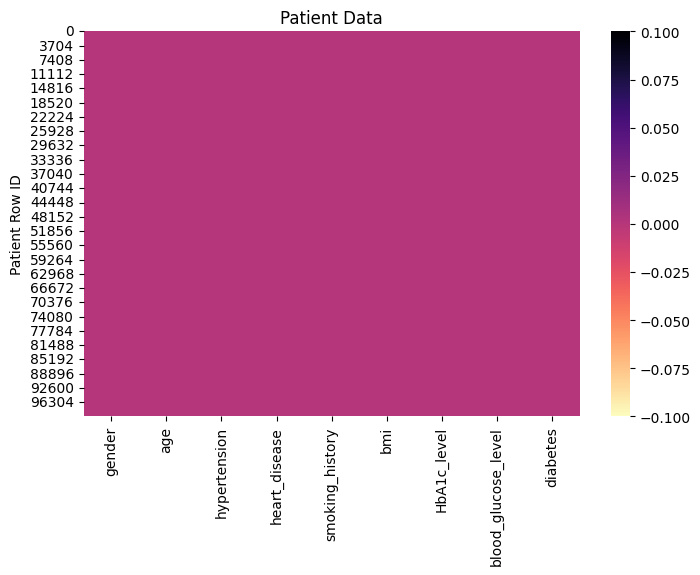

In [11]:
# Preferred visualisation to show missing values 
plt.figure(figsize=(8,5))
sns.heatmap(data.isnull(),cmap = "magma_r"); #or "teal" as color

#Adding titles
plt.title("Patient Data")
#plt.xlabel("Patient Feature Parameter")
plt.ylabel("Patient Row ID");

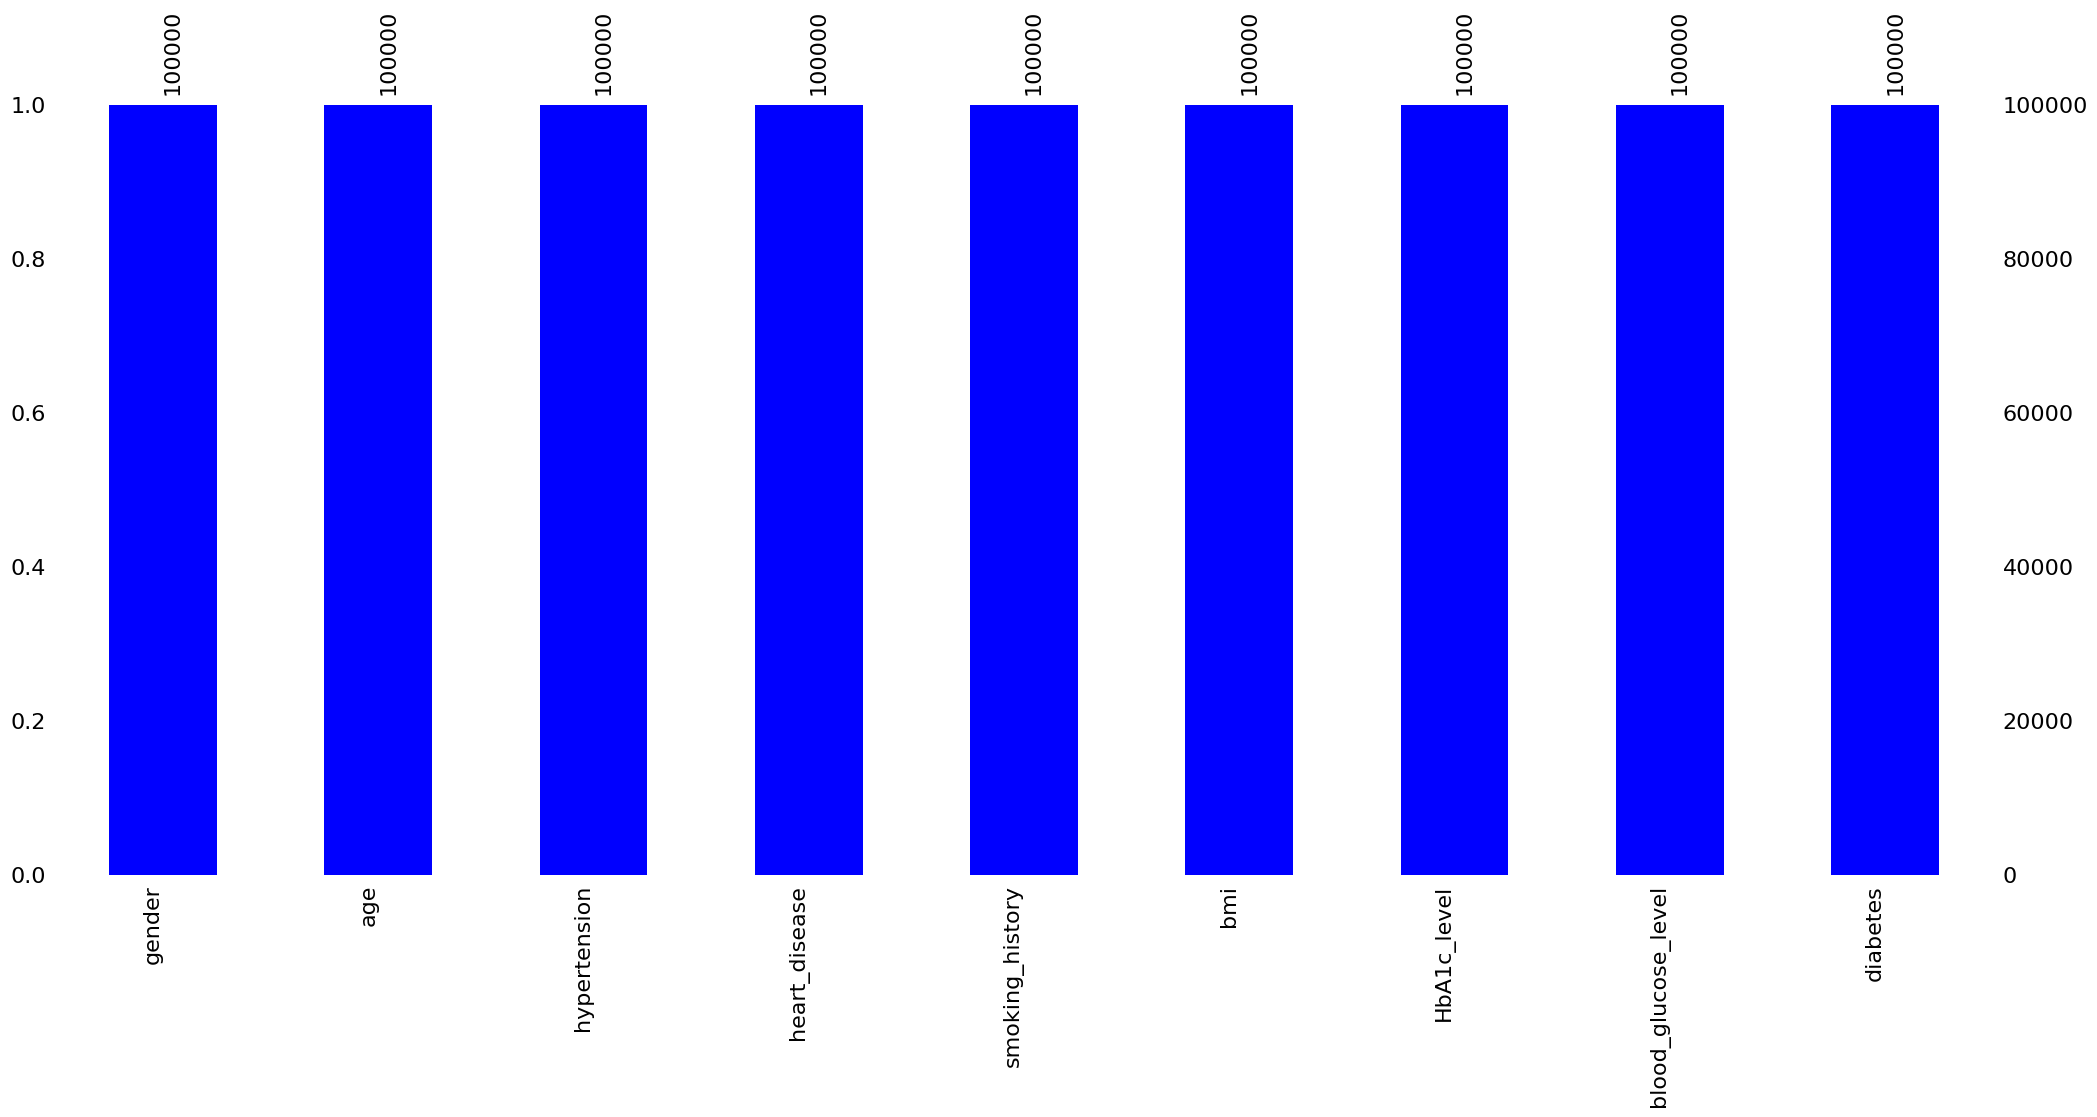

In [12]:
#Another way to visualise missing values

msno.bar(data, color="blue", label_rotation = 90);


#The 4 ways to check for missing values - from 1. data.info()  2. data.describe 3. heatmap 4. missingno visually;

#### b. Drop irrelevant columns/features

In [13]:
#We do not need to drop any columns or features as all look relevant

#### c. Check for duplicate data

In [14]:
data.duplicated() #Output shows row 99995 has duplicate because its row result = True 

0        False
1        False
2        False
3        False
4        False
         ...  
99995     True
99996    False
99997    False
99998    False
99999    False
Length: 100000, dtype: bool

In [15]:
#Number of duplicated rows
data.duplicated().sum()

3854

 - Above output shows we have 3,854 duplicated values

In [16]:
data = data.drop_duplicates()

In [17]:
data.duplicated().sum() #Notice output gives 0 as number of duplicated rows
#so we have handled duplicates - zero(0) duplicated rows

0

#### d. Checking for outliers within the dataset

### 3. Exploratory Data Analysis (EDA)

In [18]:
data.describe()

age  hypertension  heart_disease           bmi   HbA1c_level  \
count  96146.000000  96146.000000   96146.000000  96146.000000  96146.000000   
mean      41.794326      0.077601       0.040803     27.321461      5.532609   
std       22.462948      0.267544       0.197833      6.767716      1.073232   
min        0.080000      0.000000       0.000000     10.010000      3.500000   
25%       24.000000      0.000000       0.000000     23.400000      4.800000   
50%       43.000000      0.000000       0.000000     27.320000      5.800000   
75%       59.000000      0.000000       0.000000     29.860000      6.200000   
max       80.000000      1.000000       1.000000     95.690000      9.000000   

       blood_glucose_level      diabetes  
count         96146.000000  96146.000000  
mean            138.218231      0.088220  
std              40.909771      0.283616  
min              80.000000      0.000000  
25%             100.000000      0.000000  
50%             140.000000      0.000000  
75%             159.000000      0.000000  
max             300.000000      1.000000

- From the above last cell output, We suspect possible outliers in columns age, HbA1c_level, blood_glucose

#### 3a. Univariate Analysis
We investigate 1 variable only looking at its:
- Distribution
- Anomalies or outliers, etc.ble

In [19]:
data.head(3)

gender   age  hypertension  heart_disease smoking_history    bmi  \
0  Female  80.0             0              1           never  25.19   
1  Female  54.0             0              0         No Info  27.32   
2    Male  28.0             0              0           never  27.32   

   HbA1c_level  blood_glucose_level  diabetes  
0          6.6                  140         0  
1          6.6                   80         0  
2          5.7                  158         0

- We define our patients age group to help in classifying as a categorical data and for visualisation, min age < 1 year and max age = 80 years


In [20]:
def age_group(x):
    if x >= 0 and x <= 2:
        return "<0-2yr Baby"
    elif x <= 16:
        return "3-16yr Children"
    elif x <= 30:
        return "17-30yr Young Adult"
    elif x <= 40:
        return "31-40yr Middle-aged Adult"
    elif x <= 50:
        return "41-50yr Old Adult"
    else:
        return "Above 50yr Elderly"
#Applying the newly defined function age_group(x) to the dataset
data["age_group"] = data["age"].apply(age_group)

- Notice the "Age_Group" column is now a new feature/column added to the data set

In [21]:
data.head(2) 

gender   age  hypertension  heart_disease smoking_history    bmi  \
0  Female  80.0             0              1           never  25.19   
1  Female  54.0             0              0         No Info  27.32   

   HbA1c_level  blood_glucose_level  diabetes           age_group  
0          6.6                  140         0  Above 50yr Elderly  
1          6.6                   80         0  Above 50yr Elderly

- Now using histogram as a useful visualistion to spot the data distribution in univariate analysis:

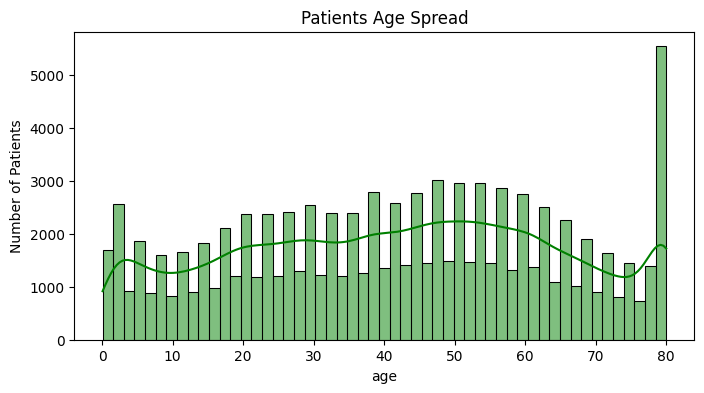

' The data distribution resembles uniform distribution(-almost flat at the top, spread almost evenly) \nfor age but most patients are above 80years and other majority are between 40-60 years old.'

In [22]:
plt.figure(figsize=(8,4))
sns.histplot(data["age"],color ="green", kde=True)

#Adding titles
plt.title("Patients Age Spread")
#plt.xlabel("age")
plt.ylabel("Number of Patients")
plt.show();
""" The data distribution resembles uniform distribution(-almost flat at the top, spread almost evenly) 
for age but most patients are above 80years and other majority are between 40-60 years old."""

- Now we re-plot the same histogram using the new "age_group" column/feature for better distribution

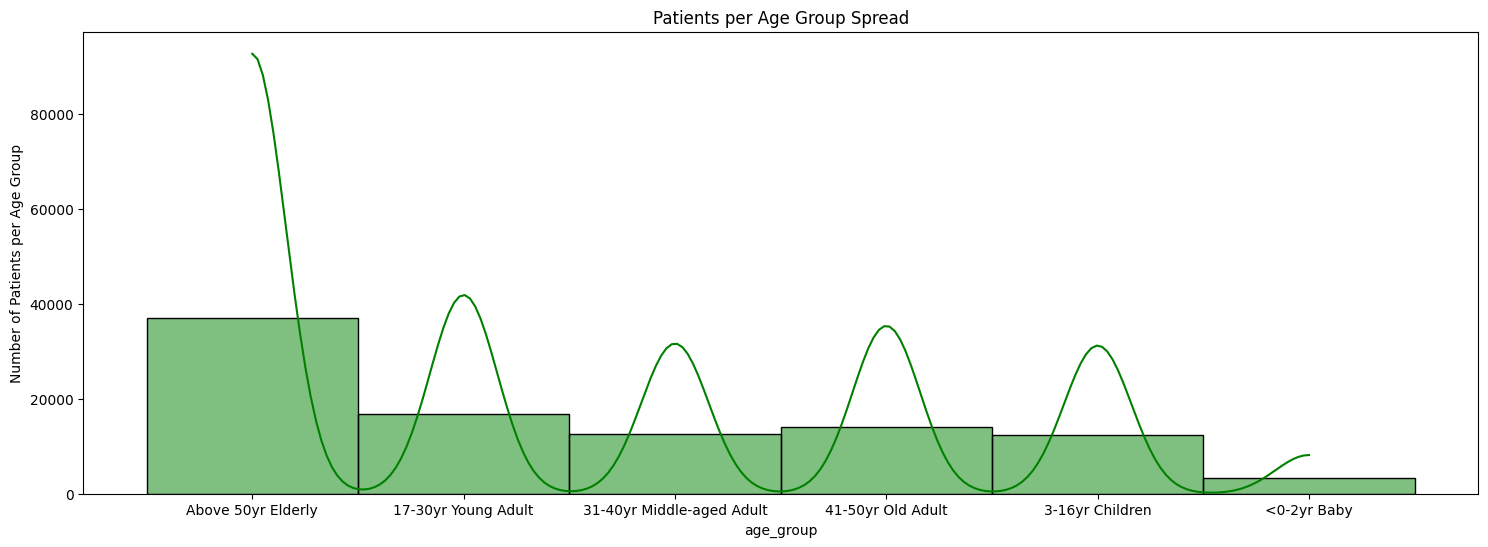

'This new data distribution resembles a right skewed distribution - majority\nof the age groups to the left, while minority of the age groups e.g. baby, children, etc. \nto right as tail of the distribution with the \nage of most patients - majority are above 50 years old.'

In [23]:
plt.figure(figsize=(18,6))
sns.histplot(data["age_group"],color ="green", kde=True)
#Adding titles
plt.title("Patients per Age Group Spread")
#plt.xlabel("age")
plt.ylabel("Number of Patients per Age Group")
plt.show()

"""This new data distribution resembles a right skewed distribution - majority
of the age groups to the left, while minority of the age groups e.g. baby, children, etc. 
to right as tail of the distribution with the 
age of most patients - majority are above 50 years old."""

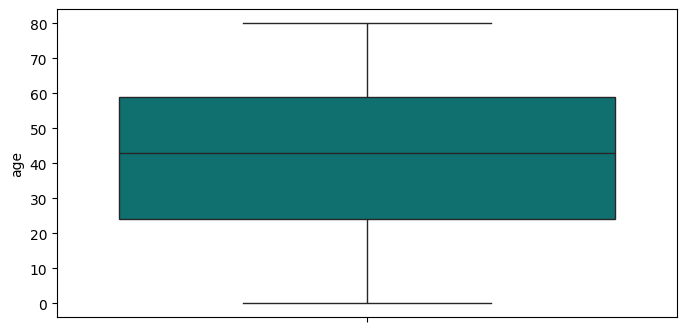

In [24]:
#Using the boxplot to confirm if there are outliers
plt.figure(figsize=(8,4))
sns.boxplot(data["age"],color ="teal")
plt.show()

- Boxplot above shows no outlier for the age column - as no data points above
or below the lower and upper bounds of the boxplot.

In [25]:
#We investigate the columns
data.columns

Index(['gender', 'age', 'hypertension', 'heart_disease', 'smoking_history',
       'bmi', 'HbA1c_level', 'blood_glucose_level', 'diabetes', 'age_group'],
      dtype='object')

In [26]:
all_columns = list(data.columns)
all_columns

['gender',
 'age',
 'hypertension',
 'heart_disease',
 'smoking_history',
 'bmi',
 'HbA1c_level',
 'blood_glucose_level',
 'diabetes',
 'age_group']

In [27]:
data.head(2)

gender   age  hypertension  heart_disease smoking_history    bmi  \
0  Female  80.0             0              1           never  25.19   
1  Female  54.0             0              0         No Info  27.32   

   HbA1c_level  blood_glucose_level  diabetes           age_group  
0          6.6                  140         0  Above 50yr Elderly  
1          6.6                   80         0  Above 50yr Elderly

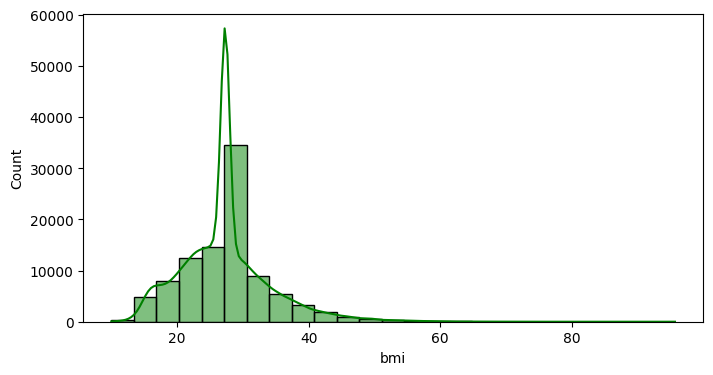

In [28]:
plt.figure(figsize=(8,4))
sns.histplot(data["bmi"],color ="green", bins =25, kde=True)
plt.show()

#Looks like a normal distribution with majority of the bmi between 20 to 35

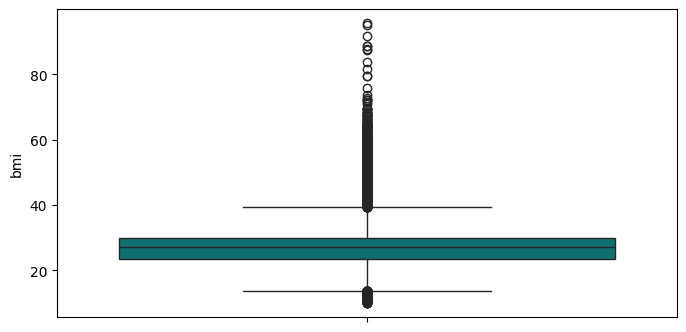

In [29]:
#Using the boxplot to confirm if there are outliers
plt.figure(figsize=(8,4))
sns.boxplot(data["bmi"],color ="teal")
plt.show()

- There are ouliers as confirmed from the boxplot above. The majority as shown above  with bmi between 25-35 bmi and outliers above 40 bmi(upper bound) and some outliers below 15 bmi(lower bound)

 - Using sub-plotting to put all numerical columns in one plot below:


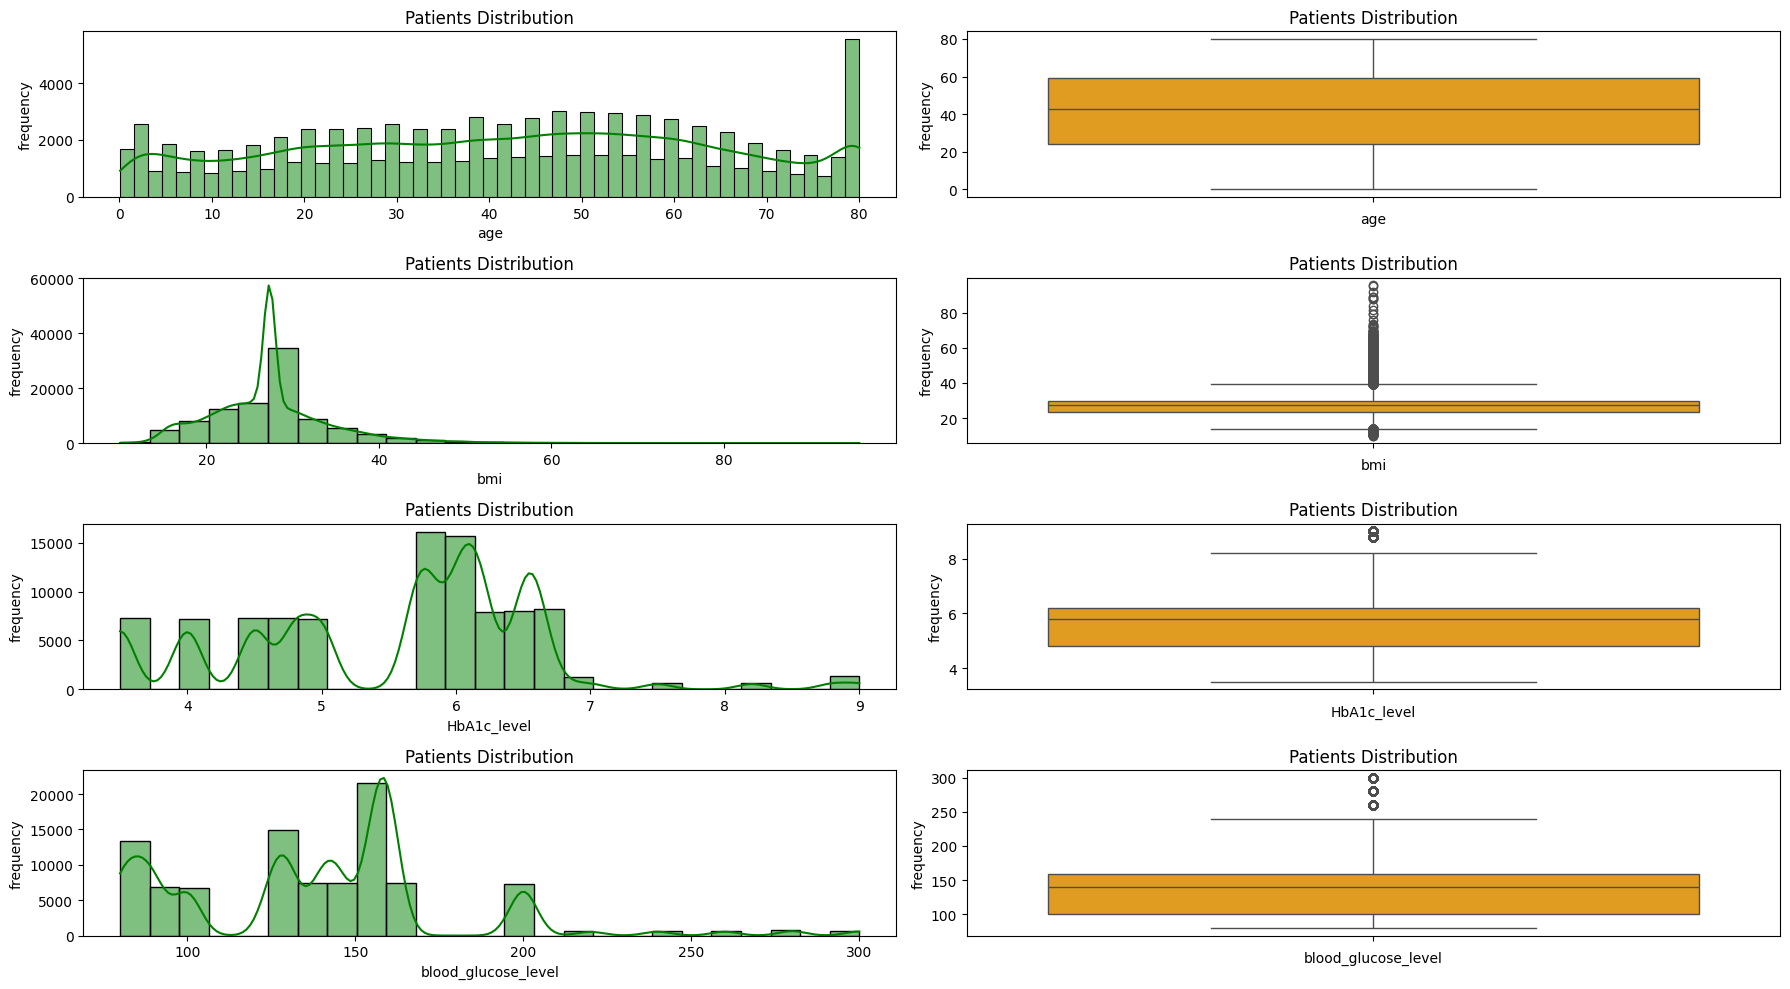

In [30]:
figure_plot, position = plt.subplots(nrows= 4, ncols=2, figsize=(18,10))
sns.histplot(data["age"],color ="green", kde=True, ax=position[0,0])
position[0,0].set_title("Patients Distribution")
position[0,0].set_ylabel("frequency")
sns.boxplot(data["age"],color ="orange", ax=position[0,1])
position[0,0].set_ylabel("frequency")
position[0,1].set_title("Patients Distribution")
position[0,1].set_xlabel("age")
position[0,1].set_ylabel("frequency")


sns.histplot(data["bmi"],color ="green", bins =25, kde=True, ax=position[1,0])
position[1,0].set_title("Patients Distribution")
position[1,0].set_ylabel("frequency")
sns.boxplot(data["bmi"],color ="orange", ax=position[1,1])
position[1,1].set_ylabel("frequency")
position[1,1].set_title("Patients Distribution")
position[1,1].set_xlabel("bmi")
position[1,1].set_ylabel("frequency")


sns.histplot(data["HbA1c_level"],color ="green", bins =25, kde=True, ax=position[2,0])
position[2,0].set_title("Patients Distribution")
position[2,0].set_ylabel("frequency")
sns.boxplot(data["HbA1c_level"],color ="orange", ax=position[2,1])
position[2,1].set_ylabel("frequency")
position[2,1].set_title("Patients Distribution")
position[2,1].set_xlabel("HbA1c_level")
position[2,1].set_ylabel("frequency")

sns.histplot(data["blood_glucose_level"],color ="green", bins =25, kde=True, ax=position[3,0])
position[3,0].set_title("Patients Distribution")
position[3,0].set_ylabel("frequency")

sns.boxplot(data["blood_glucose_level"],color ="orange", ax=position[3,1])
position[3,1].set_ylabel("frequency")
position[3,1].set_title("Patients Distribution")
position[3,1].set_xlabel("blood_glucose_level")
position[3,1].set_ylabel("frequency")

plt.tight_layout();

In [31]:
#manually re-assigning key numerical data
numerical_columns = ['age','bmi', 'HbA1c_level', 'blood_glucose_level']

#### Using Subplotting - multiple plots using 'for loop'

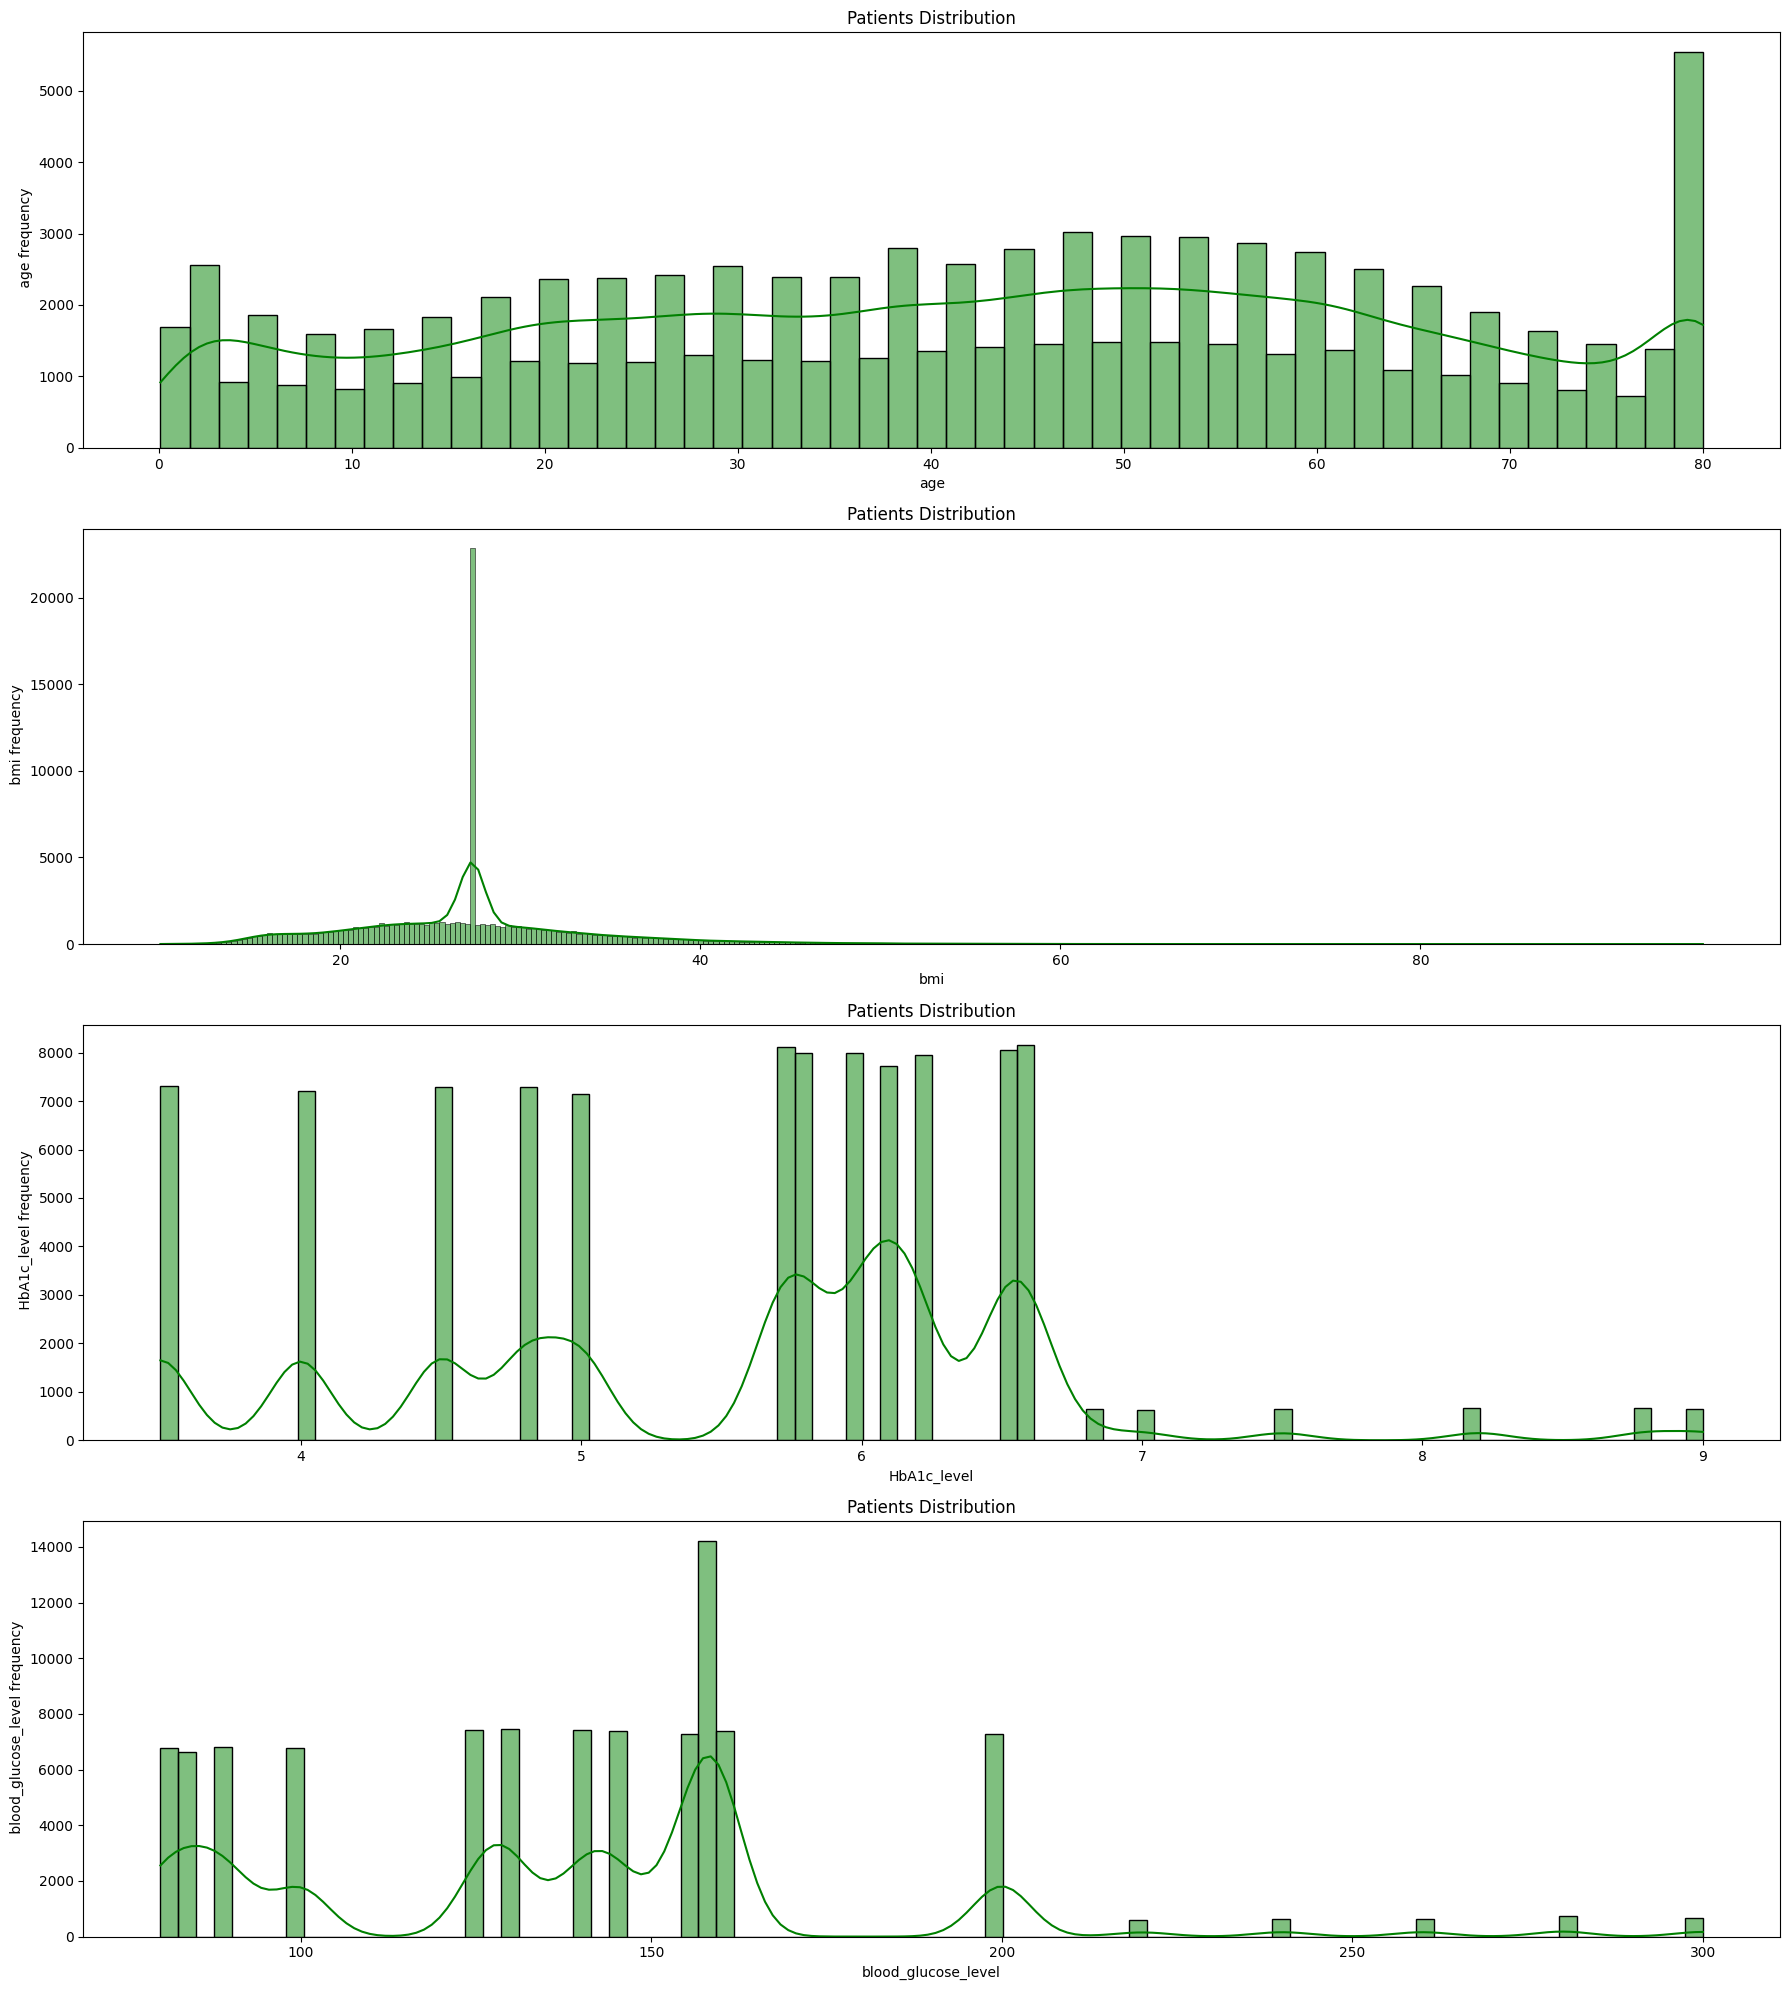

In [32]:
figure_plot, position = plt.subplots(nrows=4 , ncols=1, figsize=(18,20))
position = position.flatten()

for index, column_name in enumerate(numerical_columns):
    sns.histplot(data[column_name],color ="green", kde=True, ax=position[index])

    #Adding titles
    position[index].set_title("Patients Distribution")
    #plt.xlabel("age")
    position[index].set_ylabel(f" {column_name} frequency")

    plt.tight_layout()
plt.show()


- We would have used numerical_columns = data.select_dtypes(include="number") to get the numerical columns
only however, we have some other categorical columns with number values


- The subplots above show there are outliers in above in HbAIc_level and blood_glucose_level columns - Next we handle the outliers as we have confirmed from the above distributions

In [33]:
numerical_columns #Note age column here is actually categorical

['age', 'bmi', 'HbA1c_level', 'blood_glucose_level']

In [34]:
data["age"].value_counts()

80.00    4932
51.00    1566
47.00    1511
48.00    1508
53.00    1498
         ... 
0.48       83
1.00       83
0.40       66
0.16       59
0.08       36
Name: age, Length: 102, dtype: int64

In [35]:
data["age_group"].value_counts()

Above 50yr Elderly           36989
17-30yr Young Adult          16709
41-50yr Old Adult            14113
31-40yr Middle-aged Adult    12626
3-16yr Children              12454
<0-2yr Baby                   3255
Name: age_group, dtype: int64

In [36]:
#For the categorical columns we do
categorical_data = data.select_dtypes(include="object")
categorical_data

gender smoking_history                  age_group
0      Female           never         Above 50yr Elderly
1      Female         No Info         Above 50yr Elderly
2        Male           never        17-30yr Young Adult
3      Female         current  31-40yr Middle-aged Adult
4        Male         current         Above 50yr Elderly
...       ...             ...                        ...
99994  Female         No Info  31-40yr Middle-aged Adult
99996  Female         No Info                <0-2yr Baby
99997    Male          former         Above 50yr Elderly
99998  Female           never        17-30yr Young Adult
99999  Female         current         Above 50yr Elderly

[96146 rows x 3 columns]

In [37]:
categorical_columns = data.select_dtypes(include="object").columns
categorical_columns
total_categorical_data = list(categorical_columns)
total_categorical_data

['gender', 'smoking_history', 'age_group']

In [38]:
data.select_dtypes(include="object").columns.to_list()

['gender', 'smoking_history', 'age_group']

In [39]:
#To select all columns with numerical data even though they may have categorical values of 0 or 1:

total_numerical_columns = data.select_dtypes(include="number").columns
total_numerical_columns

#Note here columns age, hypentension, heart_disease and diabetes are categorical columns with values of 1/yes or 0/no though they contain numbers 0/1.

Index(['age', 'hypertension', 'heart_disease', 'bmi', 'HbA1c_level',
       'blood_glucose_level', 'diabetes'],
      dtype='object')

In [40]:
len(total_numerical_columns)

7

In [41]:
data.columns
list(data.columns)

['gender',
 'age',
 'hypertension',
 'heart_disease',
 'smoking_history',
 'bmi',
 'HbA1c_level',
 'blood_glucose_level',
 'diabetes',
 'age_group']

In [42]:
total_categorical_data = list(data.columns)
total_categorical_data.remove("age")
total_categorical_data.remove("bmi")
total_categorical_data.remove("HbA1c_level")
total_categorical_data.remove("blood_glucose_level")
total_categorical_data.remove("age_group")
total_categorical_data = total_categorical_data[::-1] #reversing the order of columns in the list
total_categorical_data

['diabetes', 'smoking_history', 'heart_disease', 'hypertension', 'gender']

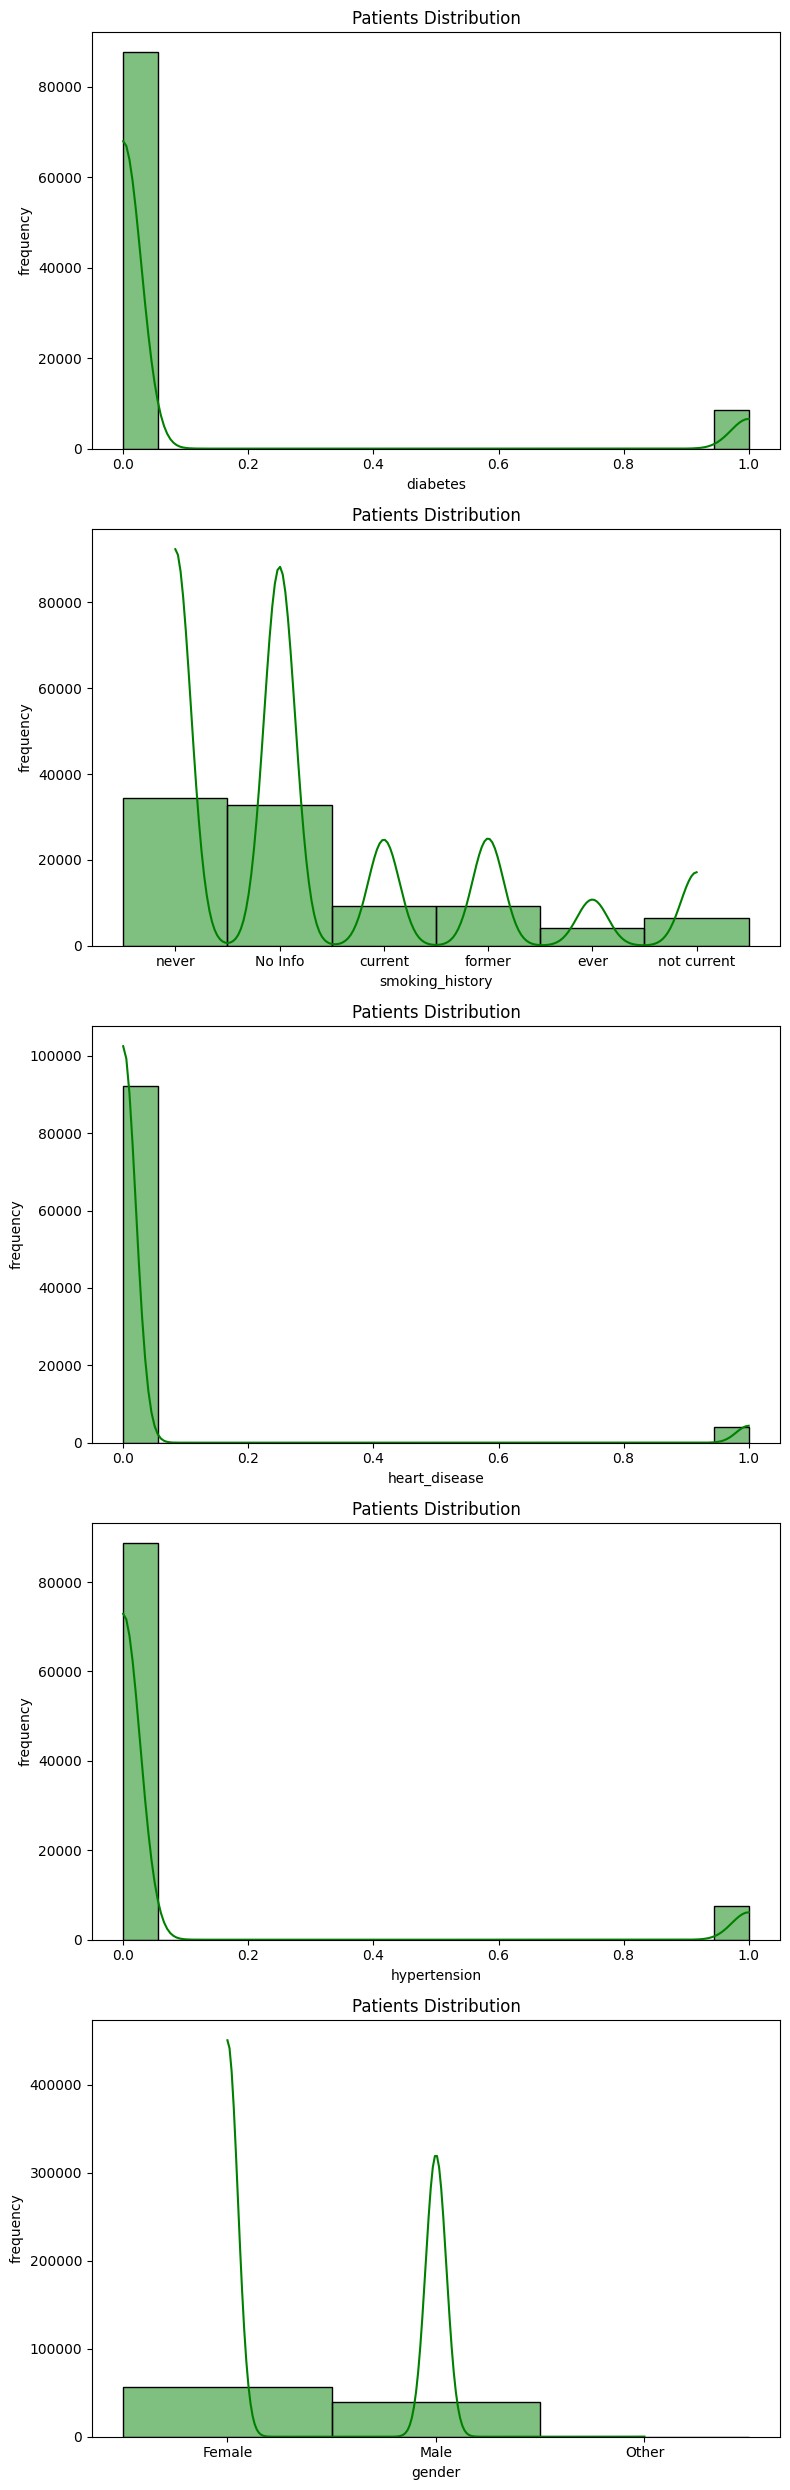

In [43]:
figure_plot, position = plt.subplots(nrows=5 , ncols=1, figsize=(8,25))
position = position.flatten()

for index, column_name in enumerate(total_categorical_data):
    sns.histplot(data[column_name],color ="green", kde=True, ax=position[index])
    #Adding titles
    position[index].set_title("Patients Distribution")
    #plt.xlabel()
    position[index].set_ylabel("frequency")
    
plt.tight_layout()
plt.show()

In [44]:
total_numerical_columns

Index(['age', 'hypertension', 'heart_disease', 'bmi', 'HbA1c_level',
       'blood_glucose_level', 'diabetes'],
      dtype='object')

In [45]:
all_columns

['gender',
 'age',
 'hypertension',
 'heart_disease',
 'smoking_history',
 'bmi',
 'HbA1c_level',
 'blood_glucose_level',
 'diabetes',
 'age_group']

In [46]:
all_columns = all_columns[::-1] #reversing the order of columns in the list

In [47]:
all_columns

['age_group',
 'diabetes',
 'blood_glucose_level',
 'HbA1c_level',
 'bmi',
 'smoking_history',
 'heart_disease',
 'hypertension',
 'age',
 'gender']

In [48]:
all_columns.remove("age")
all_columns.remove("smoking_history")
all_columns.remove("gender")
all_columns

['age_group',
 'diabetes',
 'blood_glucose_level',
 'HbA1c_level',
 'bmi',
 'heart_disease',
 'hypertension']

In [49]:

univariate_analysis_columns = all_columns
len(univariate_analysis_columns)

7

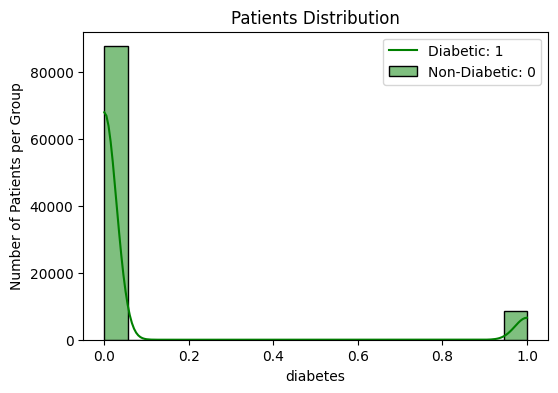

In [50]:
plt.figure(figsize=(6,4))
sns.histplot(data["diabetes"],color ="green", kde=True)
#Adding titles
plt.title("Patients Distribution")
#plt.xlabel("age")
plt.ylabel("Number of Patients per Group")
plt.legend(["Diabetic: 1", "Non-Diabetic: 0"])
plt.show()

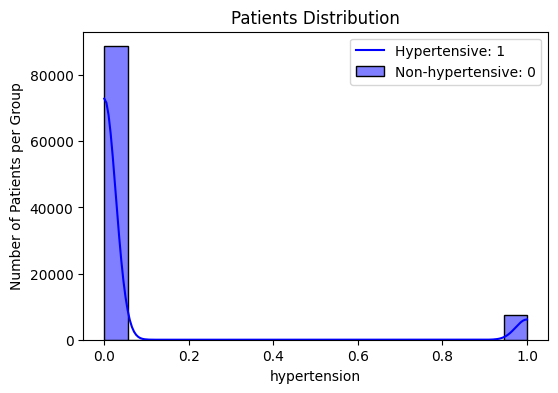

In [51]:
plt.figure(figsize=(6,4))
sns.histplot(data["hypertension"],color ="blue", kde=True)
#Adding titles
plt.title("Patients Distribution")

plt.ylabel("Number of Patients per Group")
plt.legend(["Hypertensive: 1", "Non-hypertensive: 0"])
plt.show()

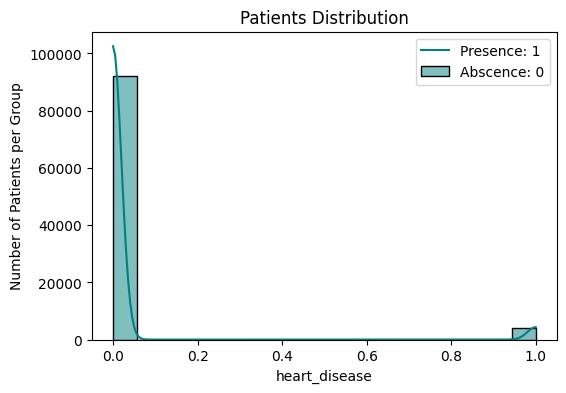

In [52]:
plt.figure(figsize=(6,4))
sns.histplot(data["heart_disease"],color ="teal", kde=True)
#Adding titles
plt.title("Patients Distribution")

plt.ylabel("Number of Patients per Group")
plt.legend(["Presence: 1", "Abscence: 0"])
plt.show()

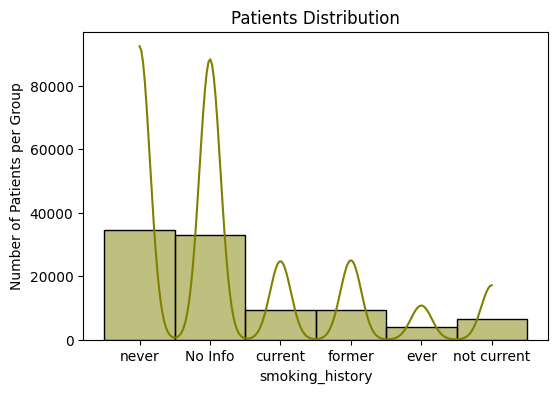

In [53]:
plt.figure(figsize=(6,4))
sns.histplot(data["smoking_history"],color ="olive", kde=True)
#Adding titles
plt.title("Patients Distribution")

plt.ylabel("Number of Patients per Group")
plt.show()

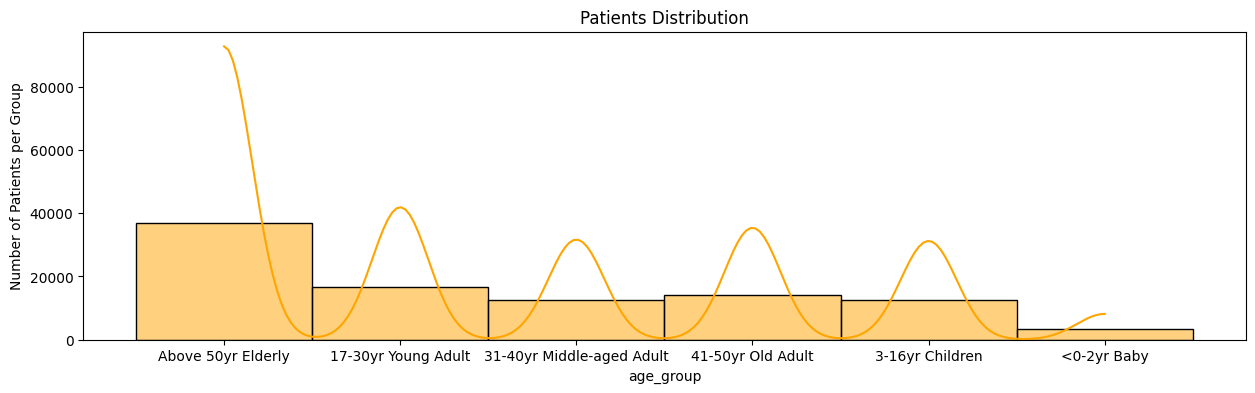

In [54]:
plt.figure(figsize=(15,4))
sns.histplot(data["age_group"],color ="orange", kde=True)
#Adding titles
plt.title("Patients Distribution")

plt.ylabel("Number of Patients per Group")
plt.show()

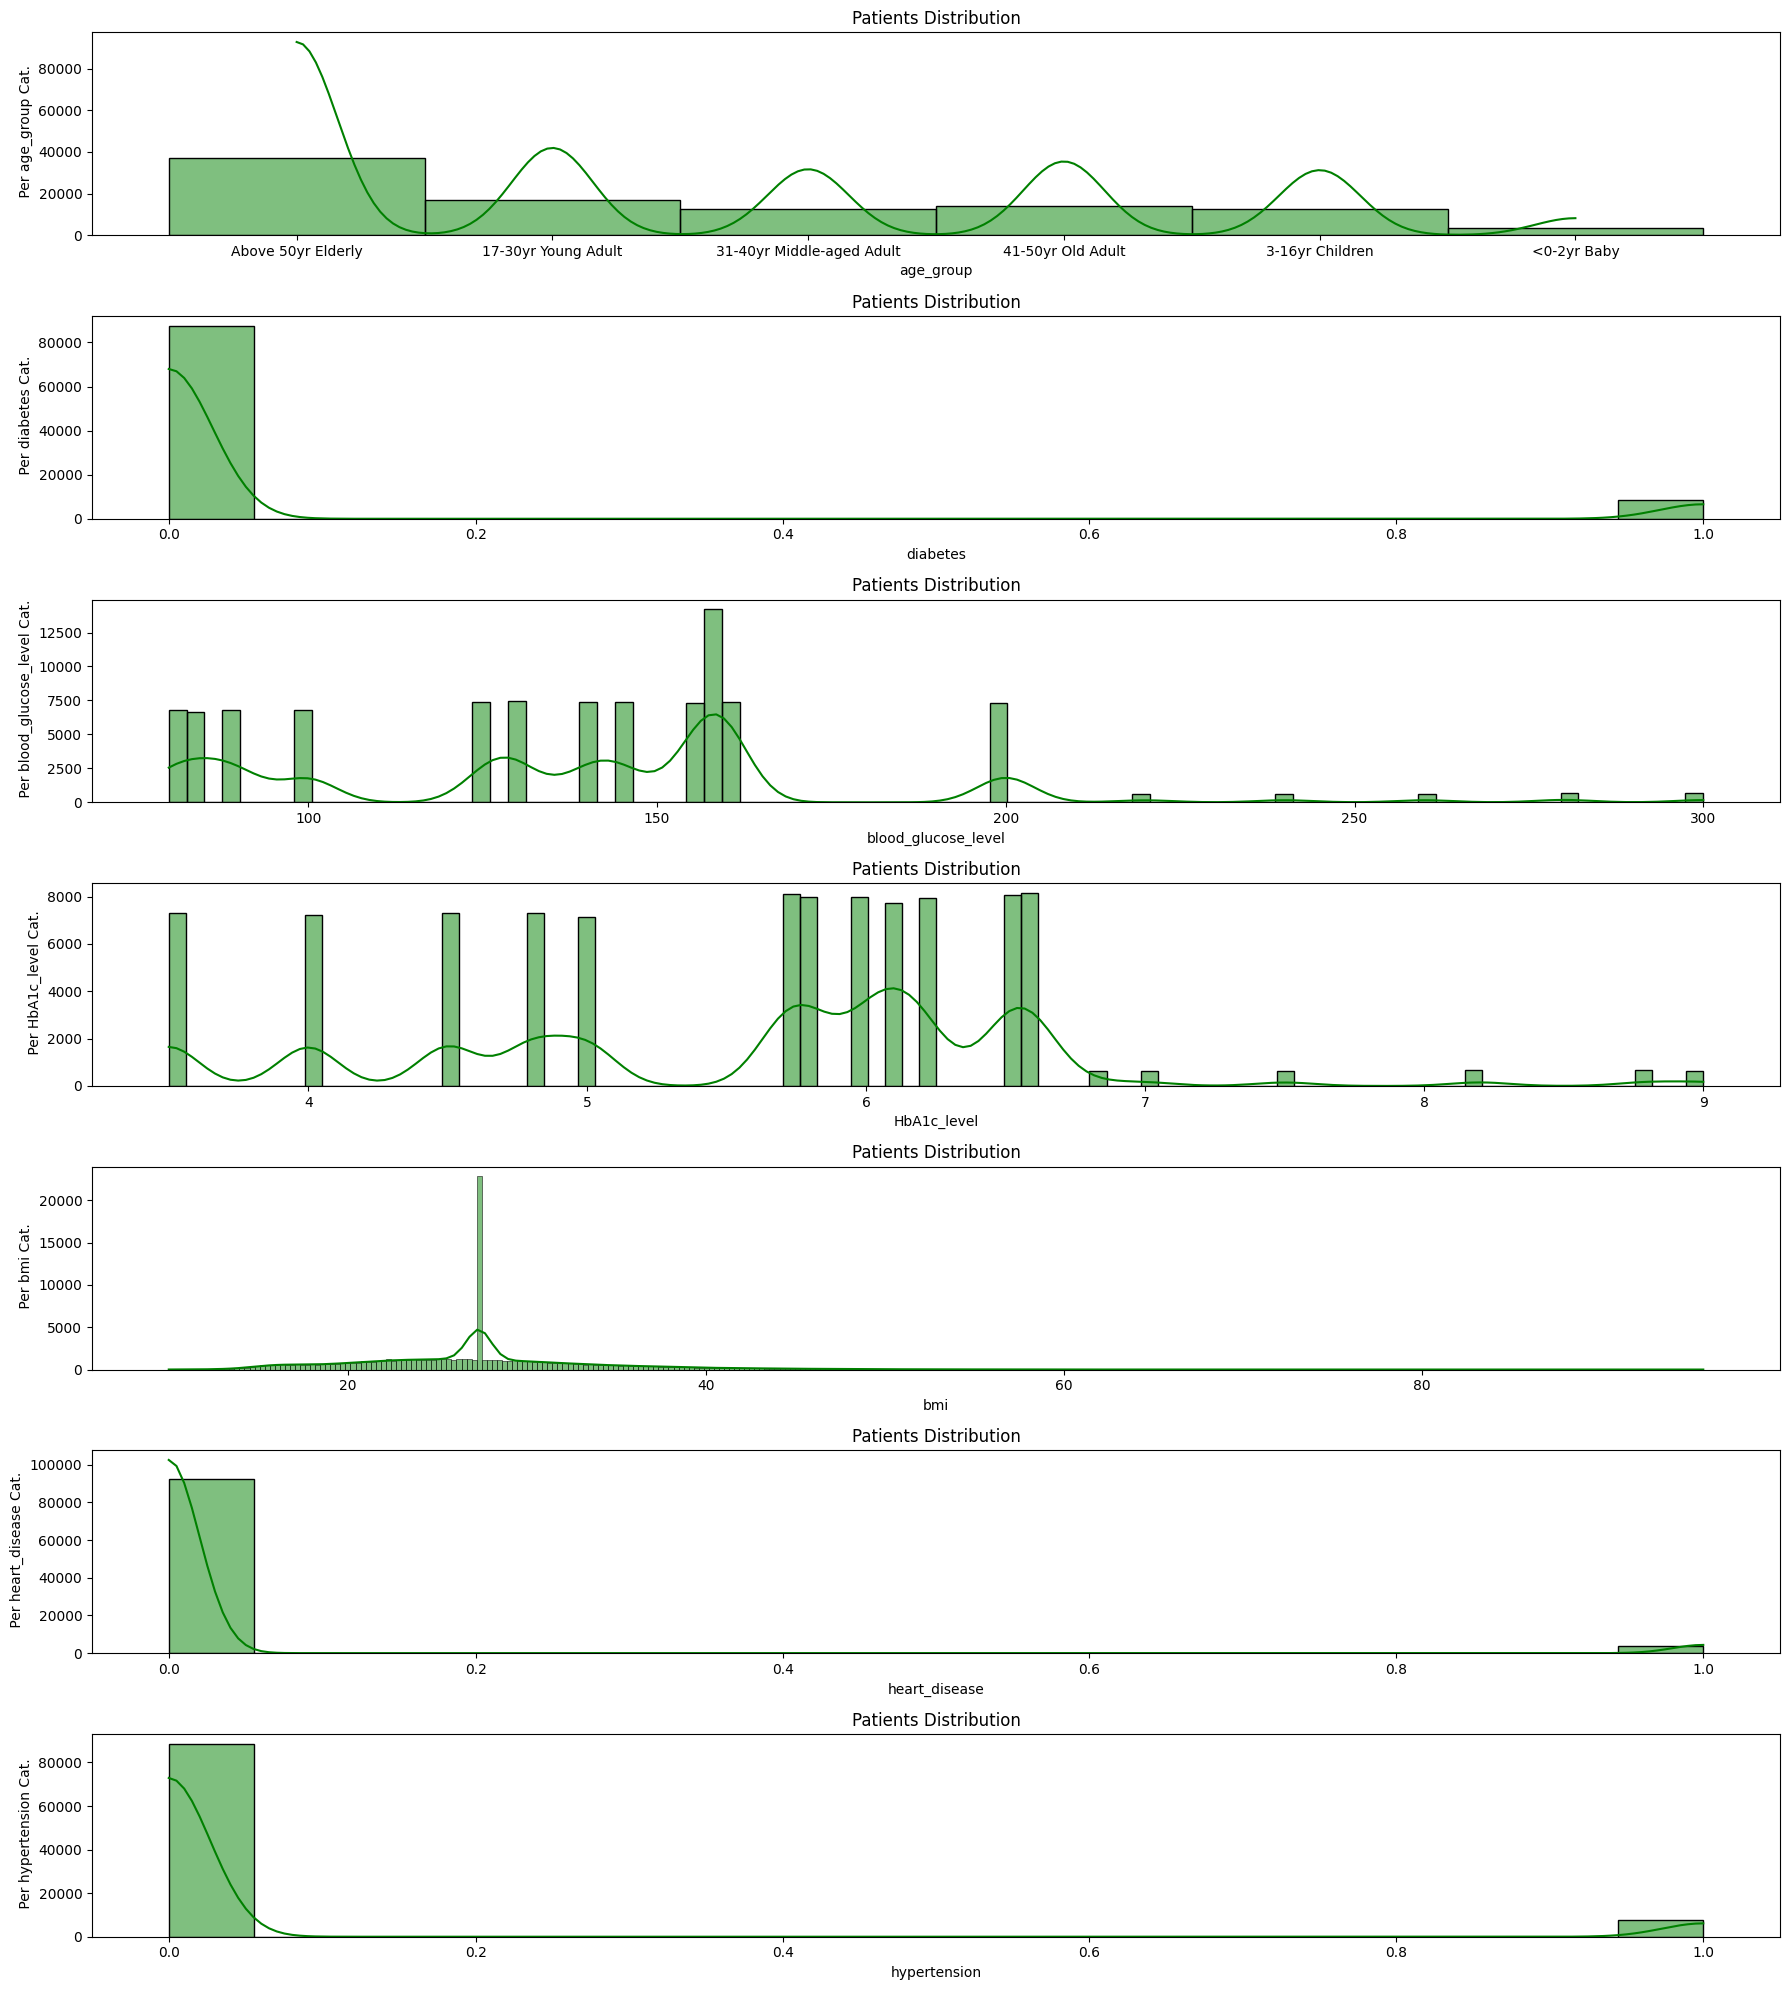

In [55]:
figure_plot, position = plt.subplots(nrows=7 , ncols=1, figsize=(18,20))
position = position.flatten()

for index, column_name in enumerate(univariate_analysis_columns):
    sns.histplot(data[column_name],color ="green", kde=True, ax=position[index])

    #Adding titles
    position[index].set_title("Patients Distribution")
    #plt.xlabel()
    position[index].set_ylabel(f" Per {column_name} Cat.")

    plt.tight_layout()
plt.show()

 - Hypertension, heart_disease, diabetes are all categorical data with 1-yes/present and 0-no/absent
    - Their plots in above figure shows majority of the patients do not have heart disease, or diabetes or hypertension 

#### Checking for Outliers

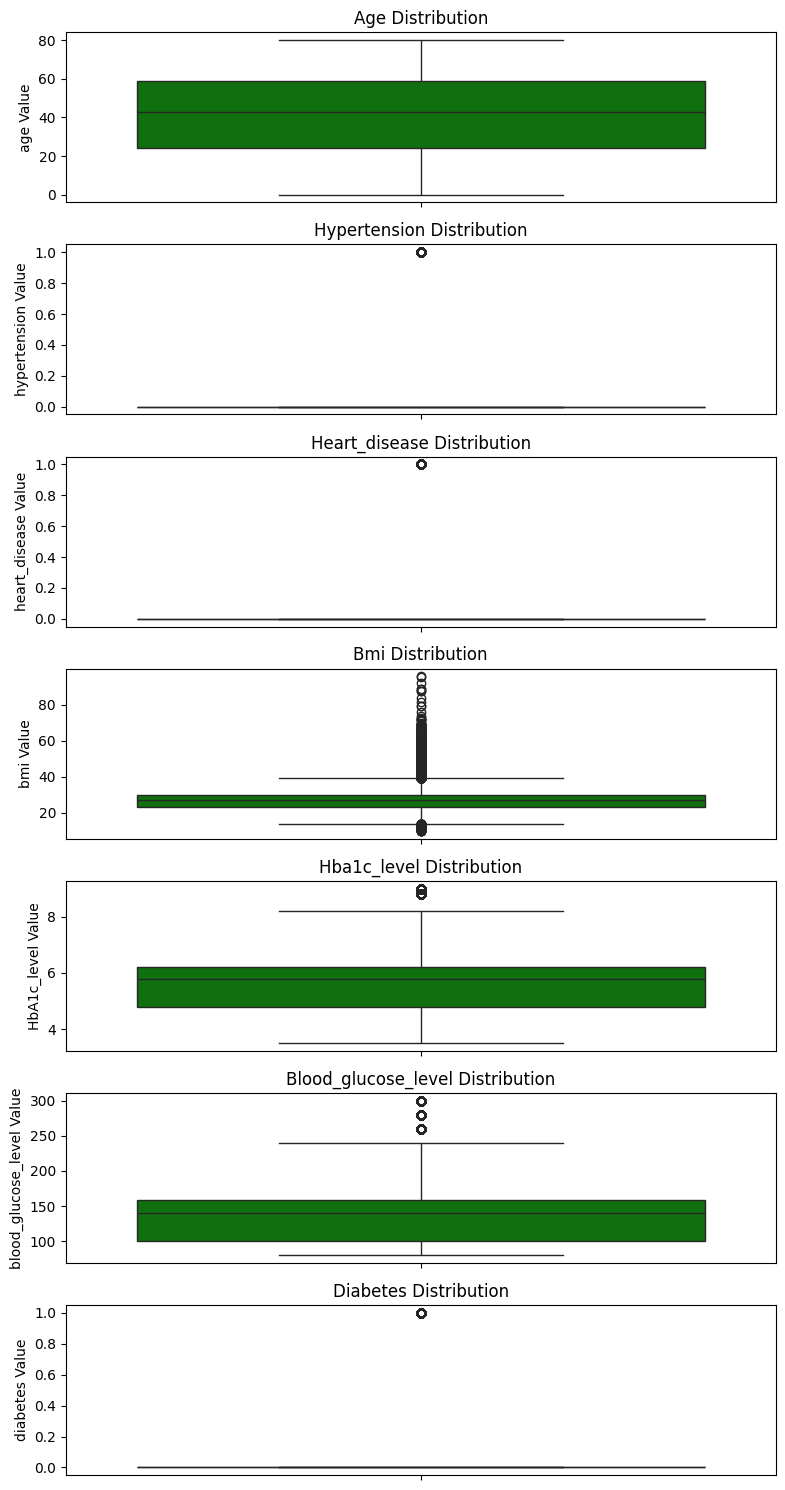

In [56]:
#Now using boxplot to check for outliers
figure_plot, position = plt.subplots(nrows=7 , ncols=1, figsize=(8,15))
position = position.flatten()

for index, column_name in enumerate(total_numerical_columns):
    sns.boxplot(data[column_name],color ="green", ax=position[index])
    position[index].set_title(f"{column_name.capitalize()} Distribution")
    position[index].set_ylabel(f"{column_name} Value")

plt.tight_layout()
plt.show()


In [57]:
total_numerical_columns

Index(['age', 'hypertension', 'heart_disease', 'bmi', 'HbA1c_level',
       'blood_glucose_level', 'diabetes'],
      dtype='object')

#### 3b. Handling Outliers
- To avoid the data distribution being skewed

In [58]:
#Calculate the interquartile range - iqr
#iqr = q3 - q1 where q3 - upper quartile and q1 - lower quartile

In [59]:
numerical_columns

['age', 'bmi', 'HbA1c_level', 'blood_glucose_level']

In [60]:
data.describe()

age  hypertension  heart_disease           bmi   HbA1c_level  \
count  96146.000000  96146.000000   96146.000000  96146.000000  96146.000000   
mean      41.794326      0.077601       0.040803     27.321461      5.532609   
std       22.462948      0.267544       0.197833      6.767716      1.073232   
min        0.080000      0.000000       0.000000     10.010000      3.500000   
25%       24.000000      0.000000       0.000000     23.400000      4.800000   
50%       43.000000      0.000000       0.000000     27.320000      5.800000   
75%       59.000000      0.000000       0.000000     29.860000      6.200000   
max       80.000000      1.000000       1.000000     95.690000      9.000000   

       blood_glucose_level      diabetes  
count         96146.000000  96146.000000  
mean            138.218231      0.088220  
std              40.909771      0.283616  
min              80.000000      0.000000  
25%             100.000000      0.000000  
50%             140.000000      0.000000  
75%             159.000000      0.000000  
max             300.000000      1.000000

In [61]:

#See cell 158 showing columns/features with outliers
q1 = data[['bmi', 'HbA1c_level', 'blood_glucose_level']].quantile(0.25)
q3 = data[['bmi', 'HbA1c_level', 'blood_glucose_level']].quantile(0.75)


In [62]:
iqr = q3 - q1
iqr

bmi                     6.46
HbA1c_level             1.40
blood_glucose_level    59.00
dtype: float64

In [63]:
#Now we calculate the lower and upper bounds
lower_bound = q1 - (1.5*iqr)
upper_bound = q3 + (1.5*iqr)

In [64]:
lower_bound

#Output below shows any bmi, HbA1c_level and blood_glucose_level lower than these values 13.71, 2.70, 11.50 are outliers


bmi                    13.71
HbA1c_level             2.70
blood_glucose_level    11.50
dtype: float64

In [65]:
upper_bound

#Output below shows any bmi, HbA1c_level and blood_glucose_level greater than these values 39.55, 8.30, 247.50 are outliers


bmi                     39.55
HbA1c_level              8.30
blood_glucose_level    247.50
dtype: float64

- Now we use Boolean indexing to remove these outliers
  - first we check where the bmi, HbA1c_level and blood_glucose_level columns are less than the lower bounds OR where they are greater than the upper bounds

In [66]:

outliers = ((data[["bmi", "HbA1c_level","blood_glucose_level"]] < lower_bound) | (data[["bmi", "HbA1c_level","blood_glucose_level"]]))
outliers

bmi  HbA1c_level  blood_glucose_level
0      True         True                 True
1      True         True                 True
2      True         True                 True
3      True         True                 True
4      True         True                 True
...     ...          ...                  ...
99994  True         True                 True
99996  True         True                 True
99997  True         True                 True
99998  True         True                 True
99999  True         True                 True

[96146 rows x 3 columns]

In [67]:
""" Now to consider any row where either of the columns bmi, HbA1c_level or blood_glucose_level gives a
True (Boolean) value, we can take the entire row as having an outlier and sum it to True (from True + False)
so we write:"""

outliers = ((data[["bmi", "HbA1c_level","blood_glucose_level"]] < lower_bound) | (data[["bmi", "HbA1c_level","blood_glucose_level"]] > upper_bound)).any(axis=1)
outliers

0        False
1        False
2        False
3        False
4        False
         ...  
99994    False
99996    False
99997    False
99998    False
99999    False
Length: 96146, dtype: bool

In [68]:
outliers.sum()

7951

In [69]:
data.head()

gender   age  hypertension  heart_disease smoking_history    bmi  \
0  Female  80.0             0              1           never  25.19   
1  Female  54.0             0              0         No Info  27.32   
2    Male  28.0             0              0           never  27.32   
3  Female  36.0             0              0         current  23.45   
4    Male  76.0             1              1         current  20.14   

   HbA1c_level  blood_glucose_level  diabetes                  age_group  
0          6.6                  140         0         Above 50yr Elderly  
1          6.6                   80         0         Above 50yr Elderly  
2          5.7                  158         0        17-30yr Young Adult  
3          5.0                  155         0  31-40yr Middle-aged Adult  
4          4.8                  155         0         Above 50yr Elderly

In [70]:
lower_bound

bmi                    13.71
HbA1c_level             2.70
blood_glucose_level    11.50
dtype: float64

In [71]:
upper_bound

bmi                     39.55
HbA1c_level              8.30
blood_glucose_level    247.50
dtype: float64

In [72]:
#Now we can filter the data based on columns with outliers
data[outliers]

#The filtered data below gives you any column where there exist at least 1 outlier in the columns bmi, HbA1c_level and blood_glucose_level 

gender   age  hypertension  heart_disease smoking_history    bmi  \
11     Female  54.0             0              0          former  54.70   
38       Male  50.0             1              0         current  27.32   
39     Female  34.0             0              0           never  56.43   
40       Male  73.0             0              0          former  25.91   
55       Male  50.0             0              0          former  37.16   
...       ...   ...           ...            ...             ...    ...   
99948  Female  56.0             1              0          former  39.62   
99953  Female  59.0             1              0            ever  60.52   
99957  Female  61.0             0              0         No Info  34.45   
99960  Female  47.0             0              0          former  45.15   
99993  Female  40.0             0              0           never  40.69   

       HbA1c_level  blood_glucose_level  diabetes                  age_group  
11             6.0                  100         0         Above 50yr Elderly  
38             5.7                  260         1          41-50yr Old Adult  
39             6.2                  200         0  31-40yr Middle-aged Adult  
40             9.0                  160         1         Above 50yr Elderly  
55             9.0                  159         1          41-50yr Old Adult  
...            ...                  ...       ...                        ...  
99948          4.5                  126         0         Above 50yr Elderly  
99953          3.5                  158         0         Above 50yr Elderly  
99957          6.5                  280         1         Above 50yr Elderly  
99960          4.0                  126         0          41-50yr Old Adult  
99993          3.5                  155         0  31-40yr Middle-aged Adult  

[7951 rows x 10 columns]

#### 3c. Removing Outliers within Dataset
- Now we filter out the dataset and negate where we do not have outliers using the negation symbol "~"

In [73]:
#Now we negate where we do not have outliers using the negation symbol "~"
#so that is the data we keep

data[~outliers]

gender   age  hypertension  heart_disease smoking_history    bmi  \
0      Female  80.0             0              1           never  25.19   
1      Female  54.0             0              0         No Info  27.32   
2        Male  28.0             0              0           never  27.32   
3      Female  36.0             0              0         current  23.45   
4        Male  76.0             1              1         current  20.14   
...       ...   ...           ...            ...             ...    ...   
99994  Female  36.0             0              0         No Info  24.60   
99996  Female   2.0             0              0         No Info  17.37   
99997    Male  66.0             0              0          former  27.83   
99998  Female  24.0             0              0           never  35.42   
99999  Female  57.0             0              0         current  22.43   

       HbA1c_level  blood_glucose_level  diabetes                  age_group  
0              6.6                  140         0         Above 50yr Elderly  
1              6.6                   80         0         Above 50yr Elderly  
2              5.7                  158         0        17-30yr Young Adult  
3              5.0                  155         0  31-40yr Middle-aged Adult  
4              4.8                  155         0         Above 50yr Elderly  
...            ...                  ...       ...                        ...  
99994          4.8                  145         0  31-40yr Middle-aged Adult  
99996          6.5                  100         0                <0-2yr Baby  
99997          5.7                  155         0         Above 50yr Elderly  
99998          4.0                  100         0        17-30yr Young Adult  
99999          6.6                   90         0         Above 50yr Elderly  

[88195 rows x 10 columns]

- Now we replace the data with clean data - without ouliers, duplicates or missing values (none in this case)


In [74]:
data = data[~outliers]

data.head()

gender   age  hypertension  heart_disease smoking_history    bmi  \
0  Female  80.0             0              1           never  25.19   
1  Female  54.0             0              0         No Info  27.32   
2    Male  28.0             0              0           never  27.32   
3  Female  36.0             0              0         current  23.45   
4    Male  76.0             1              1         current  20.14   

   HbA1c_level  blood_glucose_level  diabetes                  age_group  
0          6.6                  140         0         Above 50yr Elderly  
1          6.6                   80         0         Above 50yr Elderly  
2          5.7                  158         0        17-30yr Young Adult  
3          5.0                  155         0  31-40yr Middle-aged Adult  
4          4.8                  155         0         Above 50yr Elderly

- Confirming using the boxplot again to check if the outliers are conpletely removed


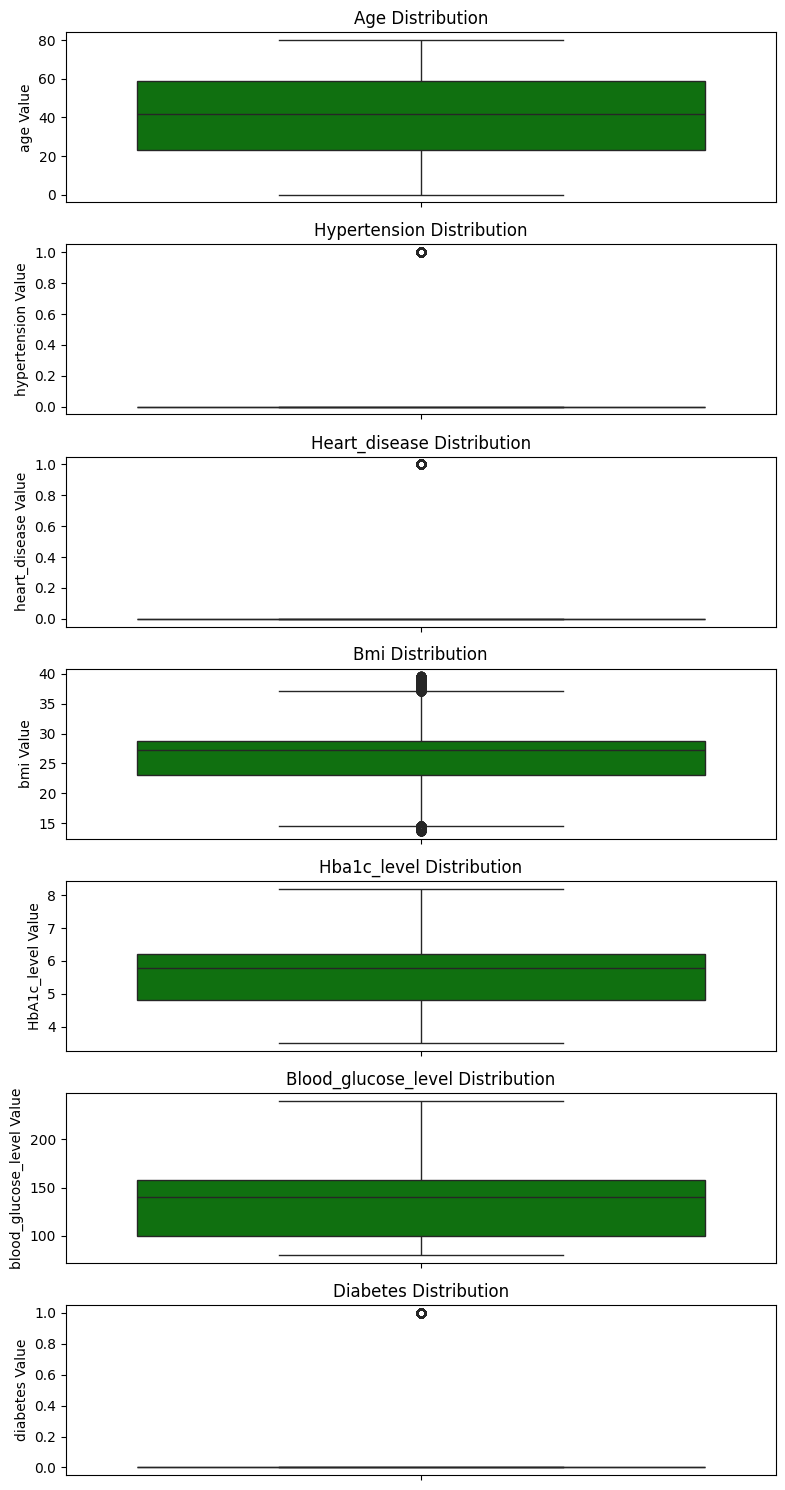

In [75]:
figure_plot, position = plt.subplots(nrows=7 , ncols=1, figsize=(8,15))
position = position.flatten()

for index, column_name in enumerate(total_numerical_columns):
    sns.boxplot(data[column_name],color ="green", ax=position[index])
    position[index].set_title(f"{column_name.capitalize()} Distribution")
    position[index].set_ylabel(f"{column_name} Value")


plt.tight_layout() 
plt.show()

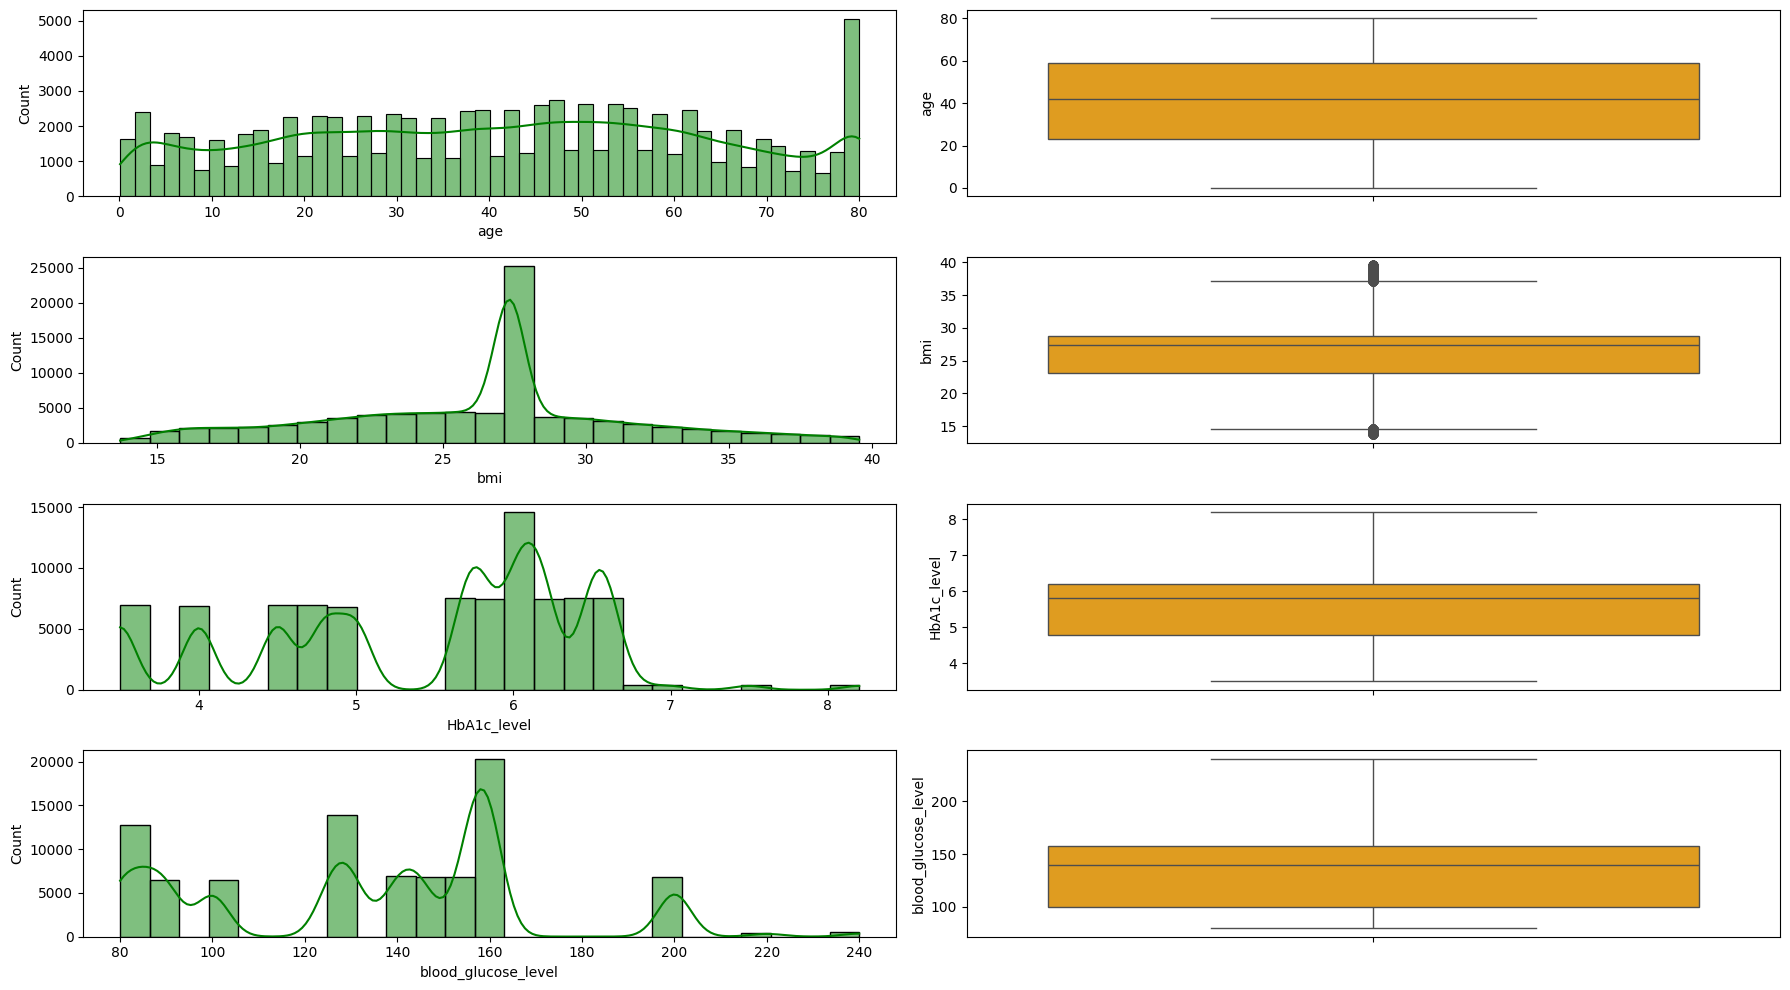

In [76]:
#Now using subplotting to put all numerical colummns in one and re-plot again

figure_plot, position = plt.subplots(nrows= 4, ncols=2, figsize=(18,10))
sns.histplot(data["age"],color ="green", kde=True, ax=position[0,0])
sns.boxplot(data["age"],color ="orange", ax=position[0,1])
sns.histplot(data["bmi"],color ="green", bins =25, kde=True, ax=position[1,0])
sns.boxplot(data["bmi"],color ="orange", ax=position[1,1])
sns.histplot(data["HbA1c_level"],color ="green", bins =25, kde=True, ax=position[2,0])
sns.boxplot(data["HbA1c_level"],color ="orange", ax=position[2,1])
sns.histplot(data["blood_glucose_level"],color ="green", bins =25, kde=True, ax=position[3,0])
sns.boxplot(data["blood_glucose_level"],color ="orange", ax=position[3,1])
plt.tight_layout();

- From the above plots distribution we can see no more outliers in the plot

In [77]:
categorical_columns = data.select_dtypes(include="object").columns
categorical_columns

Index(['gender', 'smoking_history', 'age_group'], dtype='object')

In [78]:
len(categorical_columns)

3

In [79]:
data.columns

Index(['gender', 'age', 'hypertension', 'heart_disease', 'smoking_history',
       'bmi', 'HbA1c_level', 'blood_glucose_level', 'diabetes', 'age_group'],
      dtype='object')

In [80]:
#We manually select categorical columns

actual_categorical_columns = ['age_group','gender', 'hypertension', 'heart_disease', 'smoking_history', 'diabetes']

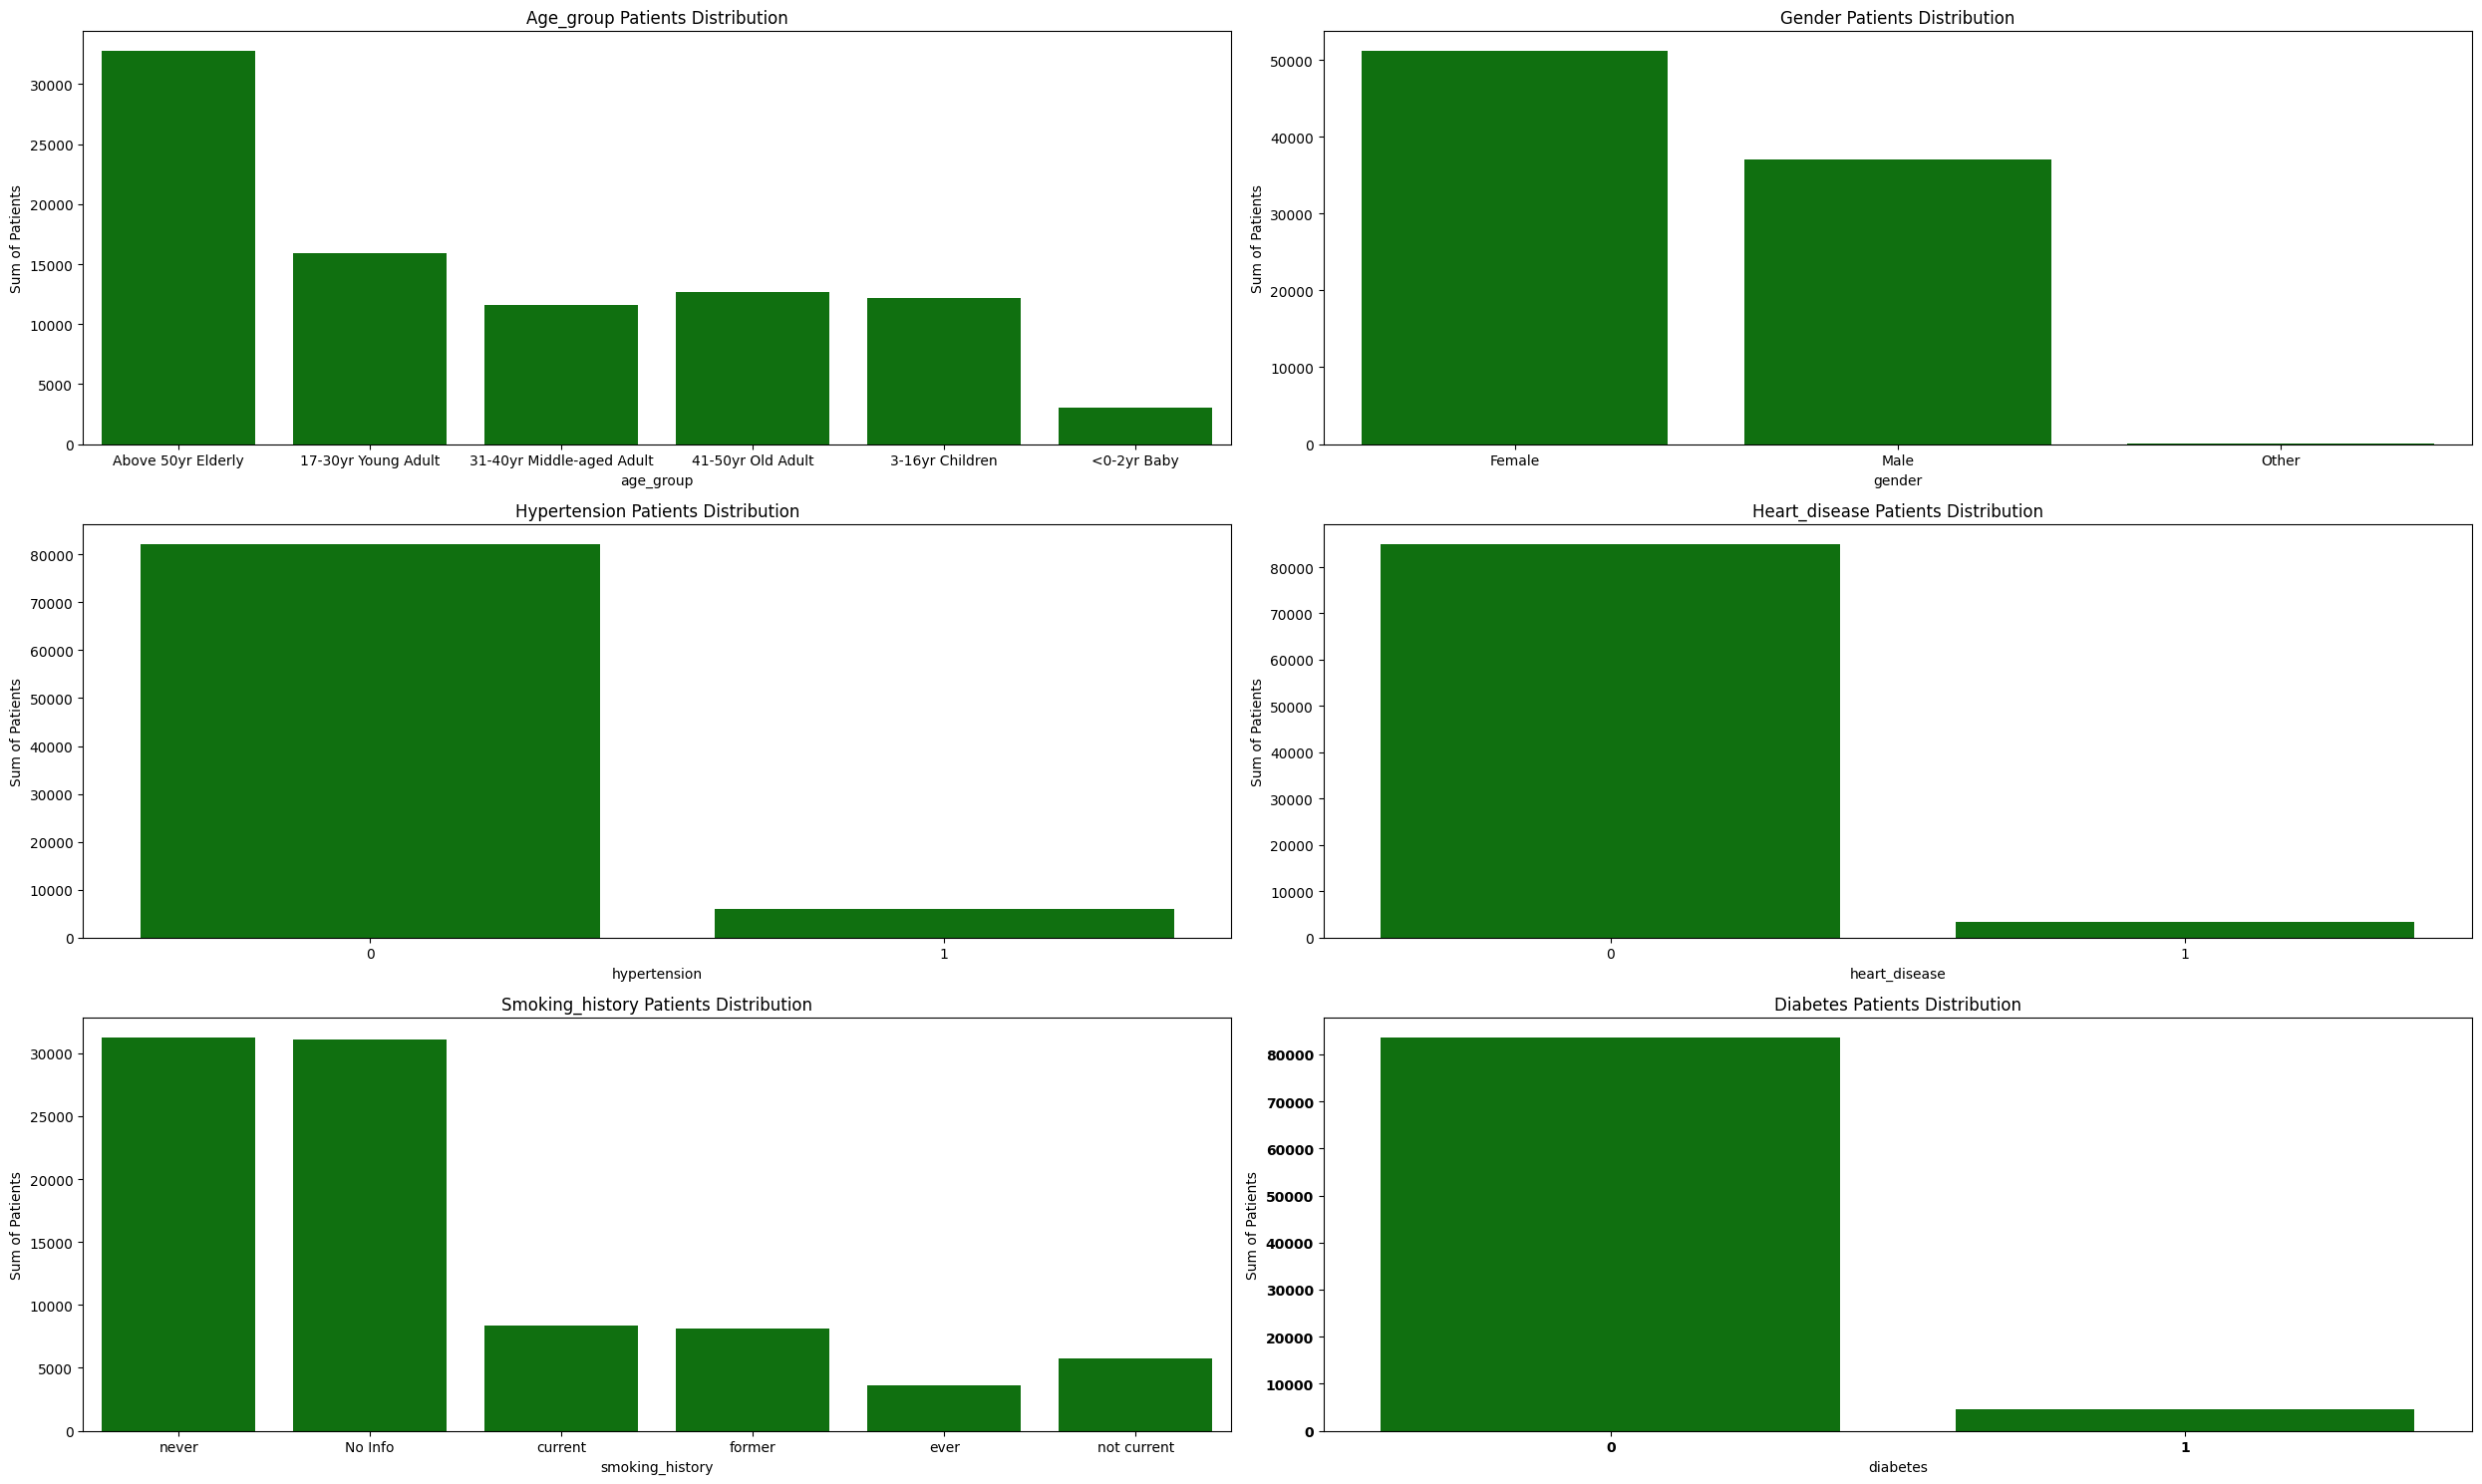

In [81]:

#For the categorical columns we use the countplot visualisations:

figure_plot, position = plt.subplots(nrows=3 , ncols=2, figsize=(25,15))
position = position.flatten() 

for index, column_name in enumerate(actual_categorical_columns):
    sns.countplot(x=data[column_name],color ="green", ax=position[index])

    #Adding titles
    position[index].set_title(f"{column_name.capitalize()} Patients Distribution")
    #plt.xlabel("age")
    position[index].set_ylabel("Sum of Patients")
    position[index].set_xlabel(f"{column_name}")
    plt.xticks(fontweight = "bold")
    plt.yticks(fontweight = "bold")
    plt.tight_layout()
    
plt.tight_layout()
plt.show()

- From the above countplot we notice we have more female than male patients
- Also have more patients that have never smoked and those with no info than the other categories of current, former, not current smokers with the 'ever' category smokers as the least

- So we might want to investigate further in bivariate analysis if there's a connection between smoking history category of nver smoked, current and former smokers to the patients with diabetes.

 - Also those with heart disease and hypertension related to the target variable of presence or potential for diabetes

#### Bivariate Analysis
- investigating relationship between 2 variables usually - one independent variable and a dependent variable

In [82]:
numerical_columns

['age', 'bmi', 'HbA1c_level', 'blood_glucose_level']

In [83]:
categorical_columns

Index(['gender', 'smoking_history', 'age_group'], dtype='object')

In [84]:
actual_categorical_columns

['age_group',
 'gender',
 'hypertension',
 'heart_disease',
 'smoking_history',
 'diabetes']

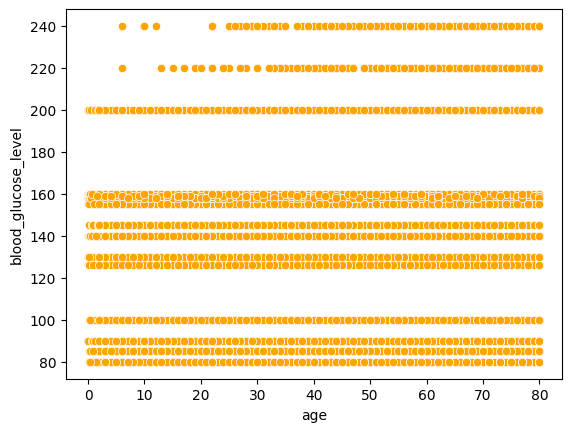

In [85]:
sns.scatterplot(x="age", y="blood_glucose_level", data=data, color="orange");

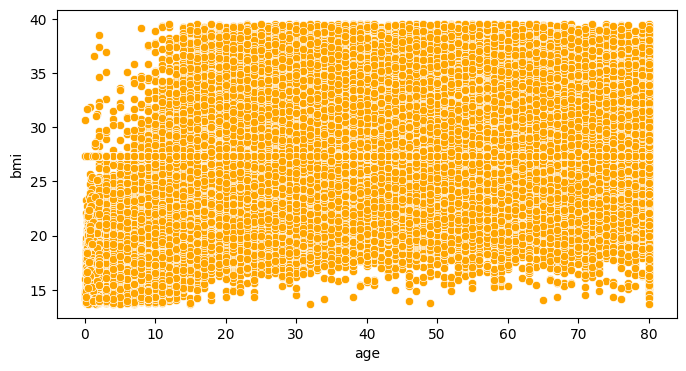

In [86]:
plt.figure(figsize=(8,4))
sns.scatterplot(x="age", y="bmi", data=data, color="orange");

plt.show()

#below shows no relationship as the data points are scattered all over


 - We can use a regression plot to show if there is any correlation and the direction if there is

In [87]:
#We can actually calculate the correlation value above using:
data["age"].corr(data["bmi"])

#result 0.404 shows slighly +ve correlation, usaully >0.5 is a strong +ve correlation (spectrum -1 to 0 and +1)

0.40496582217106875

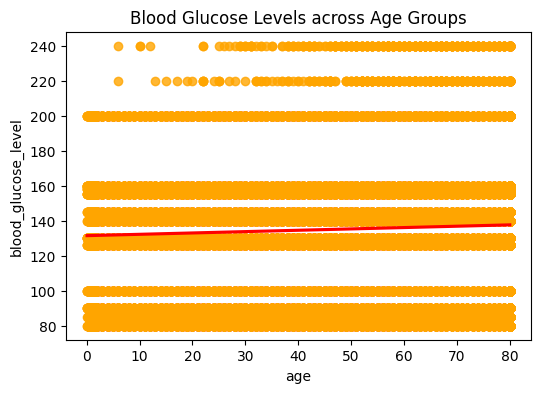

In [88]:
figure_plot = plt.figure(figsize=(6,4))
figure_plot = sns.regplot(x="age", y="blood_glucose_level", data=data, color="orange", line_kws={"color":"red"})
figure_plot.set_title("Blood Glucose Levels across Age Groups");

#line is not flat slighly tilted upwards so +ve correlation but not a strong upward correlation.

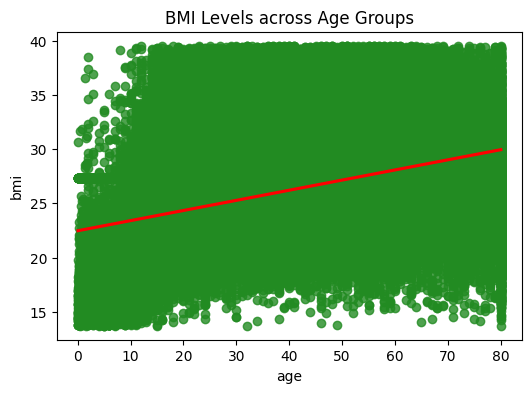

In [89]:
figure_plot = plt.figure(figsize=(6,4))
figure_plot = sns.regplot(x="age", y="bmi", data=data, color="forestgreen", line_kws={"color":"red"})
figure_plot = figure_plot.set_title("BMI Levels across Age Groups");

#plt.show()
#line is not flat more tilted upwards so +ve correlation but a better correlation. 

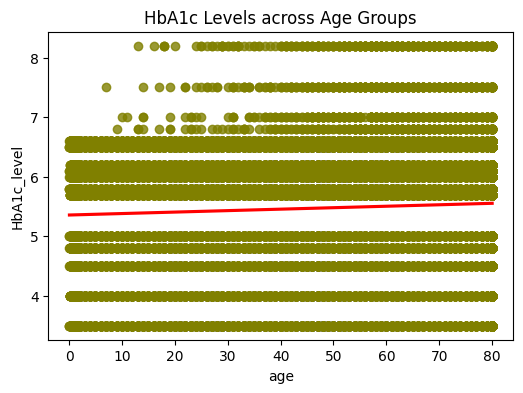

In [90]:
figure_plot = plt.figure(figsize=(6,4))
figure_plot = sns.regplot(x="age", y="HbA1c_level", data=data, color="olive", line_kws={"color":"red"})
figure_plot = figure_plot.set_title("HbA1c Levels across Age Groups");

#plt.show()
#line is also not flat slighly tilted upwards so +ve correlation but not a strong upward correlation.

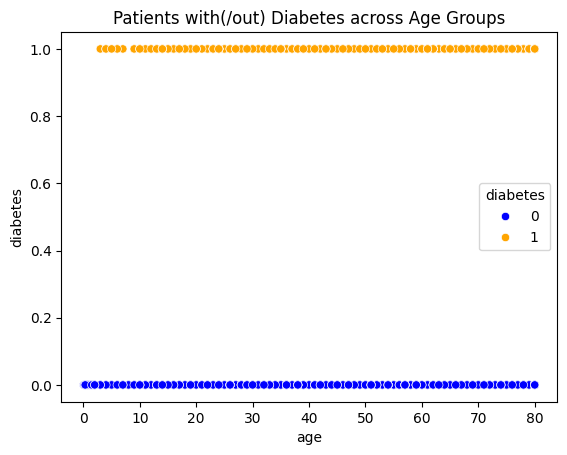

In [91]:
figure_plot = sns.scatterplot(x="age", y="diabetes", data=data, color="orange", hue="diabetes", palette={0: "blue", 1: "orange"});
figure_plot = figure_plot.set_title("Patients with(/out) Diabetes across Age Groups");
#plt.legend(title=["Diabetic: 1", "Non-Diabetic: 0"], labels=["Non-Diabetic: 0", "Diabetic: 1"], loc="upper right")
plt.show()
#remember diabetes is a categorical data

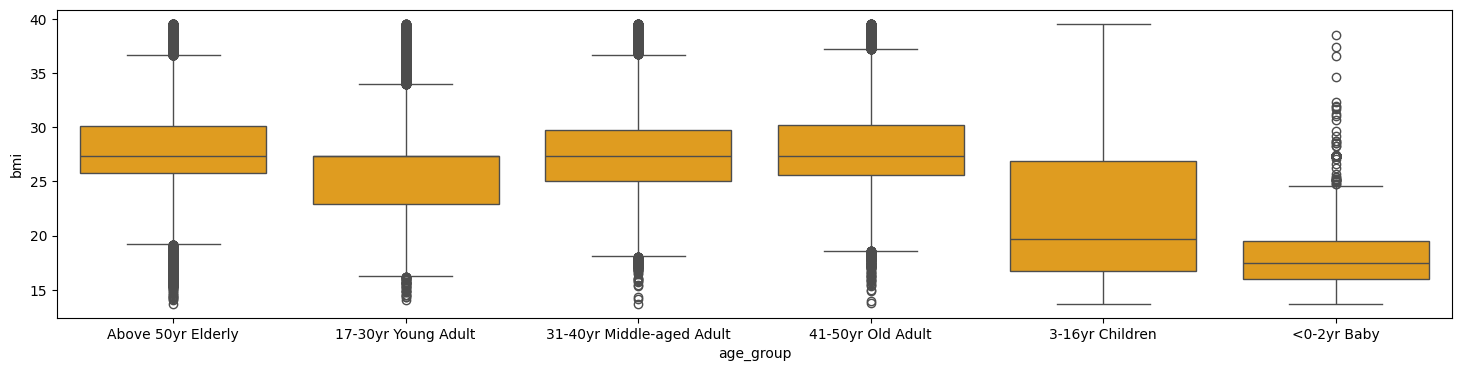

In [92]:
plt.figure(figsize=(18,4))
sns.boxplot(x="age_group", y="bmi", data=data, color="orange")
plt.show()

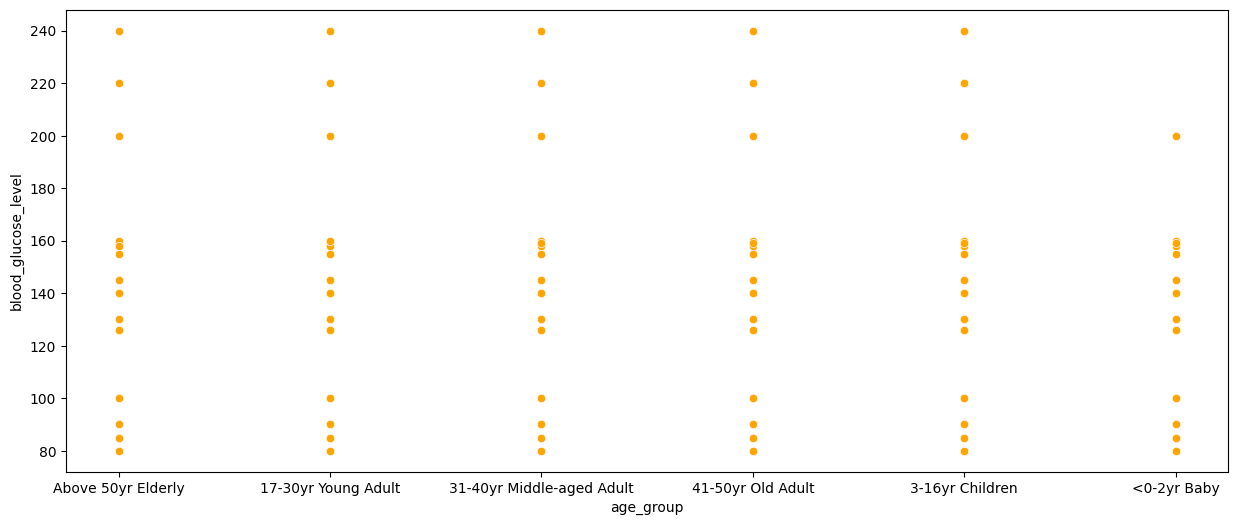

In [93]:
plt.figure(figsize=(15,6))
sns.scatterplot(x="age_group", y="blood_glucose_level", data=data, color="orange");

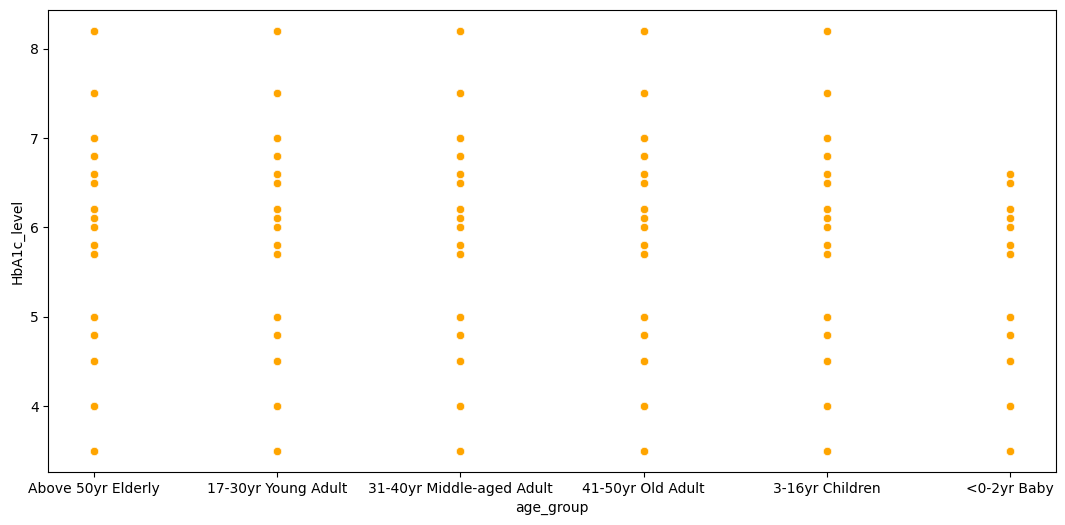

In [94]:
plt.figure(figsize=(13,6))
sns.scatterplot(x="age_group", y="HbA1c_level", data=data, color="orange");

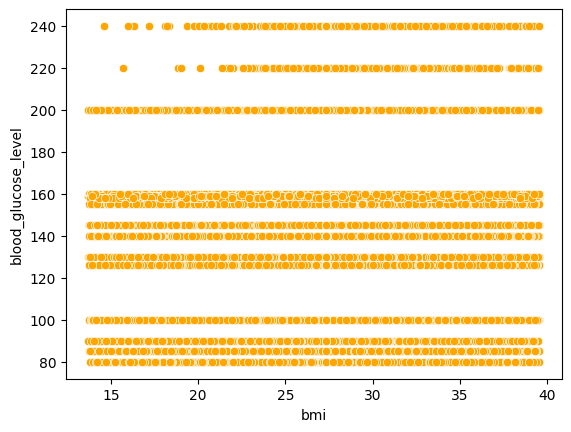

In [95]:
sns.scatterplot(x="bmi", y="blood_glucose_level", data=data, color="orange");

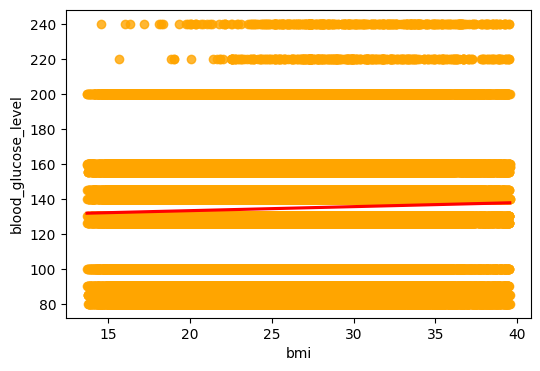

In [96]:
plt.figure(figsize=(6,4))
sns.regplot(x="bmi", y="blood_glucose_level", data=data, color="orange", line_kws={"color":"red"});
plt.show()

In [97]:
#Also calculating the correlation value above using:
data["blood_glucose_level"].corr(data["bmi"])

#result 0.034 shows low or no +ve correlation, usaully >0.5 is a strong +ve correlation (spectrum -1 to 0 and +1)

0.033998680279644415

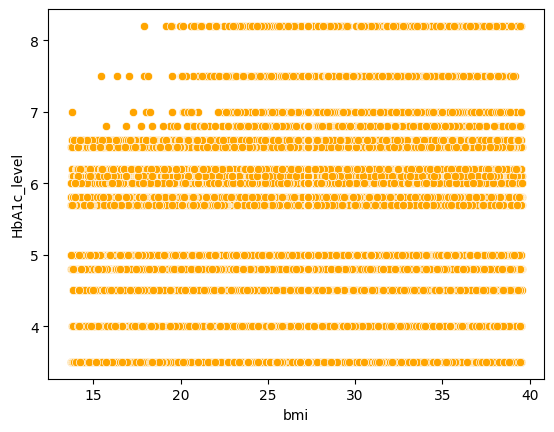

In [98]:
sns.scatterplot(x="bmi", y="HbA1c_level", data=data, color="orange");

C:\Users\ss7u27368\AppData\Local\Temp\ipykernel_43640\390747378.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  figure_plot = sns.barplot(x="diabetes", y="age", data=data, palette={"navy", "slategray"}, errorbar=None)


''

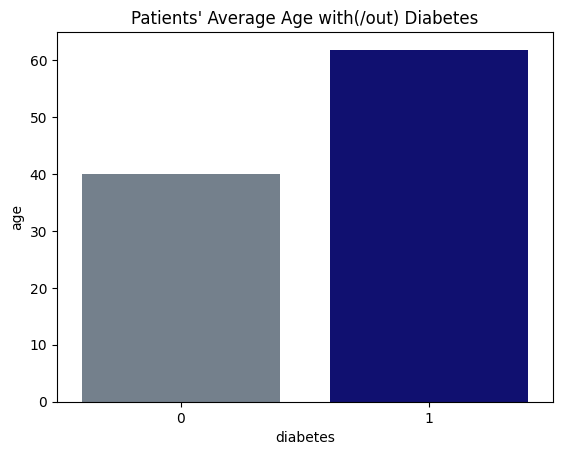

In [99]:
#Numerical vs categorical
#age vs diabetes
figure_plot = sns.barplot(x="diabetes", y="age", data=data, palette={"navy", "slategray"}, errorbar=None)
figure_plot.set_title("Patients' Average Age with(/out) Diabetes");
; 
#we usually put the categorical data on the x axis

 - Plot above shows the average age of majority of patients with diabetes is around 60 years


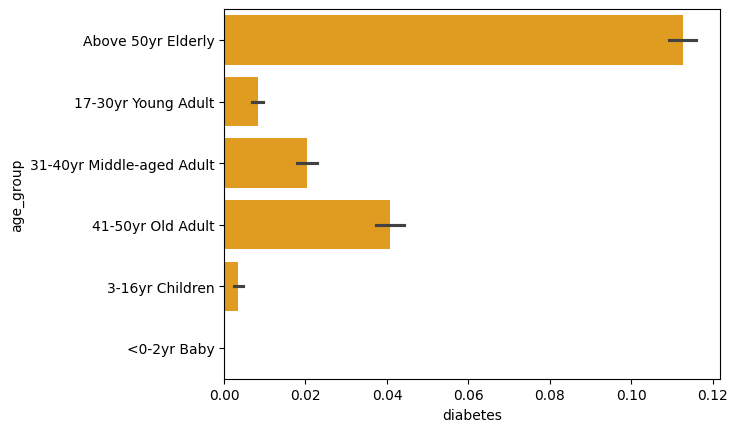

In [100]:
#age_group vs diabetes preferrably
sns.barplot(x="diabetes", y="age_group", data=data, color="orange");

 - Plot above shows the majority of patients with diabetes above 50 years


In [101]:
numerical_columns

['age', 'bmi', 'HbA1c_level', 'blood_glucose_level']

In [102]:
actual_numerical_columns = ['bmi', 'HbA1c_level', 'blood_glucose_level'] 
#we removed age column as we have proven it is a categorical data

In [103]:
categorical_columns

Index(['gender', 'smoking_history', 'age_group'], dtype='object')

In [104]:
actual_categorical_columns

['age_group',
 'gender',
 'hypertension',
 'heart_disease',
 'smoking_history',
 'diabetes']

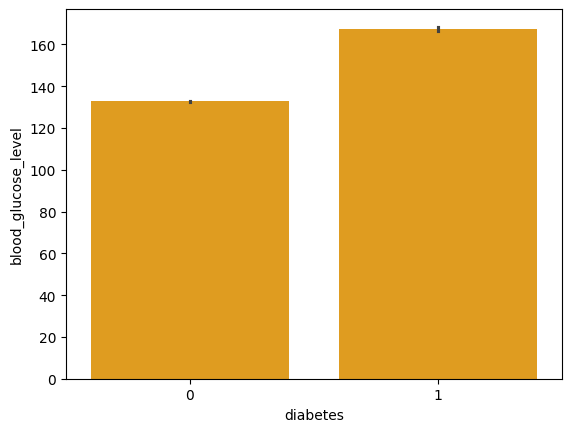

In [105]:
#glucose_level vs diabetes
sns.barplot(x="diabetes", y="blood_glucose_level", data=data, color="orange");

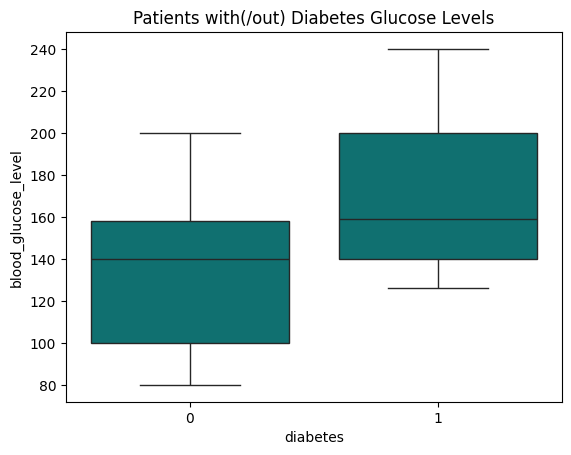

In [106]:
#glucose_level vs diabetes
figure_plot = sns.boxplot(x="diabetes", y="blood_glucose_level", data=data, color="teal")
figure_plot = figure_plot.set_title("Patients with(/out) Diabetes Glucose Levels");

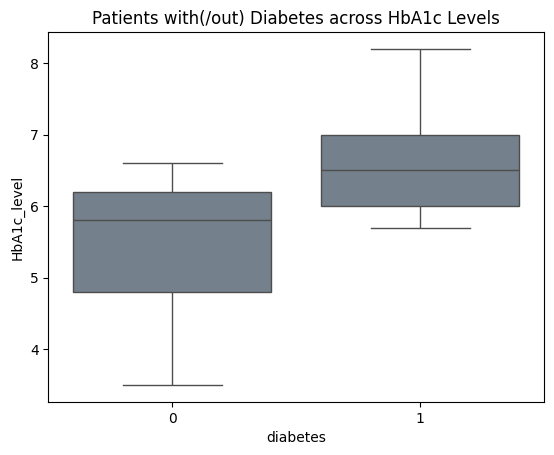

In [107]:
#glucose_level vs diabetes
figure_plot = sns.boxplot(x="diabetes", y="HbA1c_level", data=data, color="slategray")
figure_plot = figure_plot.set_title("Patients with(/out) Diabetes across HbA1c Levels");

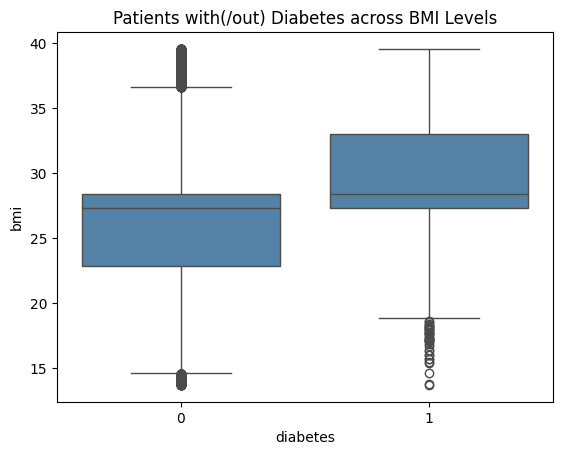

In [108]:
#glucose_level vs diabetes
figure_plot = sns.boxplot(x="diabetes", y="bmi", data=data, color="steelblue")
figure_plot = figure_plot.set_title("Patients with(/out) Diabetes across BMI Levels");

In [109]:
data["age"].value_counts()

#shows the unique values e.g 80, 51, etc. so categorical in nature(data)

80.00    4505
51.00    1391
48.00    1376
47.00    1353
53.00    1342
         ... 
0.48       76
0.24       70
0.40       58
0.16       34
0.08       17
Name: age, Length: 102, dtype: int64

In [110]:
data["age_group"].value_counts()

#shows the unique values e.g 80, 51, etc. so categorical in nature(data)

Above 50yr Elderly           32775
17-30yr Young Adult          15919
41-50yr Old Adult            12713
3-16yr Children              12172
31-40yr Middle-aged Adult    11561
<0-2yr Baby                   3055
Name: age_group, dtype: int64

In [111]:
data["gender"].value_counts()
#shows the unique values e.g Male, Female, Other so categorical in nature(data)

Female    51179
Male      36998
Other        18
Name: gender, dtype: int64

In [112]:
data["diabetes"].value_counts()
#shows the unique values e.g 0, 1 so categorical in nature(data)

0    83577
1     4618
Name: diabetes, dtype: int64

In [113]:
data["bmi"].value_counts()
#shows the so many single values so numerical in nature(data)

27.32    21136
23.00      102
27.12      100
22.40       99
24.96       97
         ...  
13.93        1
37.89        1
37.92        1
38.34        1
14.08        1
Name: bmi, Length: 2582, dtype: int64

In [114]:
actual_categorical_columns

['age_group',
 'gender',
 'hypertension',
 'heart_disease',
 'smoking_history',
 'diabetes']

In [115]:
numerical_columns

['age', 'bmi', 'HbA1c_level', 'blood_glucose_level']

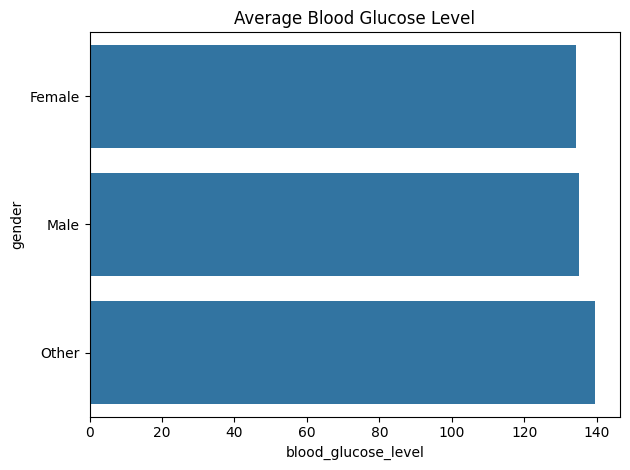

In [116]:

#figure_plot, position = plt.subplots(nrows=5 , ncols=1, figsize=(9,8))
#position = position.flatten() 

#for index, column_name in enumerate(actual_categorical_columns[1:]):
figure_plot = sns.barplot(x="blood_glucose_level", y=data["gender"], data=data, linewidth =0.6, errorbar=None)
    #position[index].grid(True) #including the grid lines for each plot at their respective axis position
figure_plot.set_title("Average Blood Glucose Level")
plt.tight_layout()
plt.show()

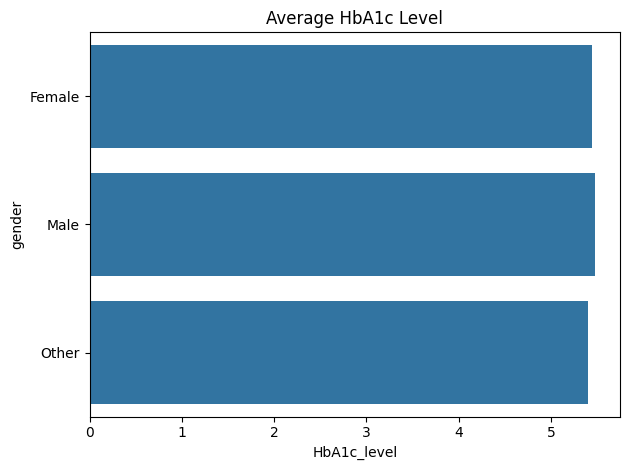

In [117]:
#figure_plot, position = plt.subplots(nrows=5 , ncols=1, figsize=(9,8))
#position = position.flatten() 

#for index, column_name in enumerate(actual_categorical_columns[1:]):
figure_plot = sns.barplot(x="HbA1c_level", y=data["gender"], data=data, linewidth =0.6, errorbar=None)
    #position[index].grid(True) #including the grid lines for each plot at their respective axis position
figure_plot.set_title("Average HbA1c Level")

plt.tight_layout()
plt.show()


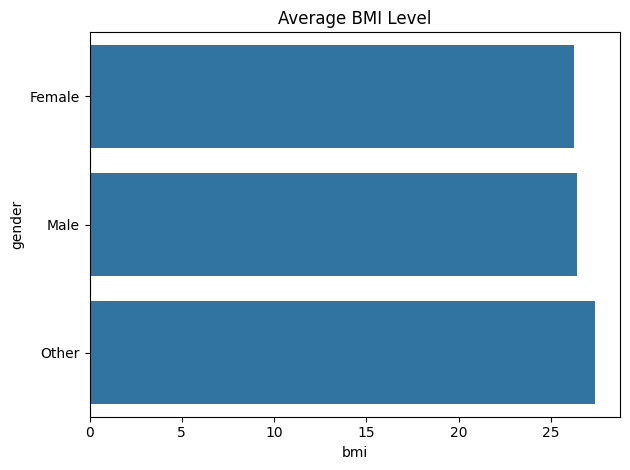

In [118]:
#figure_plot, position = plt.subplots(nrows=5 , ncols=1, figsize=(9,8))
#position = position.flatten() 

#for index, column_name in enumerate(actual_categorical_columns[1:]):
figure_plot = sns.barplot(x="bmi", y=data["gender"], data=data, linewidth =0.6, errorbar=None)
    #position[index].grid(True) #including the grid lines for each plot at their respective axis position
figure_plot.set_title("Average BMI Level")

plt.tight_layout()
plt.show()

C:\Users\ss7u27368\AppData\Local\Temp\ipykernel_43640\3578717720.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  figure_plot = sns.barplot(y="blood_glucose_level", x=data["diabetes"], data=data, linewidth =0.6, palette=["forestgreen","maroon"], errorbar=None)


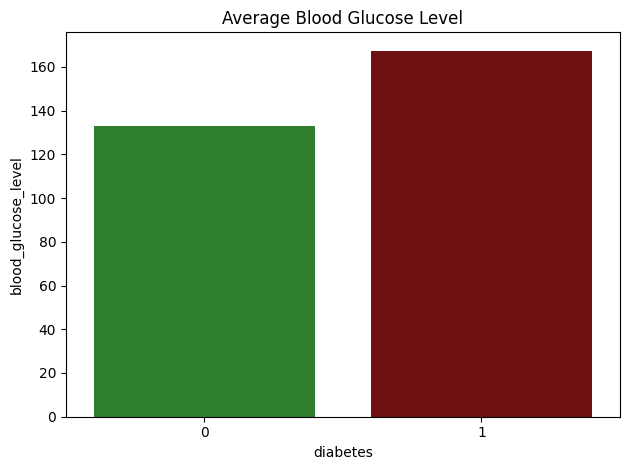

In [119]:
#figure_plot, position = plt.subplots(nrows=5 , ncols=1, figsize=(9,8))
#position = position.flatten() 

#for index, column_name in enumerate(actual_categorical_columns[1:]):
figure_plot = sns.barplot(y="blood_glucose_level", x=data["diabetes"], data=data, linewidth =0.6, palette=["forestgreen","maroon"], errorbar=None)
#sns.barplot(y="blood_glucose_level", x=data["diabetes"], data=data, linewidth =0.6, errorbar=None)
figure_plot.set_title("Average Blood Glucose Level")

#position[index].grid(True) #including the grid lines for each plot at their respective axis position

plt.tight_layout()
plt.show()


C:\Users\ss7u27368\AppData\Local\Temp\ipykernel_43640\4168618571.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  figure_plot = sns.barplot(y="HbA1c_level", x=data["diabetes"], data=data, linewidth =0.6, palette=["forestgreen","lightcoral"], errorbar=None)


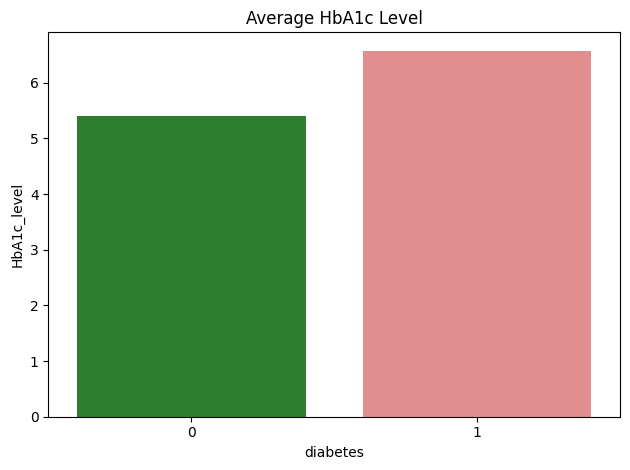

In [120]:
#figure_plot, position = plt.subplots(nrows=5 , ncols=1, figsize=(9,8))
#position = position.flatten() 

#for index, column_name in enumerate(actual_categorical_columns[1:]):
figure_plot = sns.barplot(y="HbA1c_level", x=data["diabetes"], data=data, linewidth =0.6, palette=["forestgreen","lightcoral"], errorbar=None)
#sns.barplot(y="blood_glucose_level", x=data["diabetes"], data=data, linewidth =0.6, errorbar=None)
figure_plot.set_title("Average HbA1c Level")

#position[index].grid(True) #including the grid lines for each plot at their respective axis position

plt.tight_layout()
plt.show()

C:\Users\ss7u27368\AppData\Local\Temp\ipykernel_43640\3284829127.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  figure_plot = sns.barplot(y="bmi", x=data["diabetes"], data=data, linewidth =0.6, palette=["forestgreen","red"], errorbar=None)


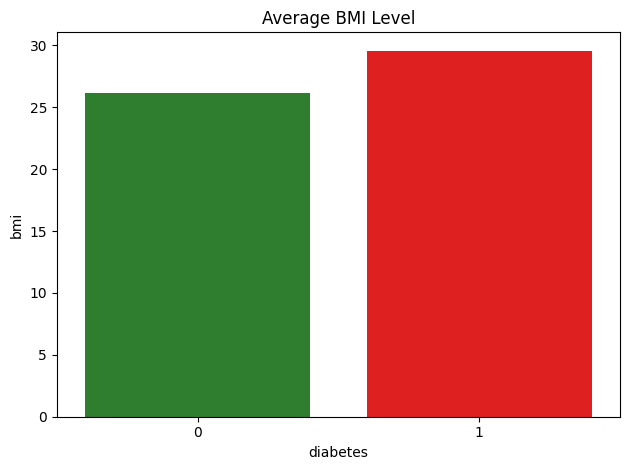

In [121]:

#figure_plot, position = plt.subplots(nrows=5 , ncols=1, figsize=(9,8))
#position = position.flatten() 

#for index, column_name in enumerate(actual_categorical_columns[1:]):
figure_plot = sns.barplot(y="bmi", x=data["diabetes"], data=data, linewidth =0.6, palette=["forestgreen","red"], errorbar=None)
#sns.barplot(y="blood_glucose_level", x=data["diabetes"], data=data, linewidth =0.6, errorbar=None)
figure_plot.set_title("Average BMI Level")

#position[index].grid(True) #including the grid lines for each plot at their respective axis position

plt.tight_layout()
plt.show()

In [122]:
actual_categorical_columns

['age_group',
 'gender',
 'hypertension',
 'heart_disease',
 'smoking_history',
 'diabetes']

In [123]:
actual_numerical_columns

['bmi', 'HbA1c_level', 'blood_glucose_level']

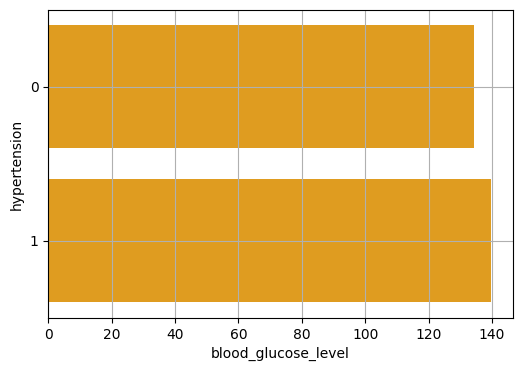

In [124]:
plt.figure(figsize=(6,4))

sns.barplot(y="hypertension", x="blood_glucose_level", orient="h", data=data, color="orange", errorbar=None);

plt.grid(True) #We can add the grid lines to enhance visuals
plt.show()

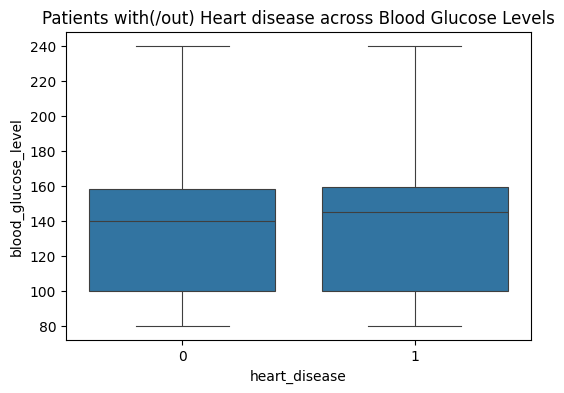

In [125]:
figure_plot = plt.figure(figsize=(6,4))

figure_plot = sns.boxplot(x="heart_disease", y="blood_glucose_level", data=data, linewidth=0.8);
figure_plot = figure_plot.set_title("Patients with(/out) Heart disease across Blood Glucose Levels");
#plt.grid(True) 

plt.show()


- From the above plot, we can see the median blood glucose level of those with heart disease is higher about 145 units than those without heart disease 140 units

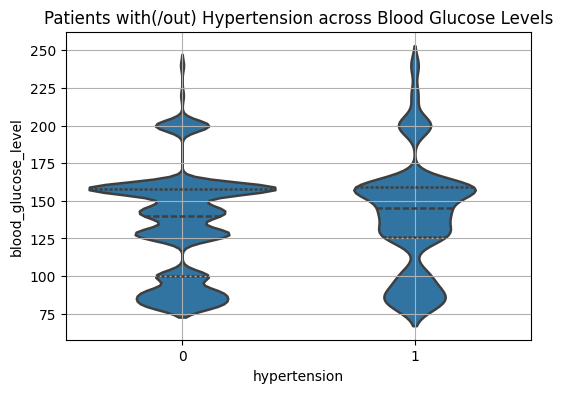

In [126]:
plt.figure(figsize=(6,4))

figure_plot = sns.violinplot(x="hypertension", y="blood_glucose_level", data=data, linewidth=1.8, inner ="quart")
figure_plot = figure_plot.set_title("Patients with(/out) Hypertension across Blood Glucose Levels")

plt.grid(True)
plt.show()

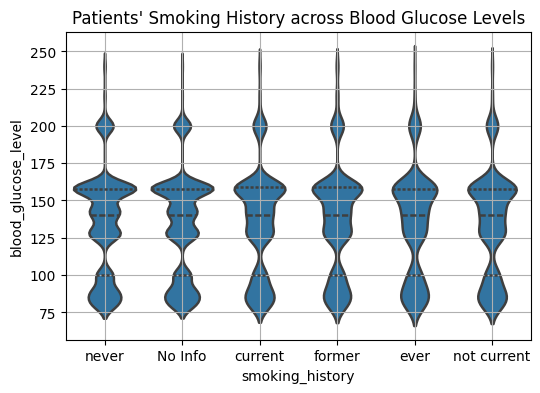

In [127]:
plt.figure(figsize=(6,4))

figure_plot = sns.violinplot(x="smoking_history", y="blood_glucose_level", data=data, linewidth=1.8, inner ="quart");
figure_plot = figure_plot.set_title("Patients' Smoking History across Blood Glucose Levels")

plt.grid(True) 
plt.show()


- Internally the black bar gives a box plot while the area of the violin gives the spread of
the data points where majority of the concentration lies. The median value is represented by the 'white tick' inside the black bar.

- We can see the quart dotted line in the output shows where the box plot starts and ends and also where the median value lies - easier to interpret visually

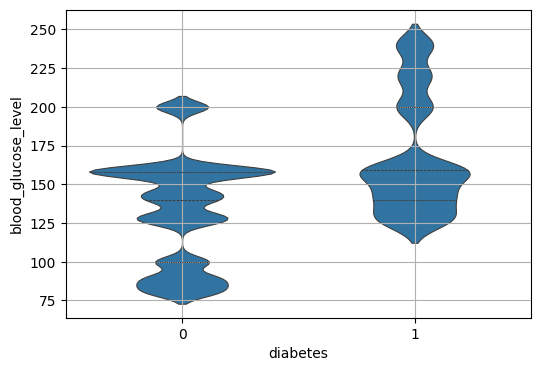

In [128]:
plt.figure(figsize=(6,4))

sns.violinplot(x="diabetes", y="blood_glucose_level", data=data, linewidth=0.8, inner ="quart");

plt.grid(True)
plt.show()

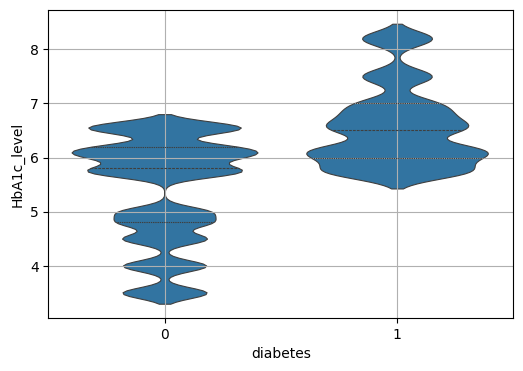

In [129]:
plt.figure(figsize=(6,4))

sns.violinplot(x="diabetes", y="HbA1c_level", data=data, linewidth=0.8, inner ="quart");

plt.grid(True) 
plt.show()

- Above violin plot gives similar results as the boxplot for the blood glucose and HbA1c levels

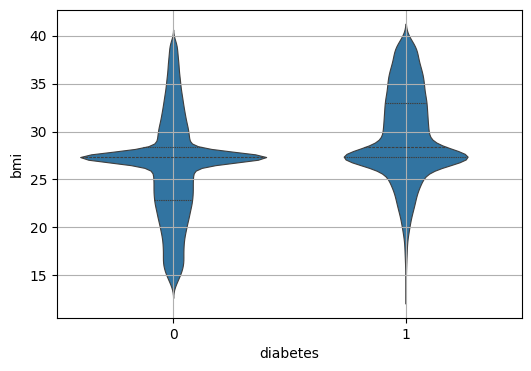

In [130]:
plt.figure(figsize=(6,4))

sns.violinplot(x="diabetes", y="bmi", data=data, linewidth=0.8, inner ="quart");

plt.grid(True)
plt.show()

In [131]:
len(actual_categorical_columns)

6

In [132]:
actual_categorical_columns

['age_group',
 'gender',
 'hypertension',
 'heart_disease',
 'smoking_history',
 'diabetes']

In [133]:
len(actual_numerical_columns)

3

In [134]:
actual_numerical_columns

['bmi', 'HbA1c_level', 'blood_glucose_level']

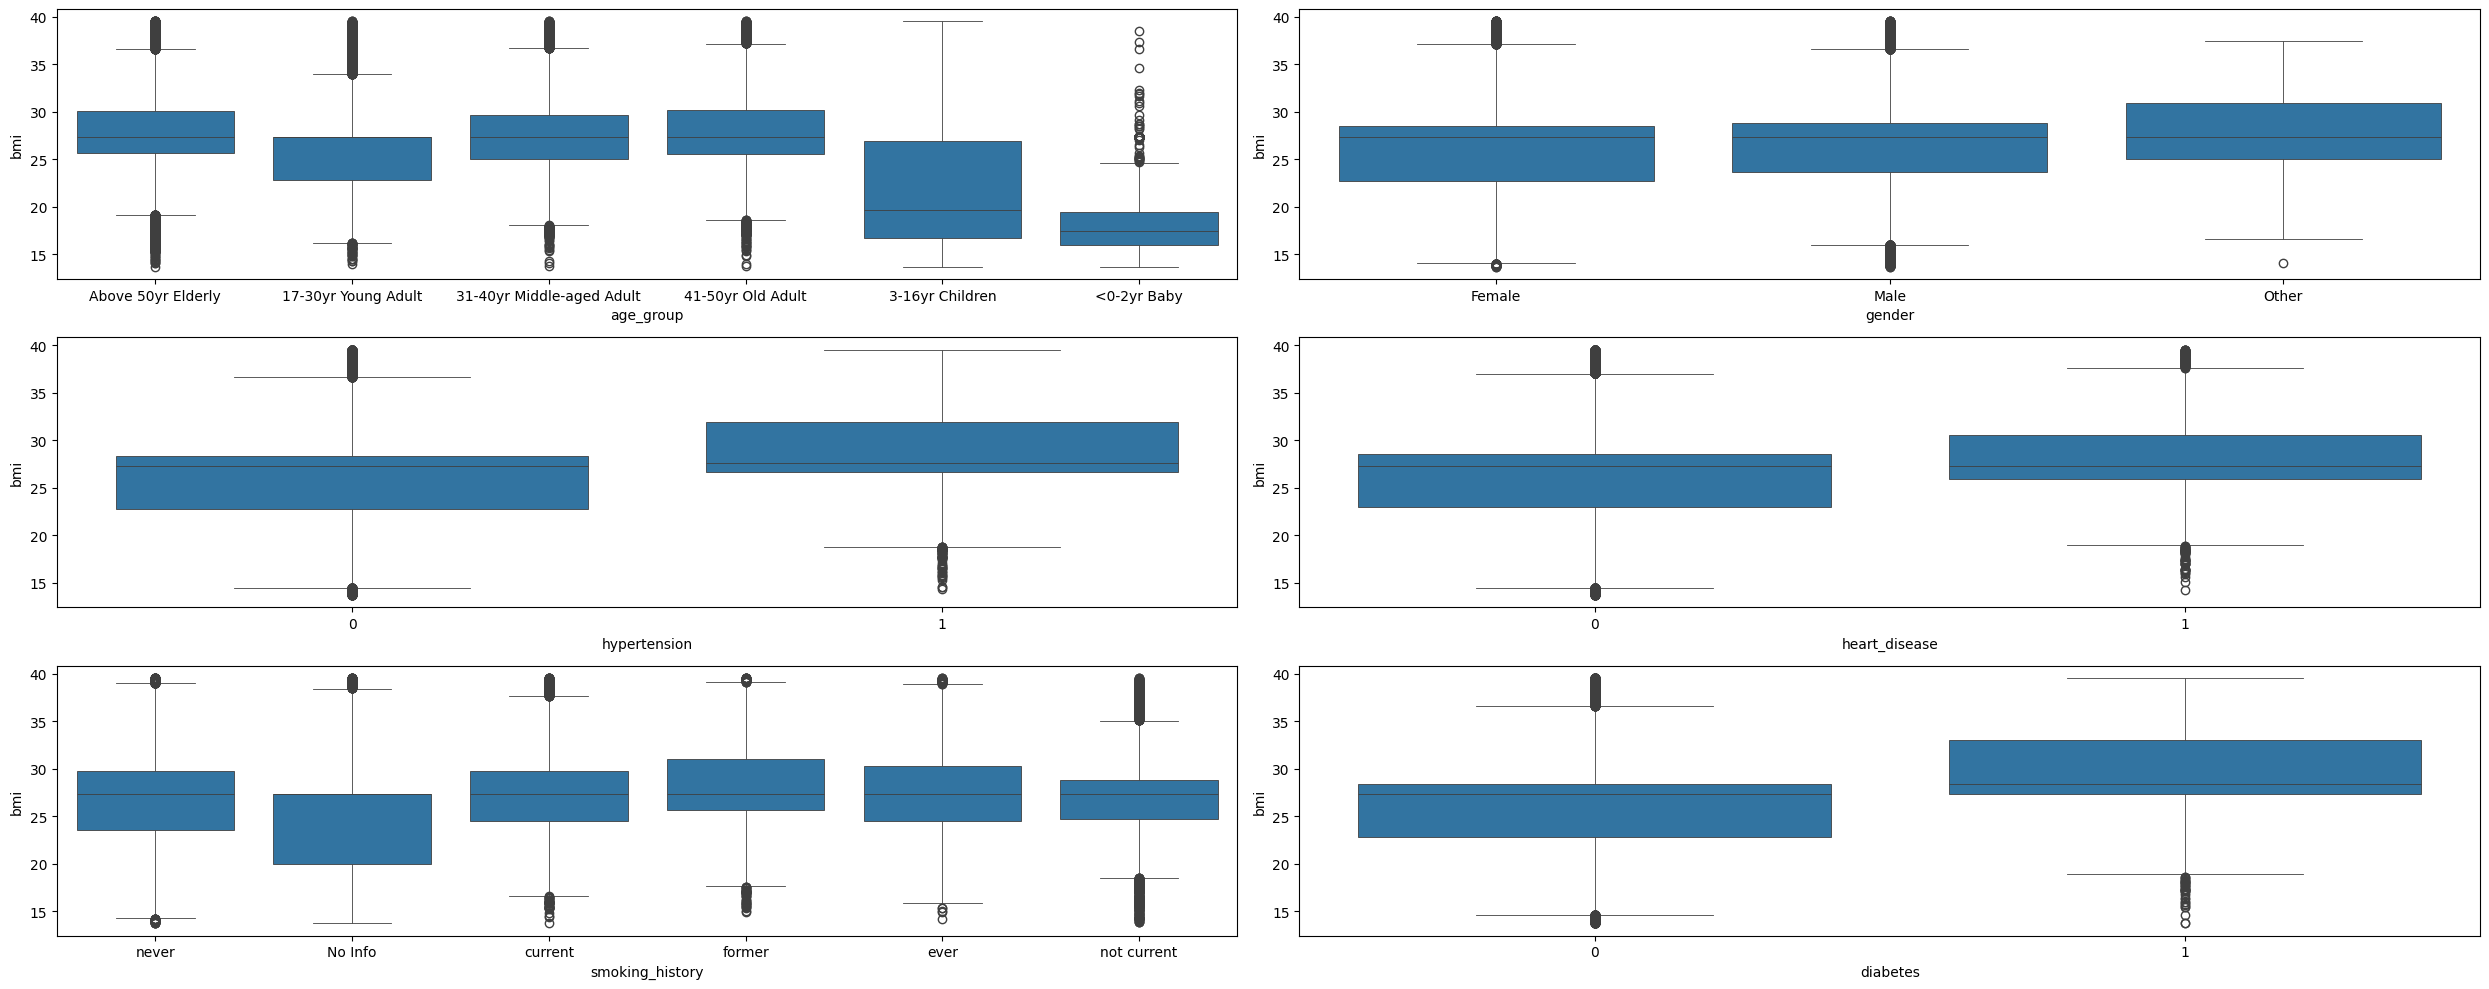

In [135]:
#Now to plot all in one as a mini-dashboard for bmi
#For the categorical columns we use the countplot visualisations. 

figure_plot, position = plt.subplots(nrows=3 , ncols=2, figsize=(25,10))
position = position.flatten() 

for index, column_name in enumerate(actual_categorical_columns):
    sns.boxplot(x=data[column_name],y= "bmi", data=data, linewidth =0.6, ax=position[index])
    
plt.tight_layout()
plt.show()

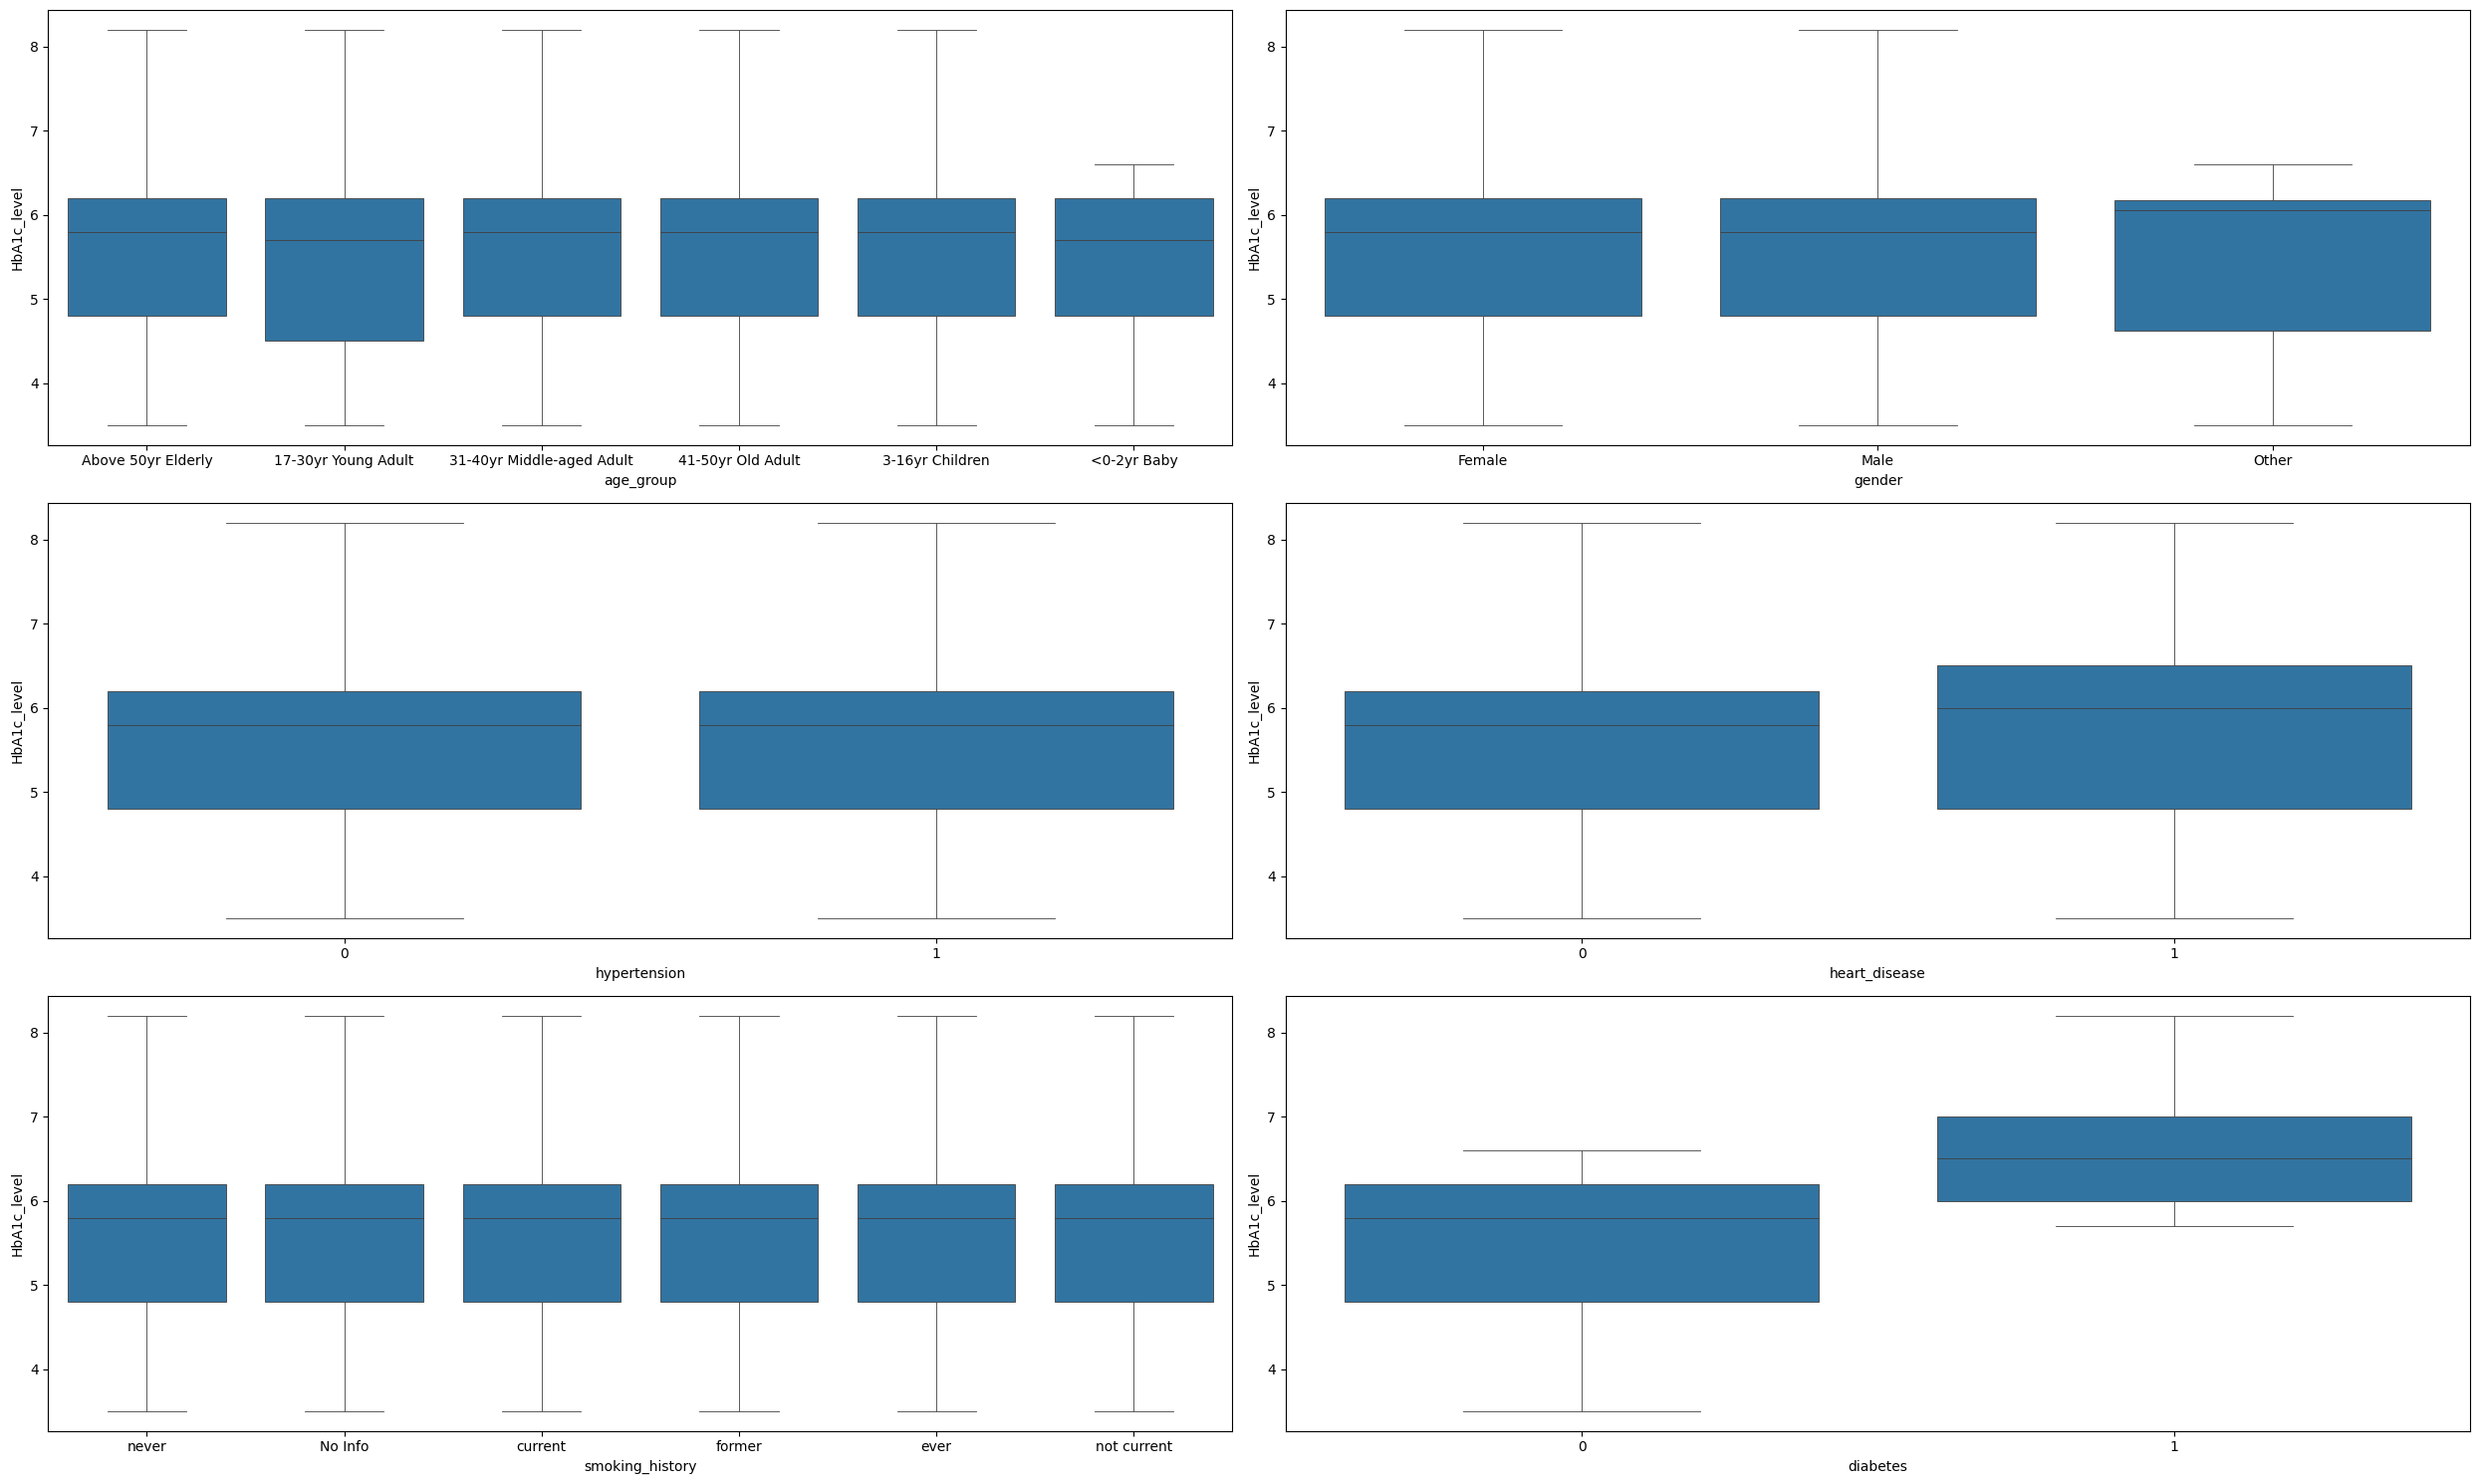

In [136]:
#Now to plot all in one as a mini-dashboard for HbA1c_level

figure_plot, position = plt.subplots(nrows=3 , ncols=2, figsize=(25,15))
position = position.flatten()

for index, column_name in enumerate(actual_categorical_columns):
    sns.boxplot(x=data[column_name],y= "HbA1c_level", data=data, linewidth =0.6, ax=position[index])

plt.tight_layout()
plt.show()

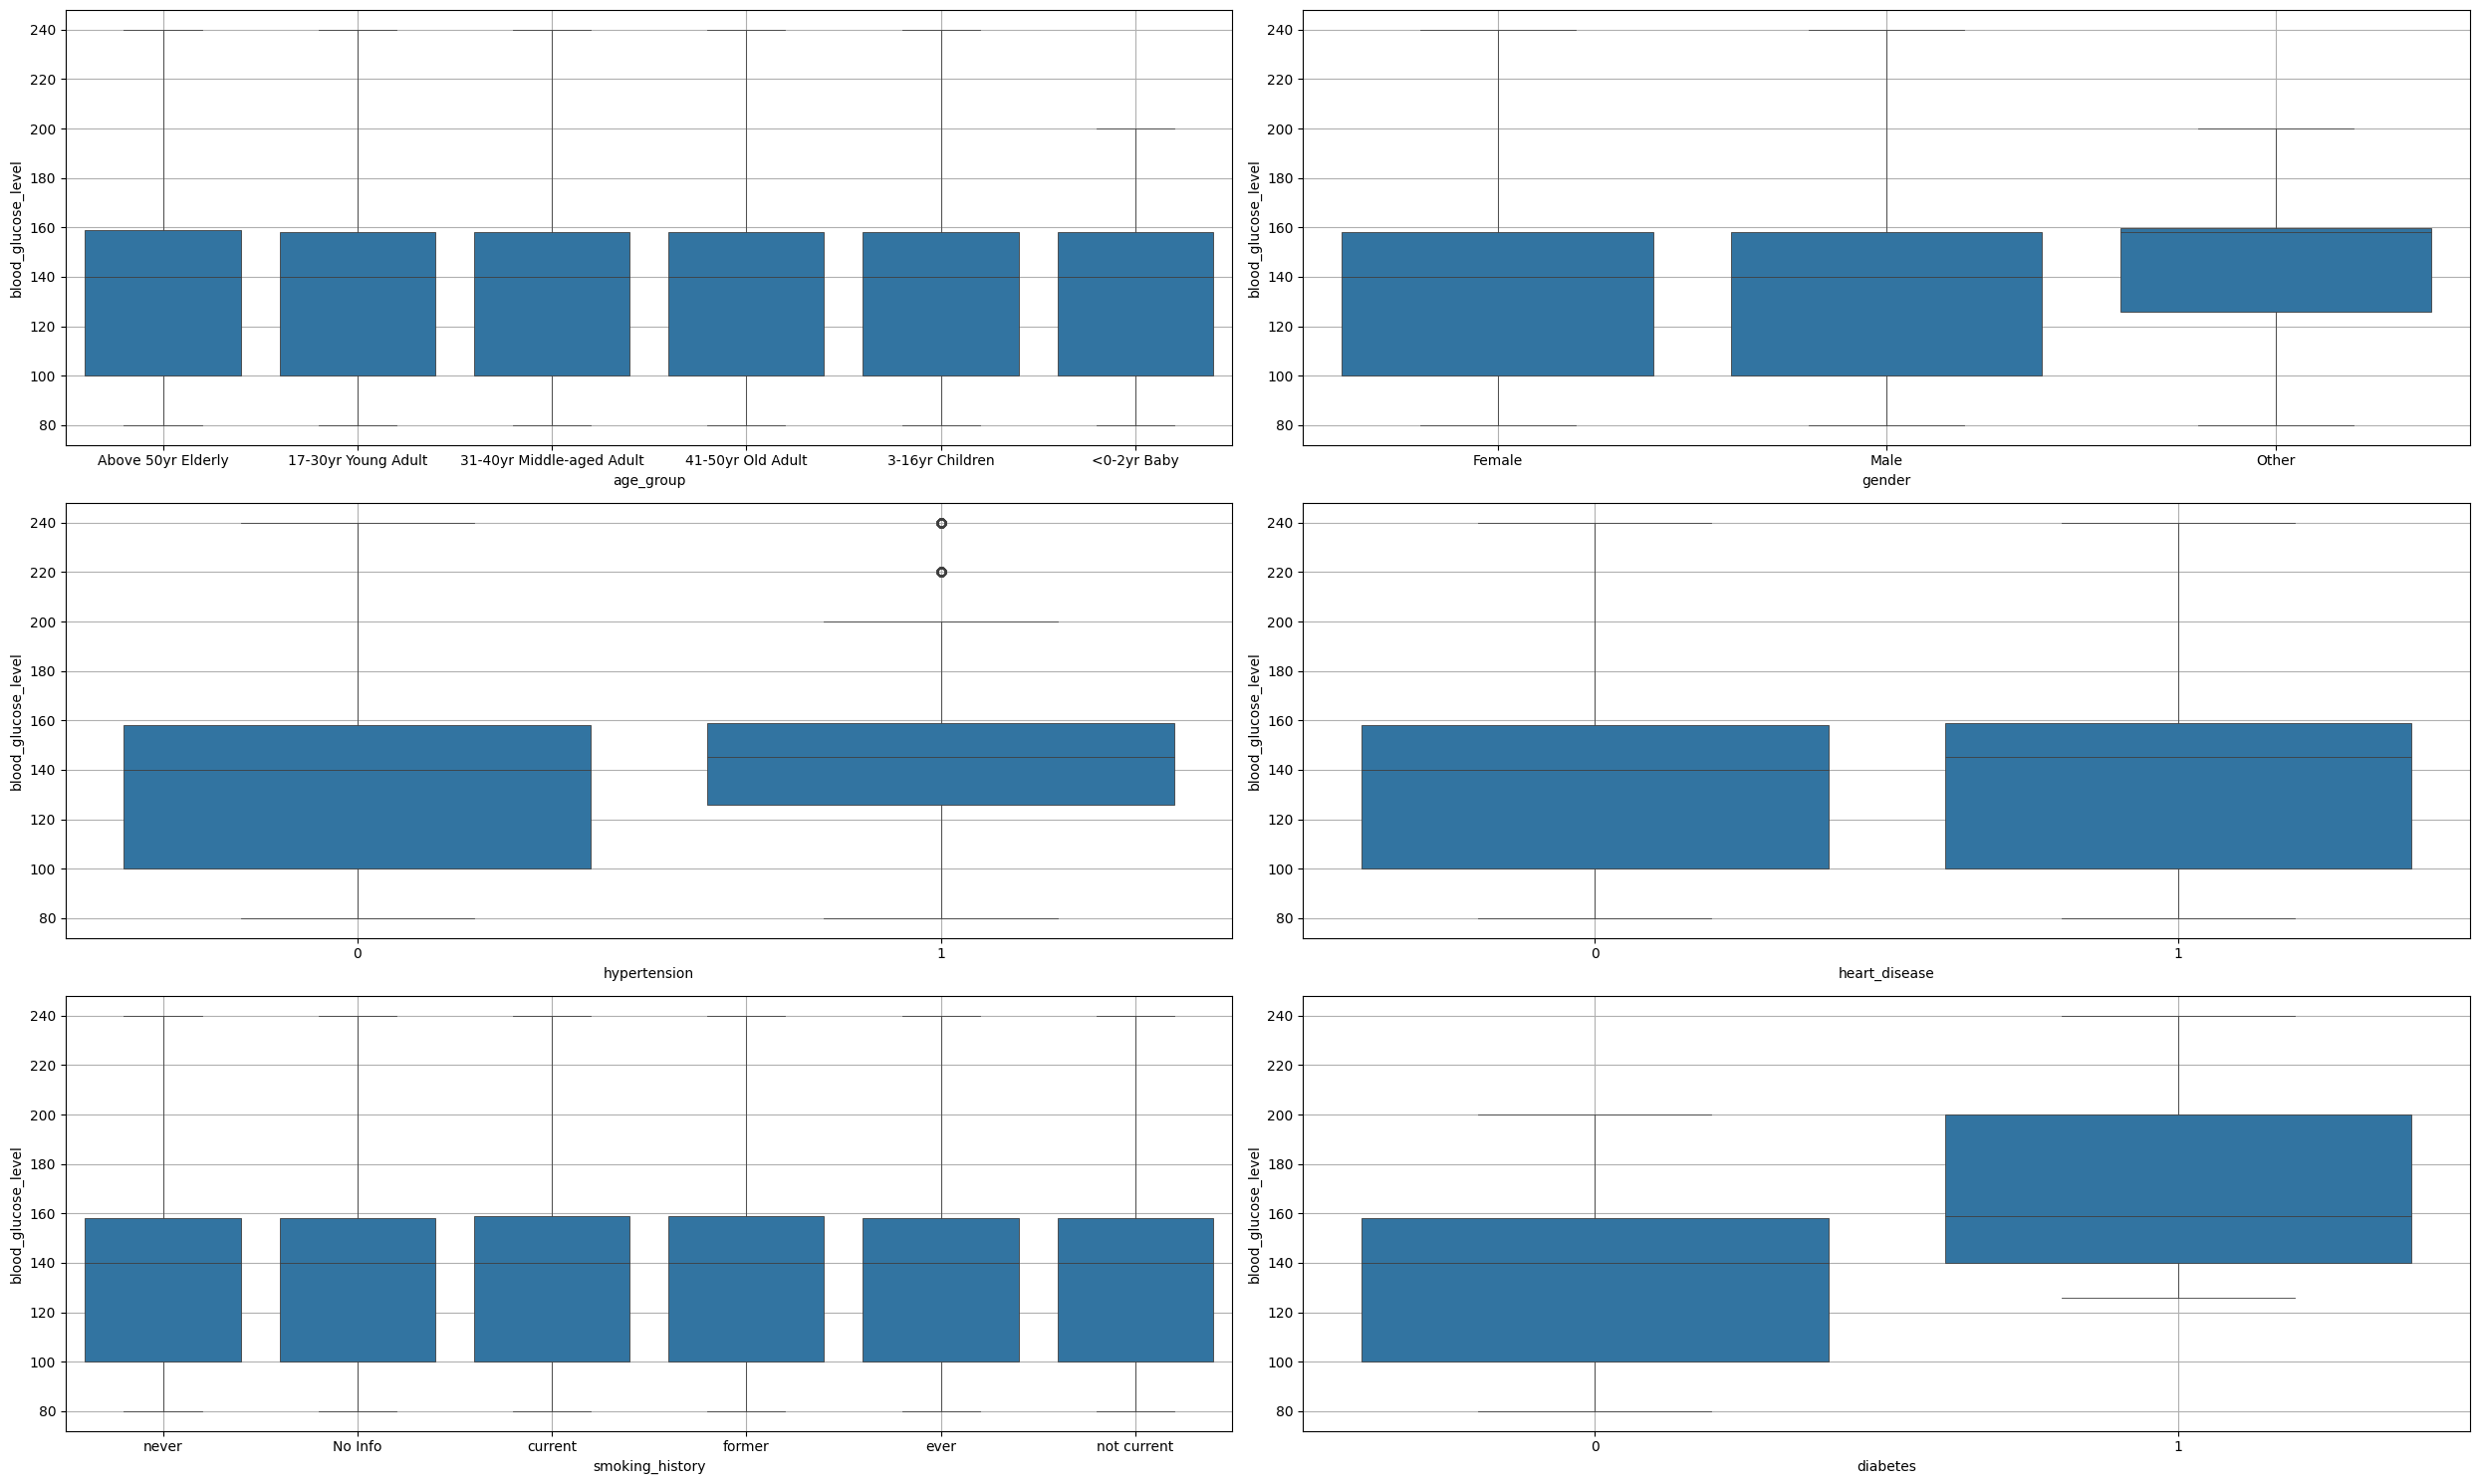

In [137]:
#Now to plot all in one as a mini-dashboard for blood_glucose_level


figure_plot, position = plt.subplots(nrows=3 , ncols=2, figsize=(25,15))
position = position.flatten() 

for index, column_name in enumerate(actual_categorical_columns):
    sns.boxplot(x=data[column_name],y= "blood_glucose_level", data=data, linewidth =0.6, ax=position[index])
    position[index].grid(True) 
    
plt.tight_layout()
plt.show()


 - Boxplot gives you the median score at the bar centre while barplot gives the average value at the bar centre

In [138]:
actual_categorical_columns

['age_group',
 'gender',
 'hypertension',
 'heart_disease',
 'smoking_history',
 'diabetes']

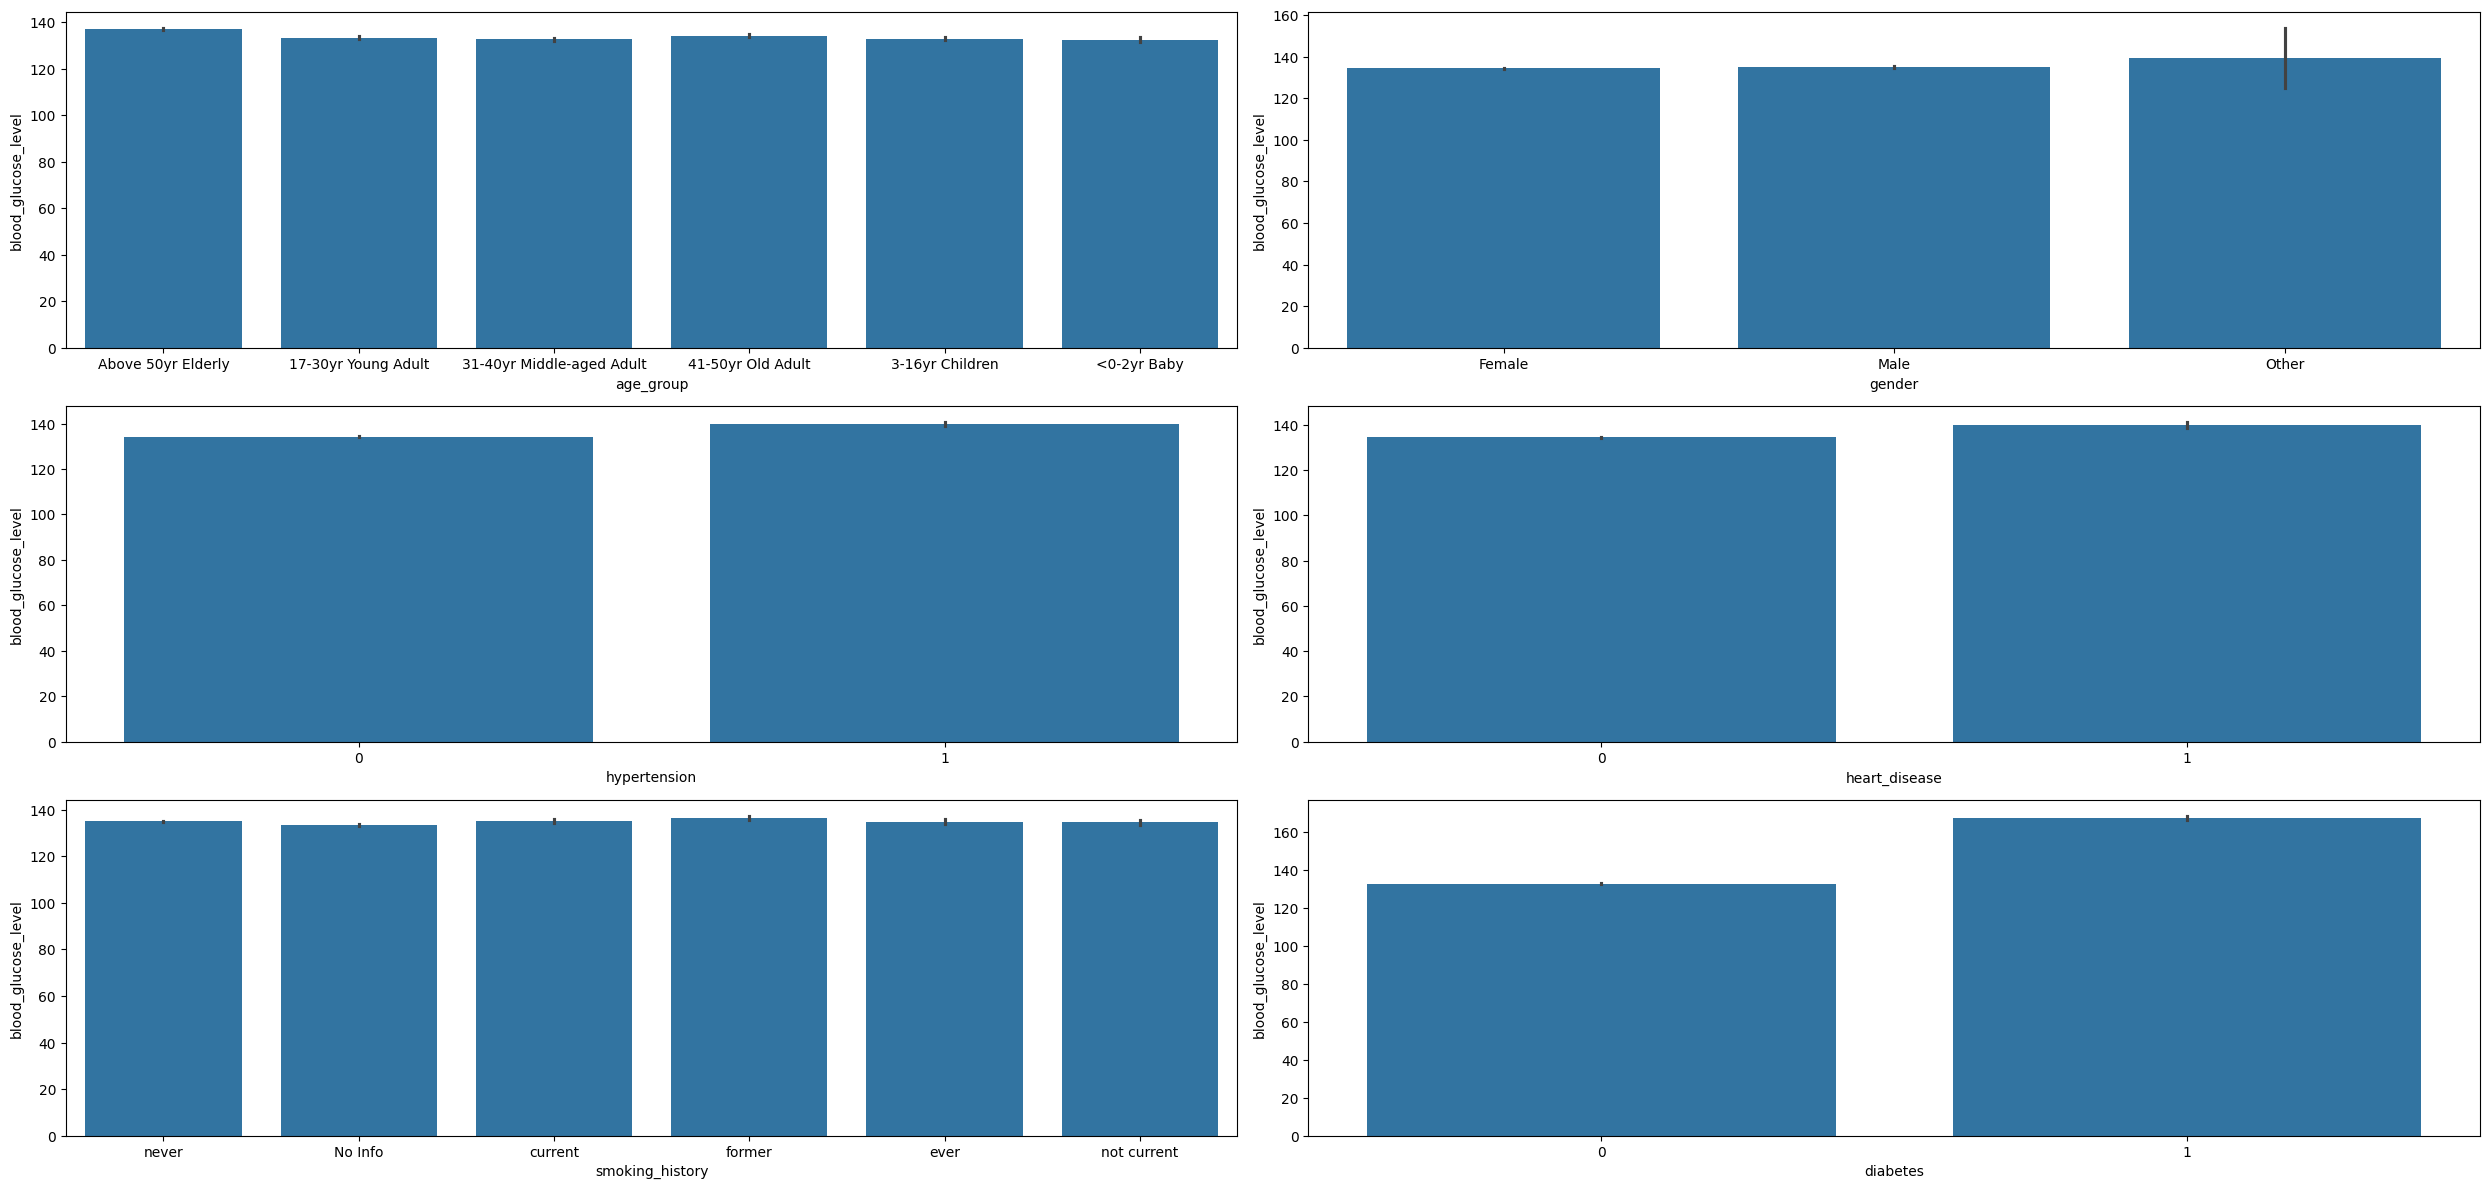

In [139]:

figure_plot, position = plt.subplots(nrows=3 , ncols=2, figsize=(25,12))
position = position.flatten() 

for index, column_name in enumerate(actual_categorical_columns): #Using index[1:] to ignore age_group column for figure size
    sns.barplot(x=data[column_name],y= "blood_glucose_level", data=data, linewidth =0.6, ax=position[index])
    #position[index].grid(True) #including the grid lines for each plot at their respective axis position

plt.tight_layout()
plt.show()


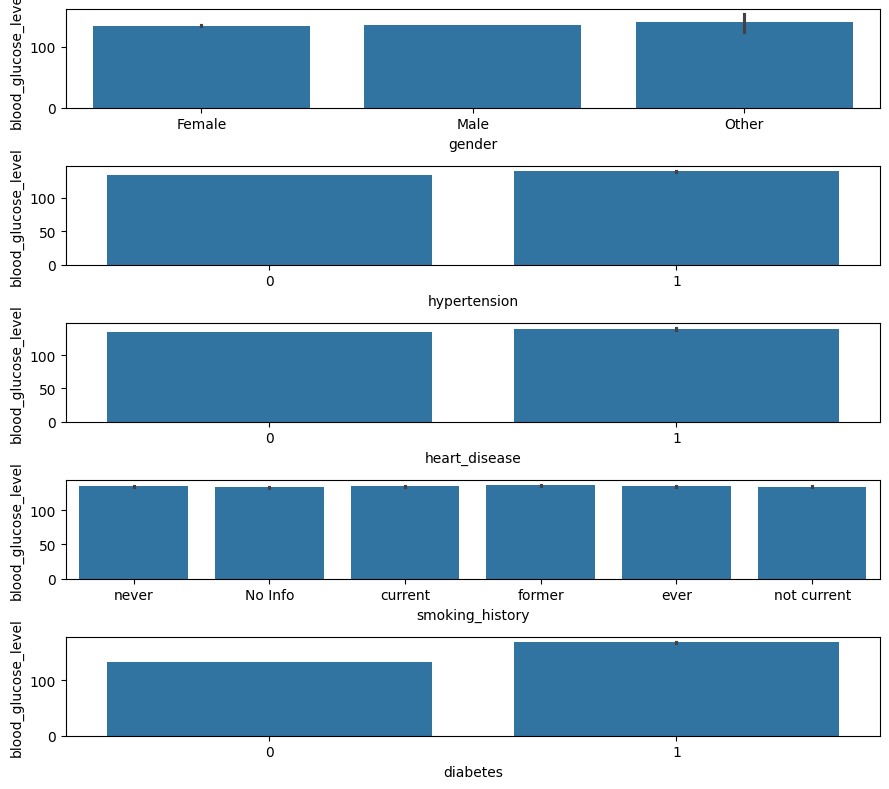

In [140]:

figure_plot, position = plt.subplots(nrows=5 , ncols=1, figsize=(9,8))
position = position.flatten() 

for index, column_name in enumerate(actual_categorical_columns[1:]): #Using index[1:] to ignore age_group column for figure size
    sns.barplot(x=data[column_name],y= "blood_glucose_level", data=data, linewidth =0.6, ax=position[index])
    #position[index].grid(True) #including the grid lines for each plot at their respective axis position

plt.tight_layout()
plt.show()


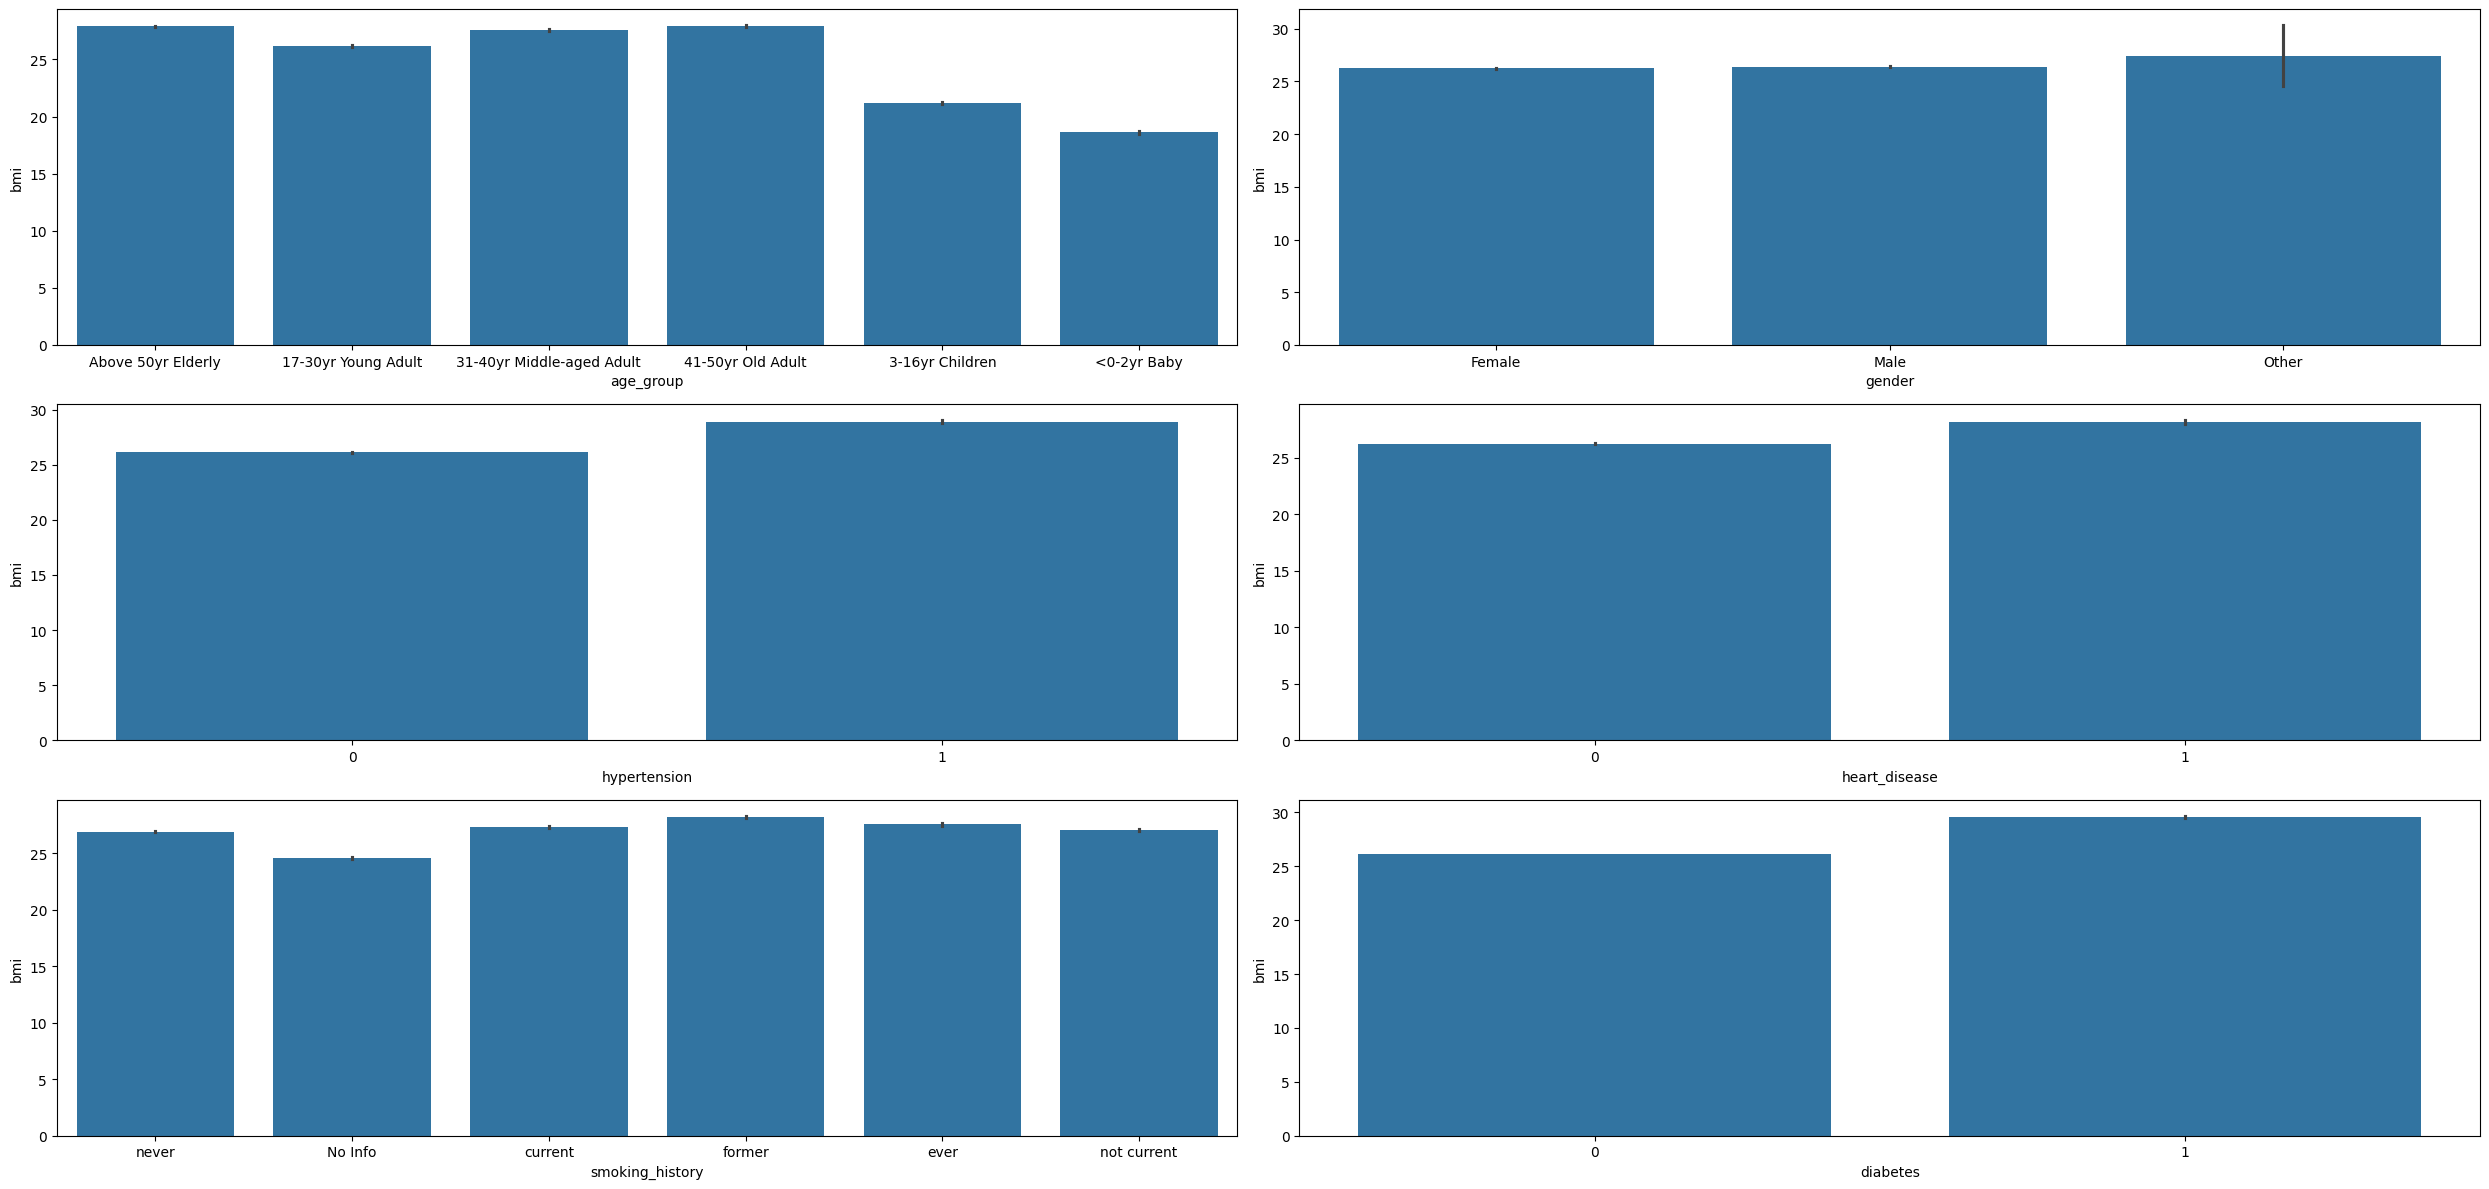

In [141]:
figure_plot, position = plt.subplots(nrows=3 , ncols=2, figsize=(25,12))
position = position.flatten() 

for index, column_name in enumerate(actual_categorical_columns):
    sns.barplot(x=data[column_name],y= "bmi", data=data, linewidth =0.6, ax=position[index])
    #position[index].grid(True) 
    
plt.tight_layout()
plt.show()

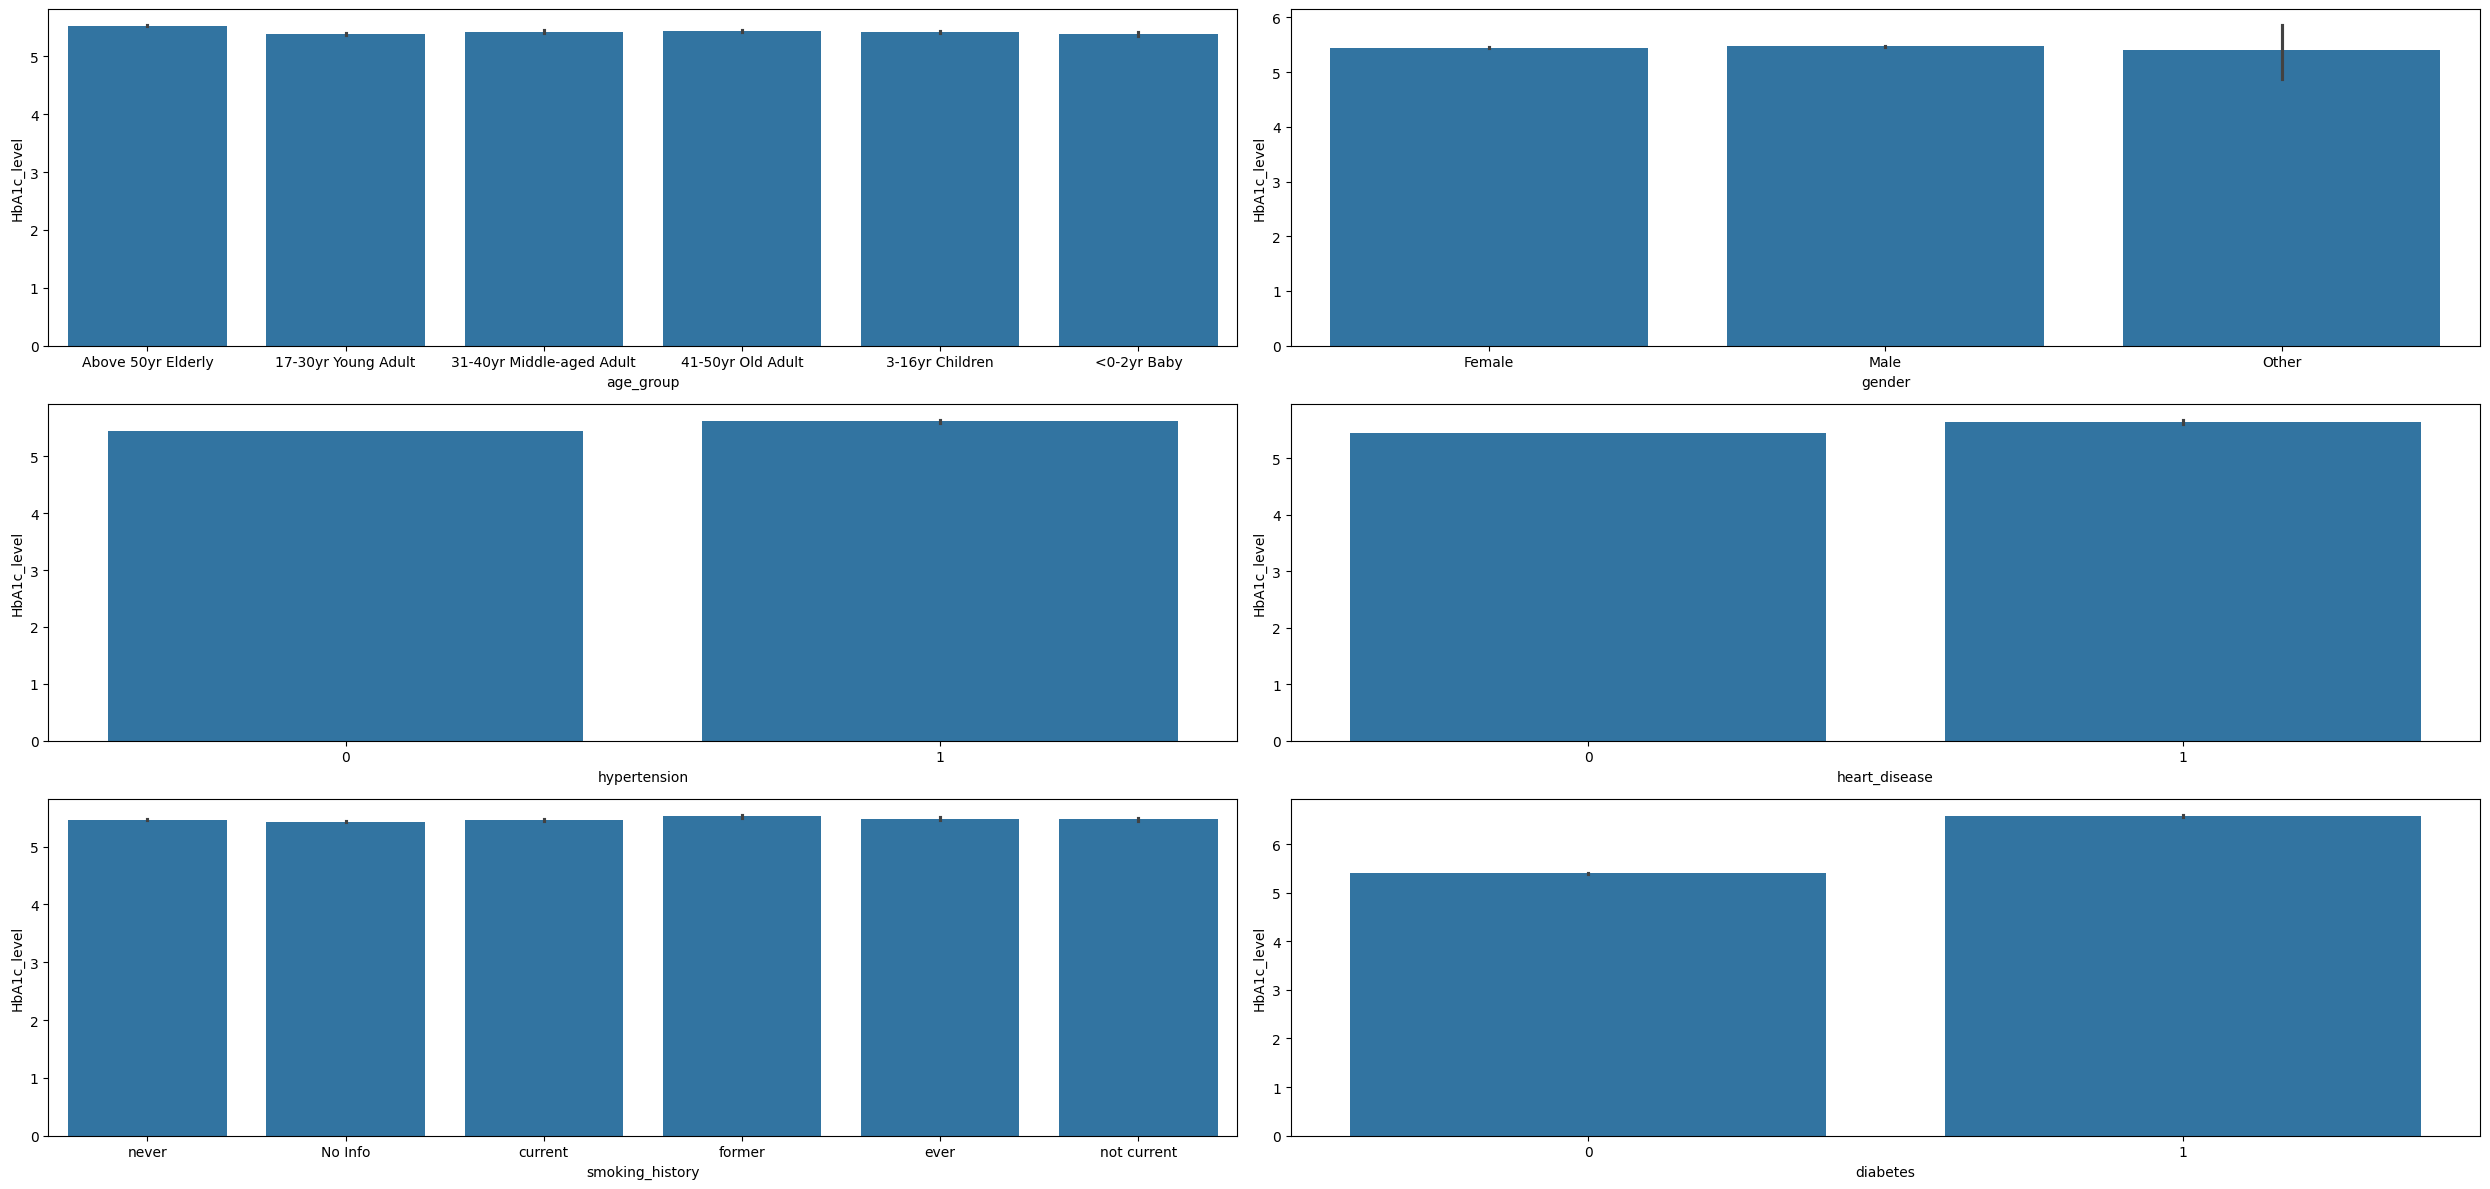

In [142]:
figure_plot, position = plt.subplots(nrows=3 , ncols=2, figsize=(25,12))
position = position.flatten() #helps reduce the dimension of the 2D array to a single 1D array

for index, column_name in enumerate(actual_categorical_columns):
    sns.barplot(x=data[column_name],y= "HbA1c_level", data=data, linewidth =0.6, ax=position[index])
    #position[index].grid(True)
    
plt.tight_layout()
plt.show()

- The thicker tick on each bar means we have like outlier values that shifted the mean upwards 

#### Categorical versus Categorical Features/Columns
- using stacked bar plots or grouped bar plots
- here we will create a cross tab/contigency table to sum the frequencies

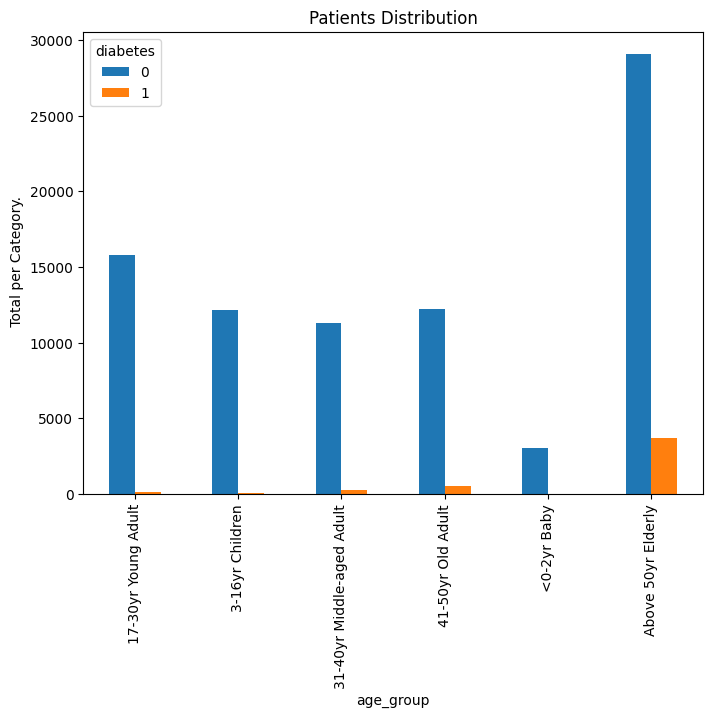

In [143]:
axes_plot = pd.crosstab(data["age_group"], data["diabetes"]).plot(kind="bar", figsize=(8,6));
#Adding titles
axes_plot.set_title("Patients Distribution")
#plt.xlabel("age")
axes_plot.set_ylabel(" Total per Category.");

In [144]:
actual_categorical_columns

['age_group',
 'gender',
 'hypertension',
 'heart_disease',
 'smoking_history',
 'diabetes']

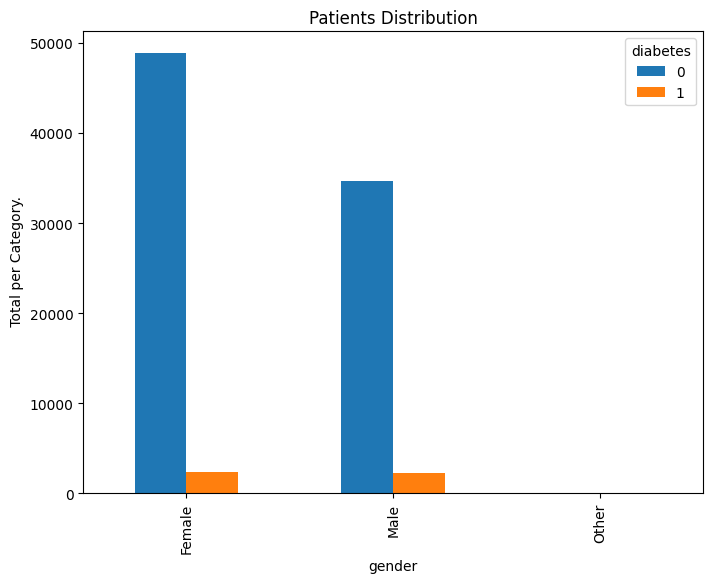

In [145]:
axes_plot = pd.crosstab(data["gender"], data["diabetes"]).plot(kind="bar", figsize=(8,6))
#Adding titles
axes_plot.set_title("Patients Distribution")
#plt.xlabel("age")
axes_plot.set_ylabel(" Total per Category.");

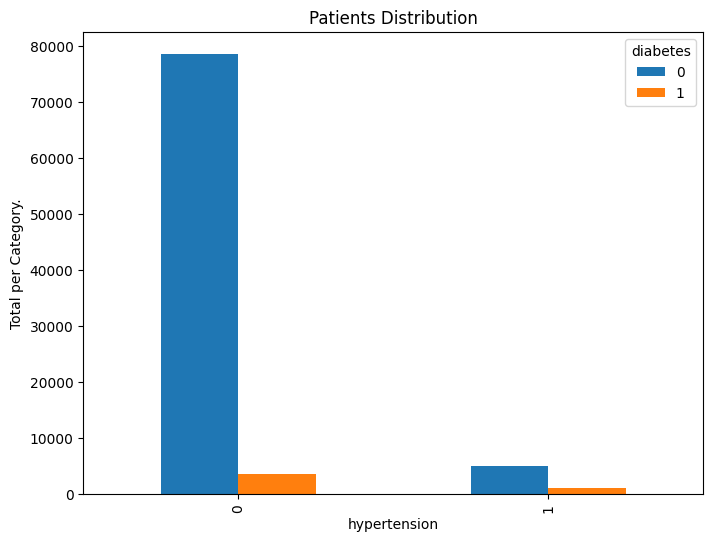

In [146]:
axes_plot = pd.crosstab(data["hypertension"], data["diabetes"]).plot(kind="bar", figsize=(8,6))
#Adding titles
axes_plot.set_title("Patients Distribution")
#plt.xlabel("age")
axes_plot.set_ylabel("Total per Category.");

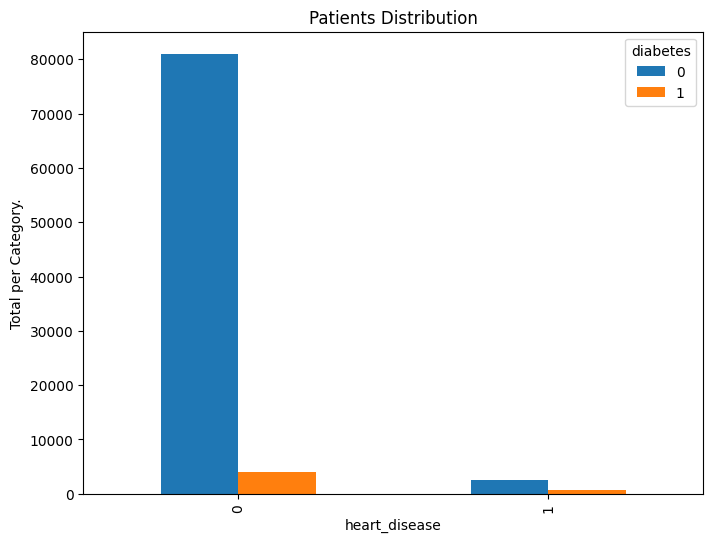

In [147]:
axes_plot = pd.crosstab(data["heart_disease"], data["diabetes"]).plot(kind="bar", figsize=(8,6))
#Adding titles
axes_plot.set_title("Patients Distribution")
#plt.xlabel("age")
axes_plot.set_ylabel("Total per Category.");

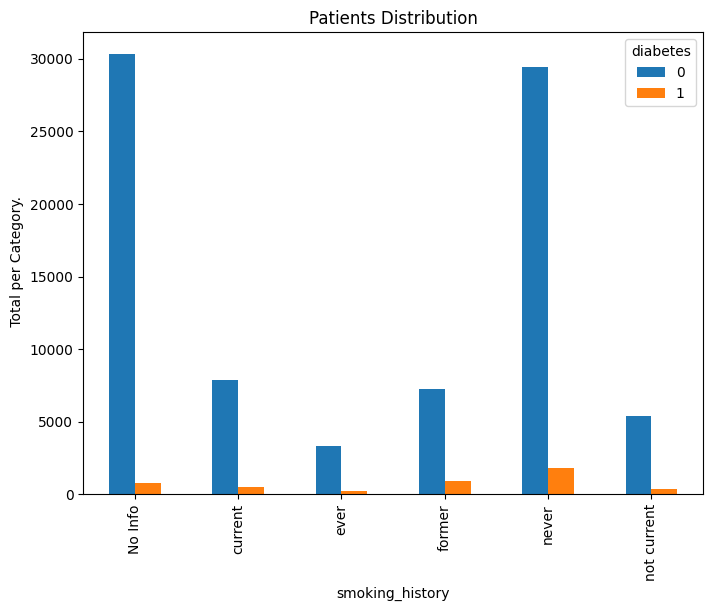

In [148]:
axes_plot = pd.crosstab(data["smoking_history"], data["diabetes"]).plot(kind="bar", figsize=(8,6))
#Adding titles
axes_plot.set_title("Patients Distribution")
#plt.xlabel("age")
axes_plot.set_ylabel(" Total per Category.");

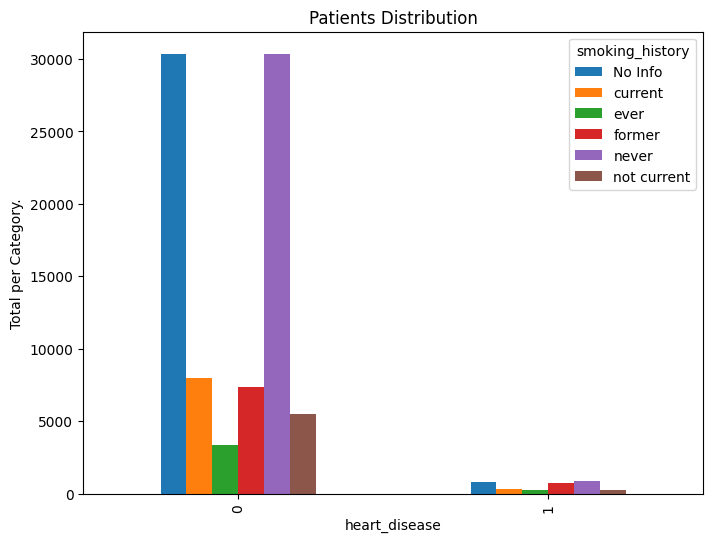

In [149]:
axes_plot = pd.crosstab(data["heart_disease"], data["smoking_history"]).plot(kind="bar", figsize=(8,6))

axes_plot.set_title("Patients Distribution")
#plt.xlabel("age")
axes_plot.set_ylabel("Total per Category.");

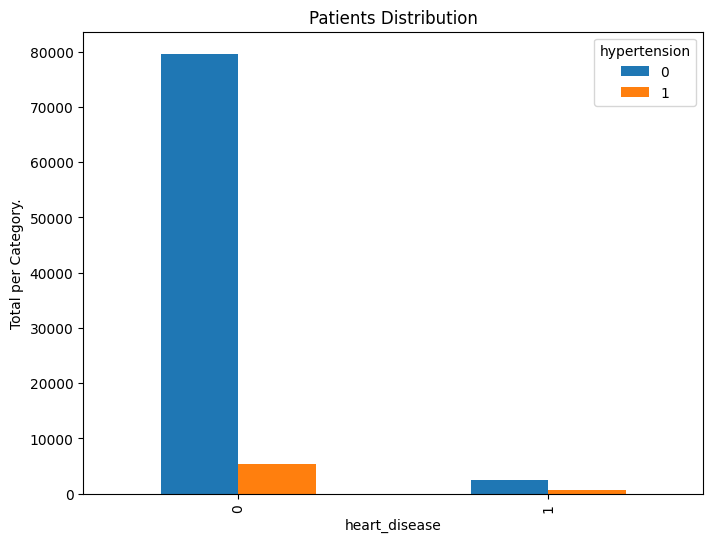

In [150]:
axes_plot = pd.crosstab(data["heart_disease"], data["hypertension"]).plot(kind="bar", figsize=(8,6))
axes_plot.set_title("Patients Distribution")
#plt.xlabel("age")
axes_plot.set_ylabel("Total per Category.");

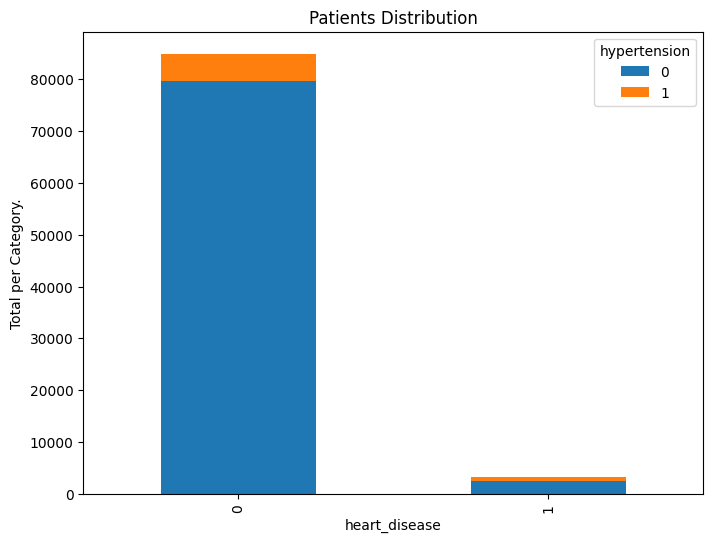

In [151]:
axes_plot = pd.crosstab(data["heart_disease"], data["hypertension"]).plot(kind="bar", stacked=True, figsize=(8,6))
axes_plot.set_title("Patients Distribution")
#plt.xlabel("age")
axes_plot.set_ylabel("Total per Category.");

In [152]:
#Confirm the difference between 'never' and 'ever' category from the above plot

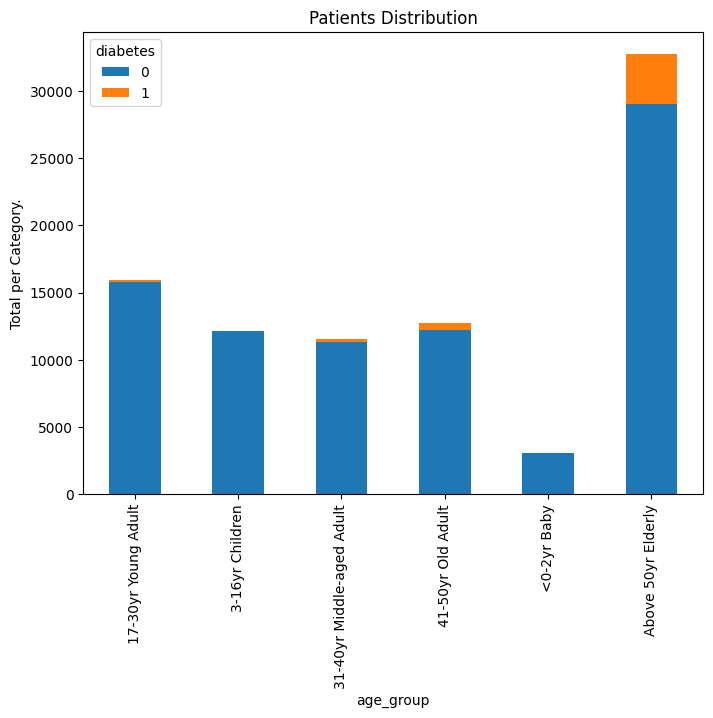

In [153]:
axes_plot = pd.crosstab(data["age_group"], data["diabetes"]).plot(kind="bar", stacked = True, figsize=(8,6))
axes_plot.set_title("Patients Distribution")
#plt.xlabel("age")
axes_plot.set_ylabel("Total per Category.");

In [154]:
actual_categorical_columns

['age_group',
 'gender',
 'hypertension',
 'heart_disease',
 'smoking_history',
 'diabetes']

In [155]:
actual_numerical_columns

['bmi', 'HbA1c_level', 'blood_glucose_level']

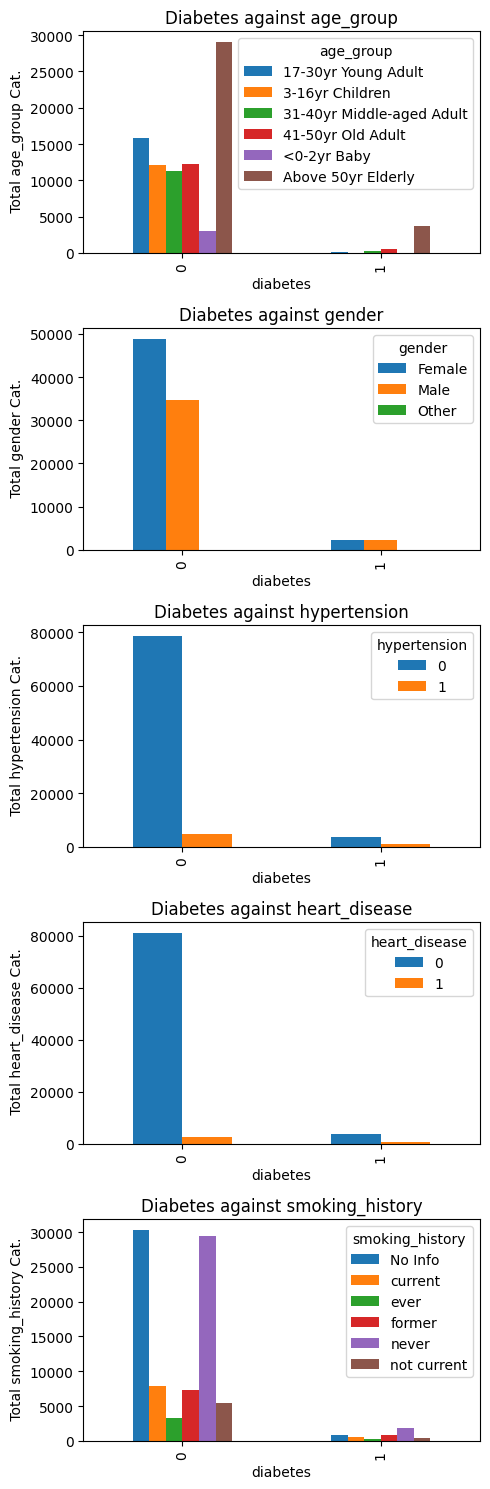

In [156]:
#Now can plot all categerical in one dashboard
figure_plot, position = plt.subplots(nrows=5 , ncols=1, figsize=(5,15))
position = position.flatten() 

for index, column_name in enumerate(actual_categorical_columns[:5]): #notice we sliced out 'age' and 'diabetes' columns using indexing [1:5]
    pd.crosstab(data["diabetes"], data[column_name]).plot(kind="bar", ax=position[index]);
    #position[index].grid(True)
    position[index].set_title(f"Diabetes against {column_name}")
    position[index].set_ylabel(f" Total {column_name} Cat.")
    
plt.tight_layout()
plt.show()

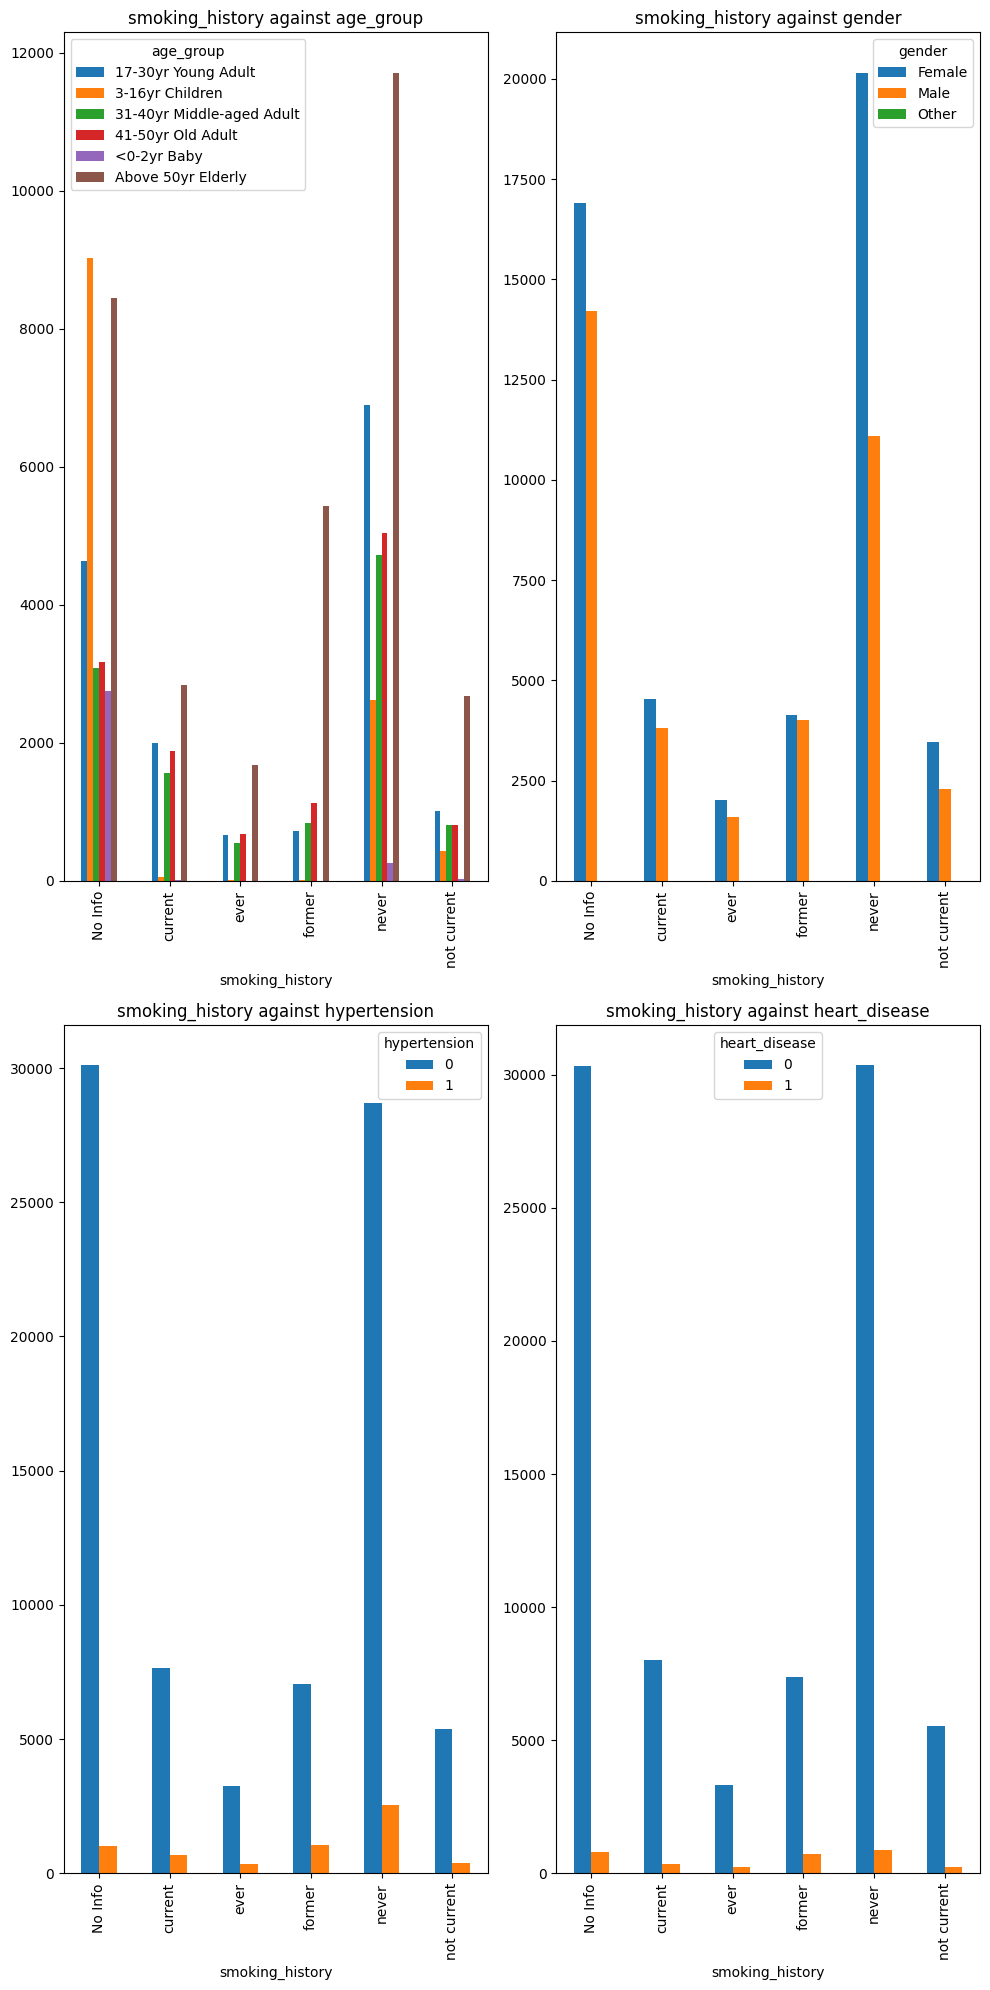

In [157]:
#Now can plot all categerical in one dashboard
figure_plot, position = plt.subplots(nrows=2 , ncols=2, figsize=(10,20))
position = position.flatten()

for index, column_name in enumerate(actual_categorical_columns[:4]):
    pd.crosstab(data["smoking_history"], data[column_name]).plot(kind="bar", ax=position[index]);
    #position[index].grid(True)
    position[index].set_title(f"smoking_history against {column_name}")
    
plt.tight_layout()
plt.show()

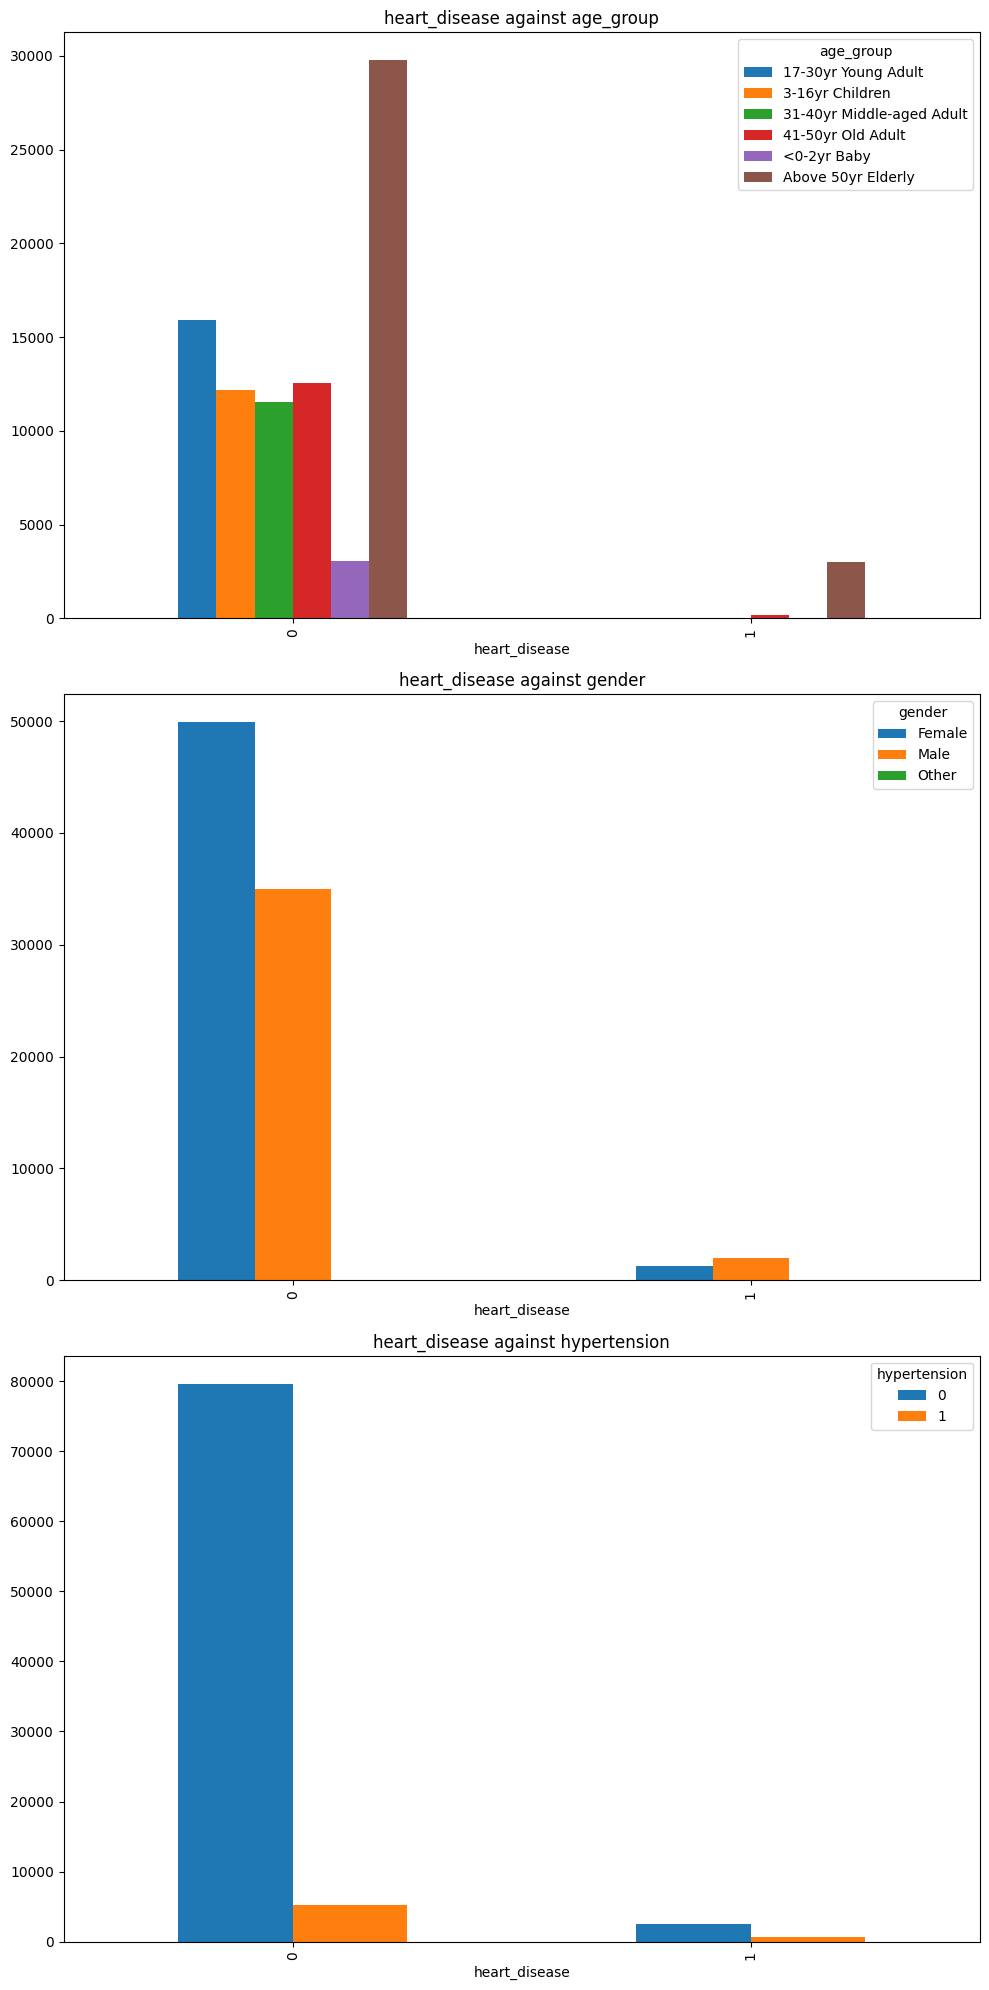

In [158]:
#Now can plot all categerical in one dashboard
figure_plot, position = plt.subplots(nrows=3 , ncols=1, figsize=(10,20))
position = position.flatten()

for index, column_name in enumerate(actual_categorical_columns[:3]):
    pd.crosstab(data["heart_disease"], data[column_name]).plot(kind="bar", ax=position[index]);
    #position[index].grid(True)
    position[index].set_title(f"heart_disease against {column_name}")
    
plt.tight_layout()
plt.show()

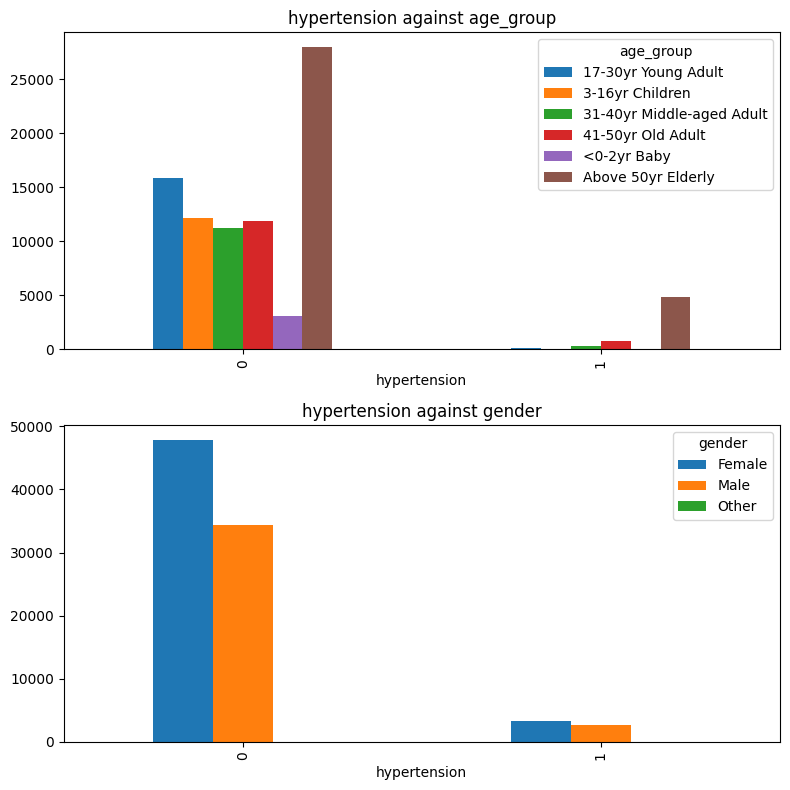

In [159]:
#Now can plot all categerical in one dashboard
figure_plot, position = plt.subplots(nrows=2 , ncols=1, figsize=(8,8))
position = position.flatten()

for index, column_name in enumerate(actual_categorical_columns[:2]):
    pd.crosstab(data["hypertension"], data[column_name]).plot(kind="bar", ax=position[index]);
    #position[index].grid(True) 
    position[index].set_title(f"hypertension against {column_name}")
    
plt.tight_layout()
plt.show()

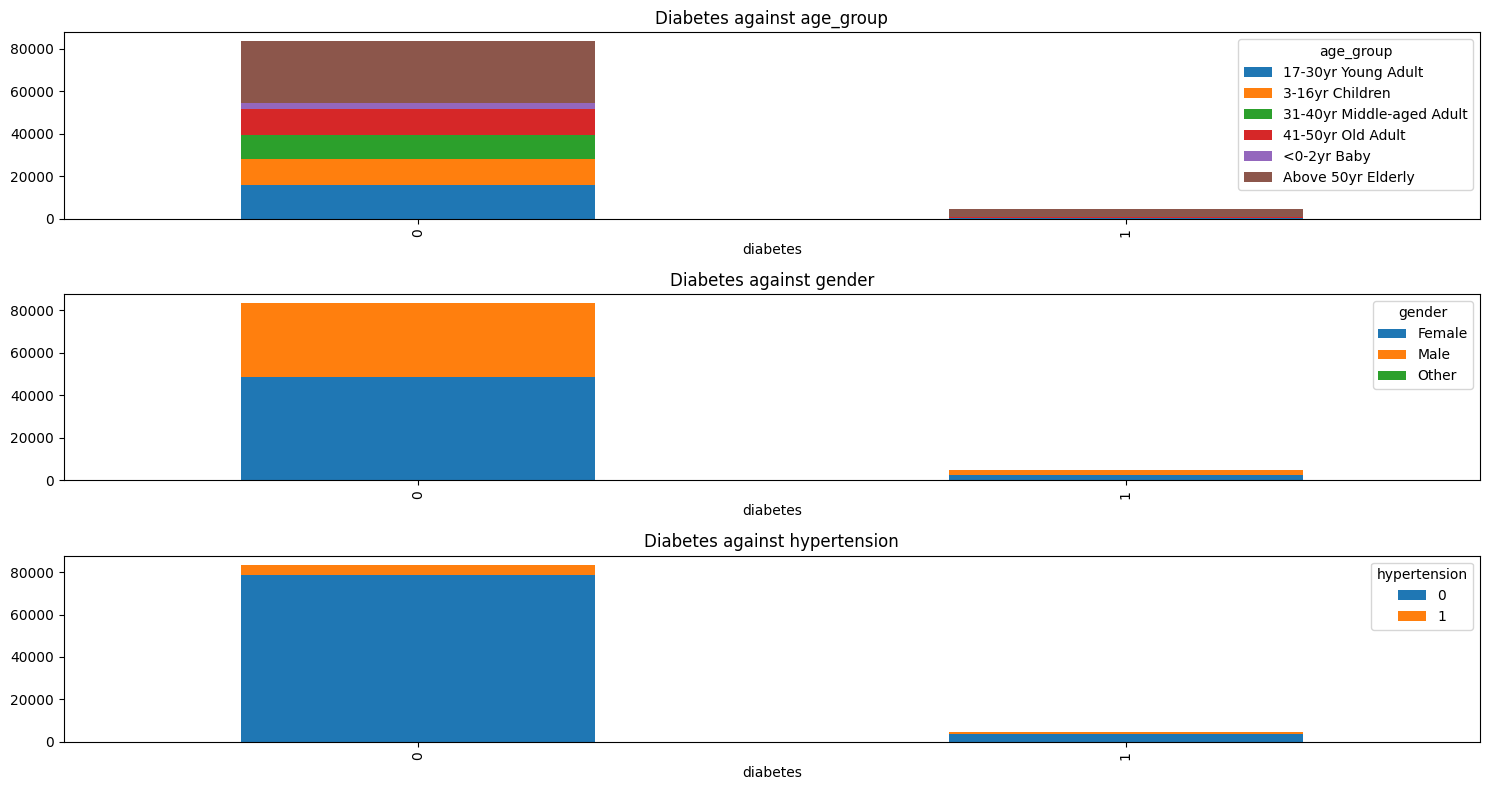

In [160]:
figure_plot, position = plt.subplots(nrows=3 , ncols=1, figsize=(15,8))
position = position.flatten() 

for index, column_name in enumerate(actual_categorical_columns[:3]):
    pd.crosstab(data["diabetes"], data[column_name]).plot(kind="bar", stacked=True, ax=position[index]);
    #position[index].grid(True) 
    position[index].set_title(f"Diabetes against {column_name}")

plt.tight_layout()
plt.show()

In [161]:
actual_categorical_columns

['age_group',
 'gender',
 'hypertension',
 'heart_disease',
 'smoking_history',
 'diabetes']

In [162]:
actual_numerical_columns

['bmi', 'HbA1c_level', 'blood_glucose_level']

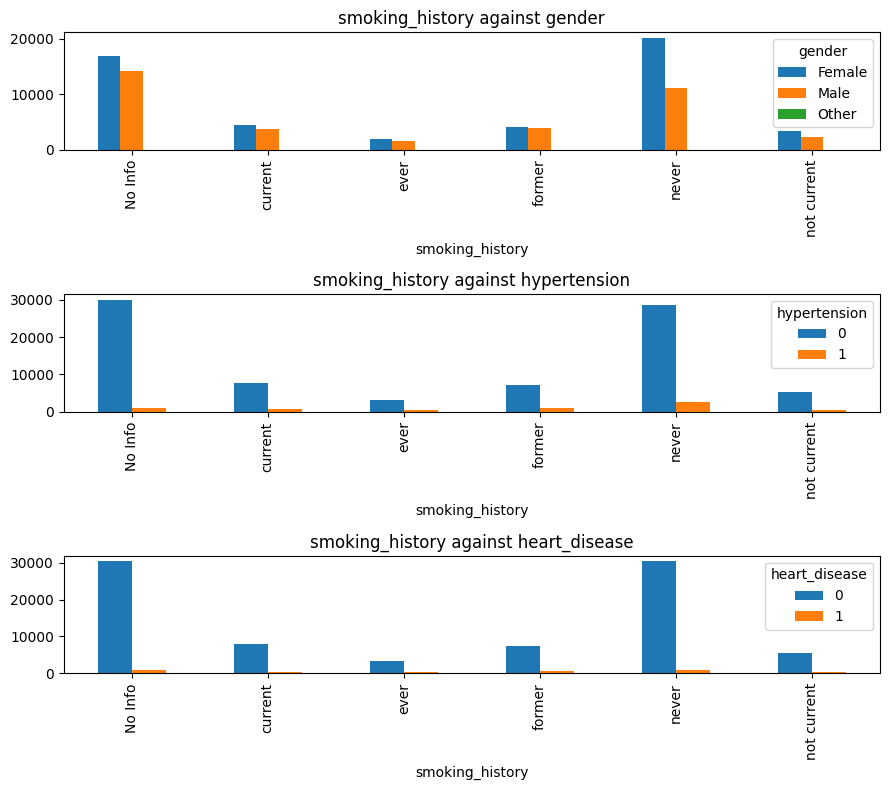

In [163]:
figure_plot, position = plt.subplots(nrows=3 , ncols=1, figsize=(9,8))
position = position.flatten() 

for index, column_name in enumerate(actual_categorical_columns[1:4]):
    pd.crosstab(data["smoking_history"], data[column_name]).plot(kind="bar", ax=position[index]);
    position[index].set_title(f"smoking_history against {column_name}")
    
plt.tight_layout()
plt.show()

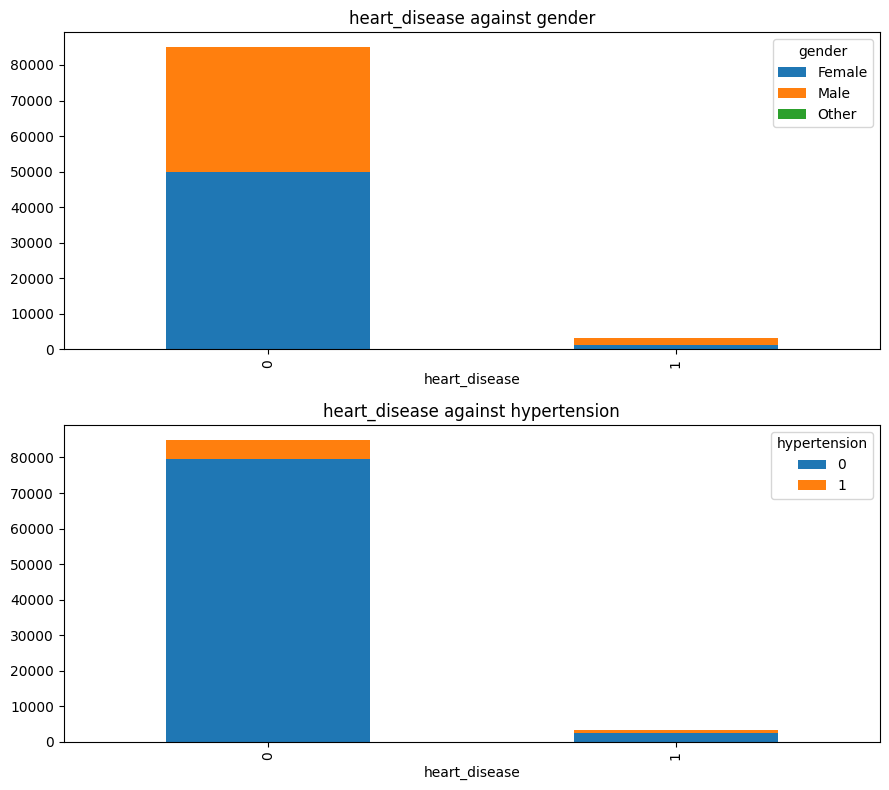

In [164]:
figure_plot, position = plt.subplots(nrows=2 , ncols=1, figsize=(9,8))
position = position.flatten() 

for index, column_name in enumerate(actual_categorical_columns[1:3]):
    pd.crosstab(data["heart_disease"], data[column_name]).plot(kind="bar", stacked=True, ax=position[index]);
    position[index].set_title(f"heart_disease against {column_name}")
    
plt.tight_layout()
plt.show()

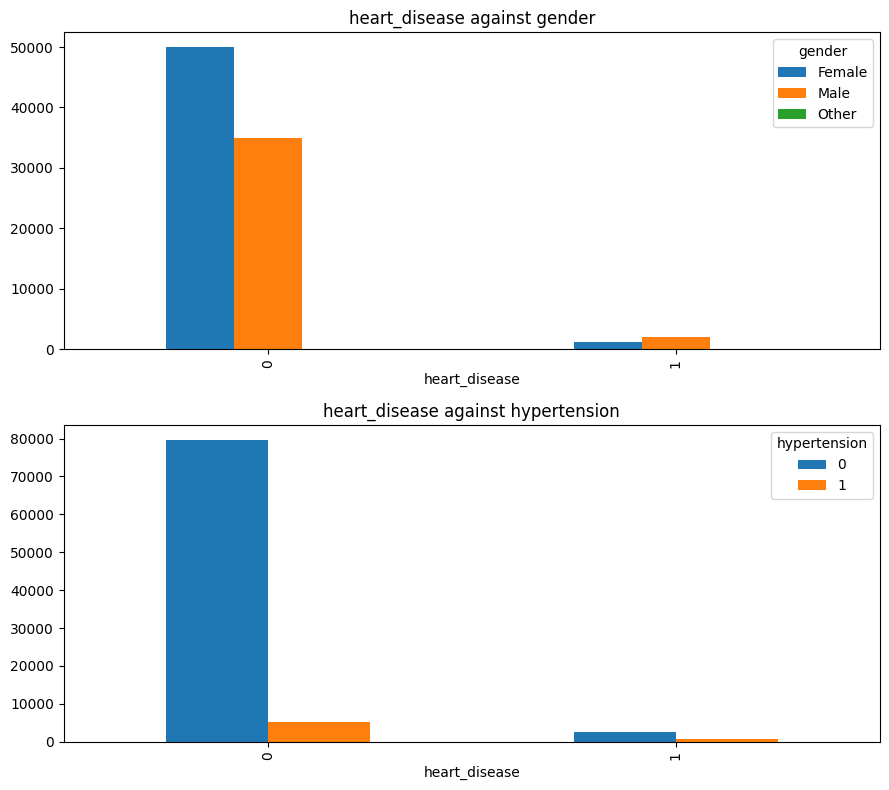

In [165]:

figure_plot, position = plt.subplots(nrows=2 , ncols=1, figsize=(9,8))
position = position.flatten() #helps reduce the dimension of the 2D array to a single 1D array

for index, column_name in enumerate(actual_categorical_columns[1:3]): #notice we sliced out 'age' and 'diabetes' columns using indexing [1:5]
    pd.crosstab(data["heart_disease"], data[column_name]).plot(kind="bar", ax=position[index]);
    #position[index].grid(True) #inlcuding the grid lines for each plot at their respective axis position
    position[index].set_title(f"heart_disease against {column_name}")
    
plt.tight_layout()
plt.show()

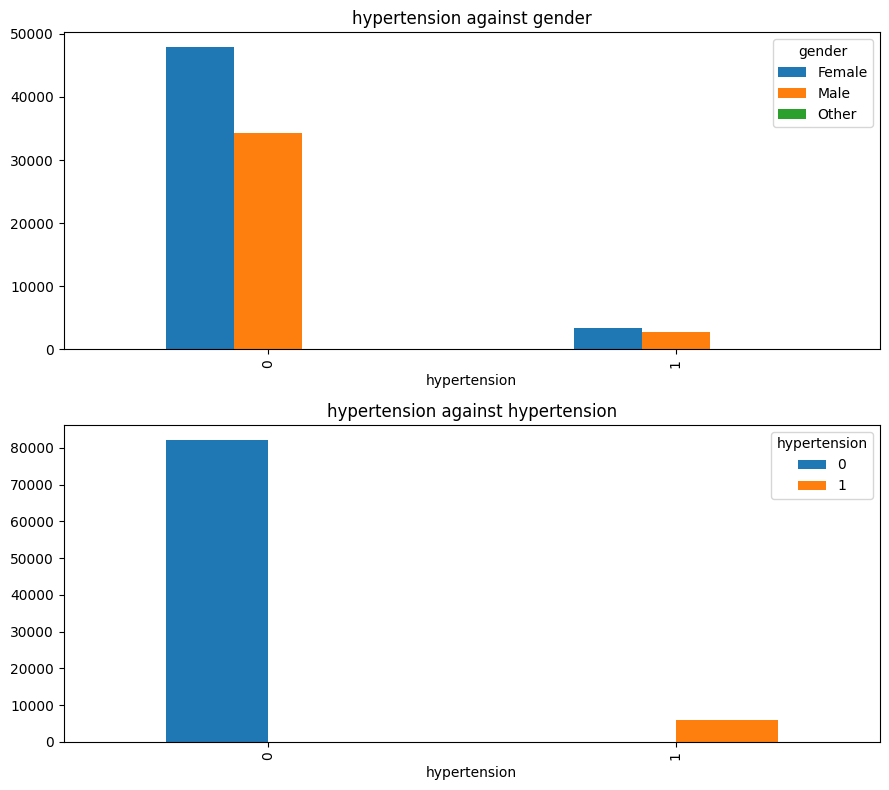

In [166]:
figure_plot, position = plt.subplots(nrows=2 , ncols=1, figsize=(9,8))
position = position.flatten()

for index, column_name in enumerate(actual_categorical_columns[1:3]):
    pd.crosstab(data["hypertension"], data[column_name]).plot(kind="bar", ax=position[index]);
    position[index].set_title(f"hypertension against {column_name}")
    
plt.tight_layout()
plt.show()

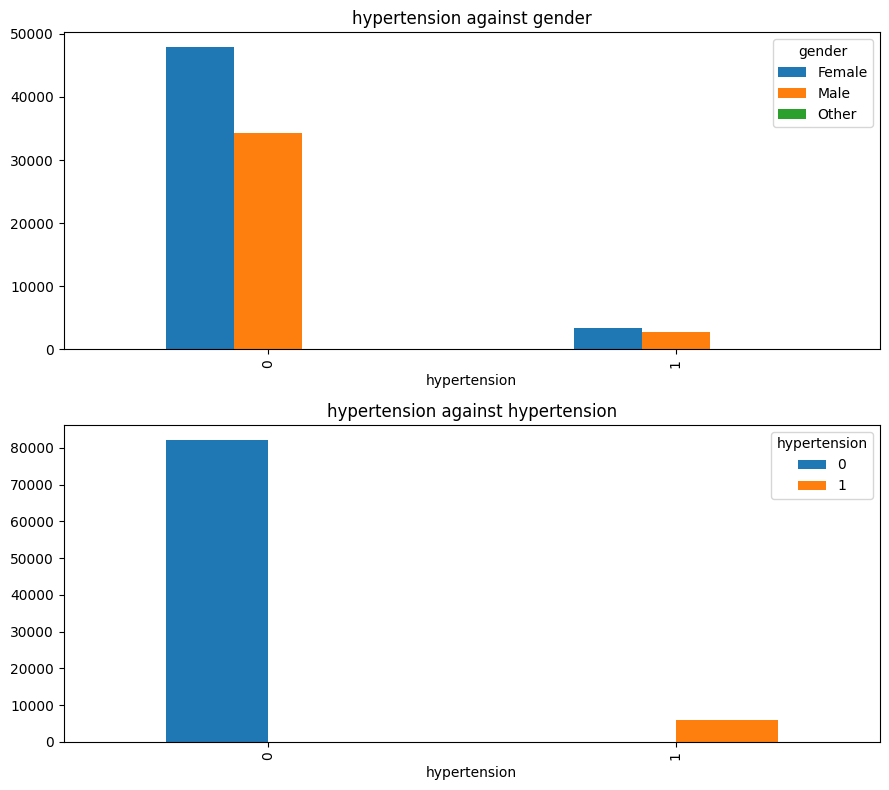

In [167]:
figure_plot, position = plt.subplots(nrows=2 , ncols=1, figsize=(9,8))
position = position.flatten()

for index, column_name in enumerate(actual_categorical_columns[1:3]):
    pd.crosstab(data["hypertension"], data[column_name]).plot(kind="bar", ax=position[index]);
    position[index].set_title(f"hypertension against {column_name}")
    
plt.tight_layout()
plt.show()

### Multivariate Analysis
- More than 2 variables at once
- e.g. to calculate the blood sugar level for each gender if they have diabetes

In [168]:

patients_per_gender_glucose_level = data.groupby("gender")["blood_glucose_level"].mean()
patients_per_gender_glucose_level

gender
Female    134.375447
Male      134.980080
Other     139.444444
Name: blood_glucose_level, dtype: float64

In [169]:
diabetic_patients_per_gender_glucose_level = data.groupby(["gender","diabetes"])["blood_glucose_level"].mean().unstack()
diabetic_patients_per_gender_glucose_level

#we use the unstack() function to re-arrange the table in a readable format compared to the above

diabetes           0           1
gender                          
Female    132.798329  167.336329
Male      132.839358  167.562034
Other     139.444444         NaN

In [170]:
diabetic_patients_per_gender_blood_glucose_level = data.groupby(["gender","diabetes"])["blood_glucose_level"].mean().unstack()
diabetic_patients_per_gender_blood_glucose_level

diabetes           0           1
gender                          
Female    132.798329  167.336329
Male      132.839358  167.562034
Other     139.444444         NaN

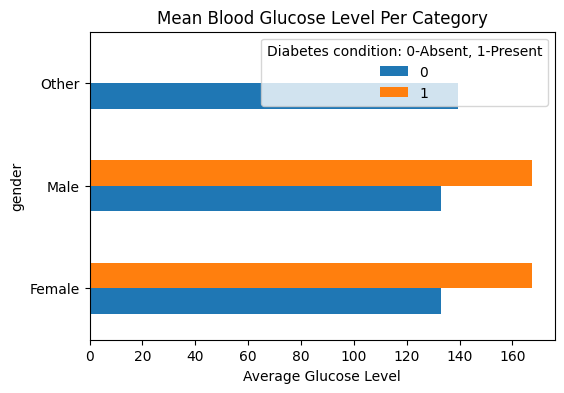

In [171]:
figure_plot = diabetic_patients_per_gender_blood_glucose_level.plot(kind="barh", figsize =(6,4))
figure_plot.set_title("Mean Blood Glucose Level Per Category")
figure_plot.set_xlabel("Average Glucose Level")
figure_plot.legend(loc="center")
figure_plot.legend(title="Diabetes condition: 0-Absent, 1-Present",loc="best");

In [172]:

diabetic_patients_per_gender_HbA1c_level = data.groupby(["gender","diabetes"])["HbA1c_level"].mean().unstack()
diabetic_patients_per_gender_HbA1c_level

diabetes         0         1
gender                      
Female    5.392996  6.578477
Male      5.403520  6.577466
Other     5.405556       NaN

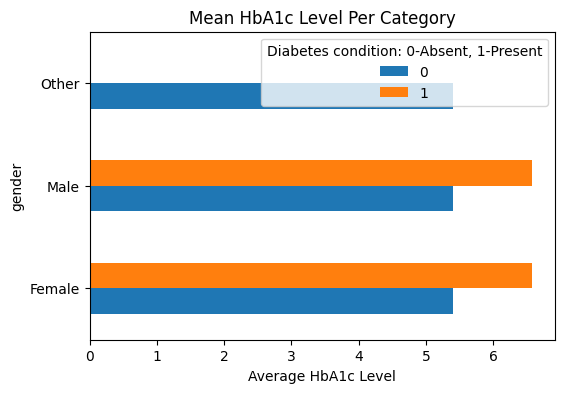

In [173]:
figure_plot = diabetic_patients_per_gender_HbA1c_level.plot(kind="barh", figsize =(6,4))
figure_plot.set_title("Mean HbA1c Level Per Category")
figure_plot.set_xlabel("Average HbA1c Level")
figure_plot.legend(loc="center")
figure_plot.legend(title="Diabetes condition: 0-Absent, 1-Present",loc="best");

In [174]:

diabetic_patients_per_gender_bmi = data.groupby(["gender","diabetes"])["bmi"].mean().unstack()
diabetic_patients_per_gender_bmi

diabetes          0          1
gender                        
Female    26.089540  29.562122
Male      26.197732  29.577554
Other     27.379444        NaN

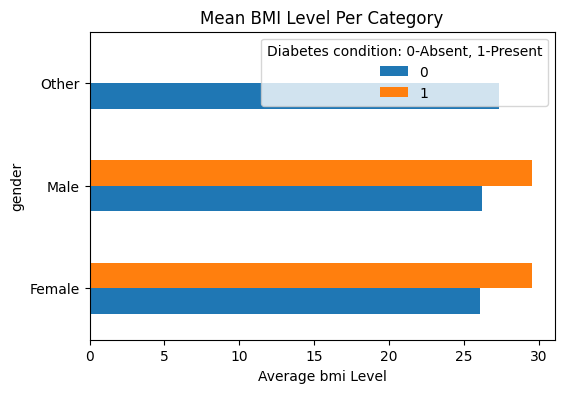

In [175]:
figure_plot = diabetic_patients_per_gender_bmi.plot(kind="barh", figsize =(6,4));
figure_plot.legend(loc="center")
figure_plot.set_title("Mean BMI Level Per Category")
figure_plot.set_xlabel("Average bmi Level")
figure_plot.legend(title="Diabetes condition: 0-Absent, 1-Present",loc="best");

In [176]:
actual_numerical_columns

['bmi', 'HbA1c_level', 'blood_glucose_level']

In [177]:
actual_categorical_columns

['age_group',
 'gender',
 'hypertension',
 'heart_disease',
 'smoking_history',
 'diabetes']

In [178]:

diabetic_patients_per_age_group_blood_glucose_level = data.groupby(["age_group","diabetes"])["blood_glucose_level"].mean().unstack()
diabetic_patients_per_age_group_blood_glucose_level

diabetes                            0           1
age_group                                        
17-30yr Young Adult        133.112807  165.099237
3-16yr Children            132.762470  169.000000
31-40yr Middle-aged Adult  132.051210  164.102128
41-50yr Old Adult          132.865120  165.290135
<0-2yr Baby                132.487725         NaN
Above 50yr Elderly         132.991232  168.028169

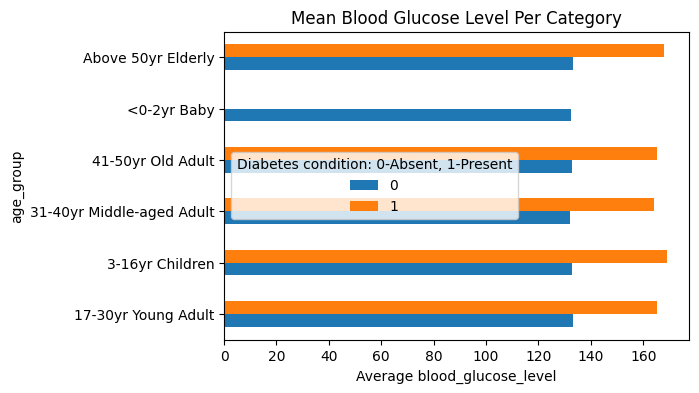

In [179]:
figure_plot = diabetic_patients_per_age_group_blood_glucose_level.plot(kind="barh", figsize =(6,4))
figure_plot.set_title("Mean Blood Glucose Level Per Category")
figure_plot.set_xlabel("Average blood_glucose_level")
figure_plot.legend(title="Diabetes condition: 0-Absent, 1-Present",loc="center left");

In [180]:

diabetic_patients_per_age_group_bmi = data.groupby(["age_group","diabetes"])["bmi"].mean().unstack()
diabetic_patients_per_age_group_bmi

diabetes                           0          1
age_group                                      
17-30yr Young Adult        26.180232  27.659695
3-16yr Children            21.144181  22.334186
31-40yr Middle-aged Adult  27.548520  30.662894
41-50yr Old Adult          27.864152  29.919420
<0-2yr Baby                18.621280        NaN
Above 50yr Elderly         27.704837  29.603242

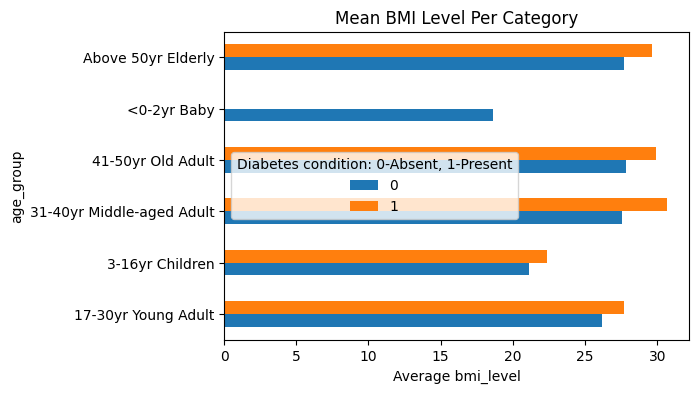

In [181]:
figure_plot = diabetic_patients_per_age_group_bmi.plot(kind="barh", figsize =(6,4))
figure_plot.set_title("Mean BMI Level Per Category")
figure_plot.set_xlabel("Average bmi_level")
plt.legend(loc="center")
plt.legend(title="Diabetes condition: 0-Absent, 1-Present",loc="center left");

In [182]:

diabetic_patients_per_age_group_HbA1c_level = data.groupby(["age_group","diabetes"])["HbA1c_level"].mean().unstack()
diabetic_patients_per_age_group_HbA1c_level

diabetes                          0         1
age_group                                    
17-30yr Young Adult        5.377521  6.646565
3-16yr Children            5.412796  6.490698
31-40yr Middle-aged Adult  5.406719  6.565532
41-50yr Old Adult          5.395335  6.609478
<0-2yr Baby                5.392340       NaN
Above 50yr Elderly         5.399453  6.572941

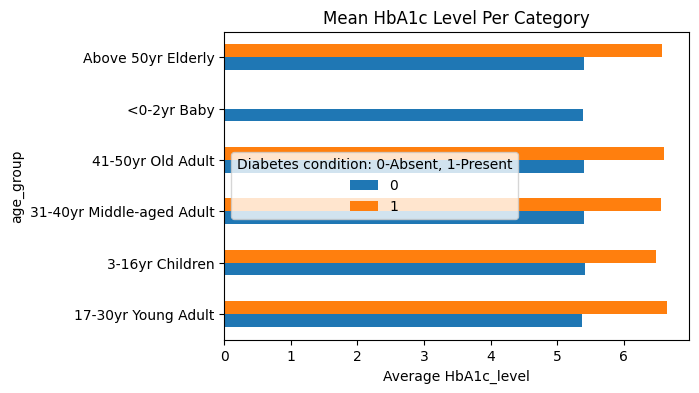

In [183]:
figure_plot = diabetic_patients_per_age_group_HbA1c_level.plot(kind="barh", figsize =(6,4))
figure_plot.set_title("Mean HbA1c Level Per Category")
figure_plot.set_xlabel("Average HbA1c_level")
plt.legend(loc="center")
plt.legend(title="Diabetes condition: 0-Absent, 1-Present",loc="center left");

In [184]:
diabetic_patients_per_heart_disease_bmi = data.groupby(["heart_disease","diabetes"])["bmi"].mean().unstack()
diabetic_patients_per_heart_disease_bmi

diabetes               0          1
heart_disease                      
0              26.082442  29.592907
1              27.802557  29.442254

### 4. CORRELATION ANALYSIS

In [185]:
correlation_map = data.corr(numeric_only=True)
correlation_map

age  hypertension  heart_disease       bmi  \
age                  1.000000      0.255928       0.234206  0.404966   
hypertension         0.255928      1.000000       0.122328  0.135534   
heart_disease        0.234206      0.122328       1.000000  0.069214   
bmi                  0.404966      0.135534       0.069214  1.000000   
HbA1c_level          0.055765      0.042942       0.036586  0.038096   
blood_glucose_level  0.049413      0.039069       0.028800  0.033999   
diabetes             0.215886      0.161844       0.145782  0.146629   

                     HbA1c_level  blood_glucose_level  diabetes  
age                     0.055765             0.049413  0.215886  
hypertension            0.042942             0.039069  0.161844  
heart_disease           0.036586             0.028800  0.145782  
bmi                     0.038096             0.033999  0.146629  
HbA1c_level             1.000000             0.057744  0.264221  
blood_glucose_level     0.057744             1.000000  0.218808  
diabetes                0.264221             0.218808  1.000000

In [186]:
actual_numerical_columns

['bmi', 'HbA1c_level', 'blood_glucose_level']

In [187]:
actual_correlation_map = data[actual_numerical_columns].corr() #corr(numeric_only=True)
actual_correlation_map

bmi  HbA1c_level  blood_glucose_level
bmi                  1.000000     0.038096             0.033999
HbA1c_level          0.038096     1.000000             0.057744
blood_glucose_level  0.033999     0.057744             1.000000

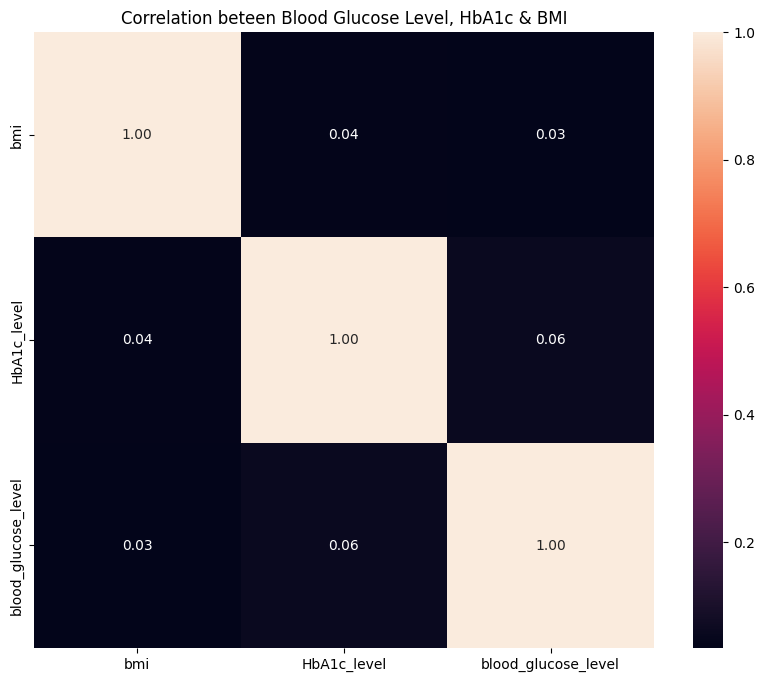

In [188]:
plt.figure(figsize=(10,8))
sns.heatmap(actual_correlation_map, annot=True, fmt=".2f")
plt.title("Correlation beteen Blood Glucose Level, HbA1c & BMI");
#remember to fix why all the annotations values in each box is not showing

#### 5. MACHINE LEARNING

- Target distribution: "diabetes" column 
- The type of distribution determines the scaler type to be used:
- The data is mostly uniformly distributed data - use Min-MaxScaler,
- Normal distribution or slightly skewed data - use a StandardScaler,
- Heavily skewed data - consider a RobustScaler

In [189]:
actual_numerical_columns

['bmi', 'HbA1c_level', 'blood_glucose_level']

In [190]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 88195 entries, 0 to 99999
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   gender               88195 non-null  object 
 1   age                  88195 non-null  float64
 2   hypertension         88195 non-null  int64  
 3   heart_disease        88195 non-null  int64  
 4   smoking_history      88195 non-null  object 
 5   bmi                  88195 non-null  float64
 6   HbA1c_level          88195 non-null  float64
 7   blood_glucose_level  88195 non-null  int64  
 8   diabetes             88195 non-null  int64  
 9   age_group            88195 non-null  object 
dtypes: float64(3), int64(4), object(3)
memory usage: 7.4+ MB


In [191]:
data.columns

Index(['gender', 'age', 'hypertension', 'heart_disease', 'smoking_history',
       'bmi', 'HbA1c_level', 'blood_glucose_level', 'diabetes', 'age_group'],
      dtype='object')

In [192]:
data.head()

gender   age  hypertension  heart_disease smoking_history    bmi  \
0  Female  80.0             0              1           never  25.19   
1  Female  54.0             0              0         No Info  27.32   
2    Male  28.0             0              0           never  27.32   
3  Female  36.0             0              0         current  23.45   
4    Male  76.0             1              1         current  20.14   

   HbA1c_level  blood_glucose_level  diabetes                  age_group  
0          6.6                  140         0         Above 50yr Elderly  
1          6.6                   80         0         Above 50yr Elderly  
2          5.7                  158         0        17-30yr Young Adult  
3          5.0                  155         0  31-40yr Middle-aged Adult  
4          4.8                  155         0         Above 50yr Elderly

In [193]:
numerical_columns

['age', 'bmi', 'HbA1c_level', 'blood_glucose_level']

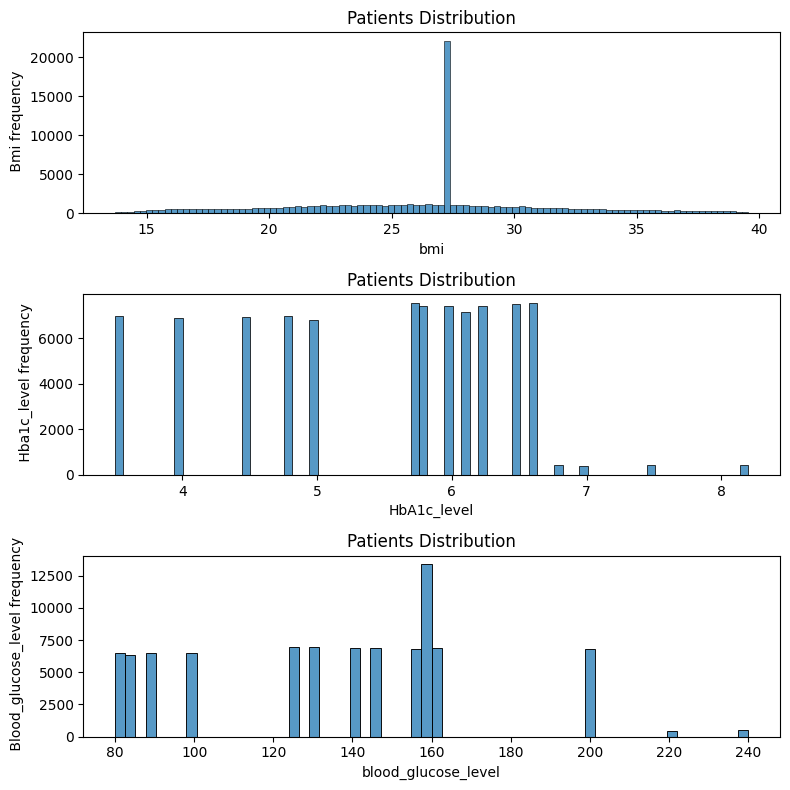

In [194]:
fig, position = plt.subplots(nrows=3, ncols=1, figsize=(8, 8))
position = position.flatten()

for index, column_name in enumerate(actual_numerical_columns):
    sns.histplot(data[column_name], ax=position[index])
    #Adding titles
    position[index].set_title("Patients Distribution")
    #plt.xlabel("age")
    position[index].set_ylabel(f" {column_name.capitalize()} frequency")
plt.tight_layout()
plt.show()

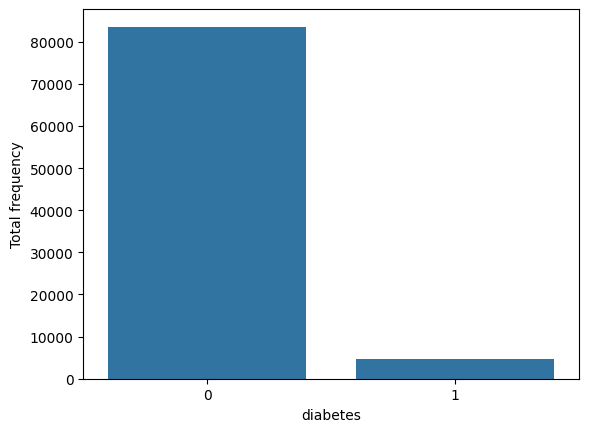

In [195]:
figure_plot = sns.countplot(x=data["diabetes"])
figure_plot.set_ylabel("Total frequency");

- Plot above shows an imbalanced dataset as we have majority of the patients without diabetes about 80,000 while the remaining with diabetes less than 5,000. We want the model to learn as much from equal number of samples - those with and without diabetes

### 5a. Modelling

#### Step 1 - Data Preprocessing

In [196]:
label = data["diabetes"] #label is the target variable/feature we are interested in

In [197]:
"""Now we separate the target variable from other features..
by dropping the diabetes column and assigning it to the features column
"""
features = data.drop("diabetes",axis=1)
features

gender   age  hypertension  heart_disease smoking_history    bmi  \
0      Female  80.0             0              1           never  25.19   
1      Female  54.0             0              0         No Info  27.32   
2        Male  28.0             0              0           never  27.32   
3      Female  36.0             0              0         current  23.45   
4        Male  76.0             1              1         current  20.14   
...       ...   ...           ...            ...             ...    ...   
99994  Female  36.0             0              0         No Info  24.60   
99996  Female   2.0             0              0         No Info  17.37   
99997    Male  66.0             0              0          former  27.83   
99998  Female  24.0             0              0           never  35.42   
99999  Female  57.0             0              0         current  22.43   

       HbA1c_level  blood_glucose_level                  age_group  
0              6.6                  140         Above 50yr Elderly  
1              6.6                   80         Above 50yr Elderly  
2              5.7                  158        17-30yr Young Adult  
3              5.0                  155  31-40yr Middle-aged Adult  
4              4.8                  155         Above 50yr Elderly  
...            ...                  ...                        ...  
99994          4.8                  145  31-40yr Middle-aged Adult  
99996          6.5                  100                <0-2yr Baby  
99997          5.7                  155         Above 50yr Elderly  
99998          4.0                  100        17-30yr Young Adult  
99999          6.6                   90         Above 50yr Elderly  

[88195 rows x 9 columns]

In [198]:
data.head(2)

gender   age  hypertension  heart_disease smoking_history    bmi  \
0  Female  80.0             0              1           never  25.19   
1  Female  54.0             0              0         No Info  27.32   

   HbA1c_level  blood_glucose_level  diabetes           age_group  
0          6.6                  140         0  Above 50yr Elderly  
1          6.6                   80         0  Above 50yr Elderly

In [199]:
features #Notice the diabetes column/feature has been dropped in the new data set

gender   age  hypertension  heart_disease smoking_history    bmi  \
0      Female  80.0             0              1           never  25.19   
1      Female  54.0             0              0         No Info  27.32   
2        Male  28.0             0              0           never  27.32   
3      Female  36.0             0              0         current  23.45   
4        Male  76.0             1              1         current  20.14   
...       ...   ...           ...            ...             ...    ...   
99994  Female  36.0             0              0         No Info  24.60   
99996  Female   2.0             0              0         No Info  17.37   
99997    Male  66.0             0              0          former  27.83   
99998  Female  24.0             0              0           never  35.42   
99999  Female  57.0             0              0         current  22.43   

       HbA1c_level  blood_glucose_level                  age_group  
0              6.6                  140         Above 50yr Elderly  
1              6.6                   80         Above 50yr Elderly  
2              5.7                  158        17-30yr Young Adult  
3              5.0                  155  31-40yr Middle-aged Adult  
4              4.8                  155         Above 50yr Elderly  
...            ...                  ...                        ...  
99994          4.8                  145  31-40yr Middle-aged Adult  
99996          6.5                  100                <0-2yr Baby  
99997          5.7                  155         Above 50yr Elderly  
99998          4.0                  100        17-30yr Young Adult  
99999          6.6                   90         Above 50yr Elderly  

[88195 rows x 9 columns]

In [200]:
label

0        0
1        0
2        0
3        0
4        0
        ..
99994    0
99996    0
99997    0
99998    0
99999    0
Name: diabetes, Length: 88195, dtype: int64

#### Step 2: Label Encoding
We need to encode the labels for the features - gender (Male/Female) and smoking_history as there are text values, the model can not work with them.

So we replace with 0 or 1 i.e. encoding the texts to numerical representation 


#### Categorical Encoding
- Using label encoder

In [201]:
from sklearn.preprocessing import LabelEncoder

In [202]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 88195 entries, 0 to 99999
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   gender               88195 non-null  object 
 1   age                  88195 non-null  float64
 2   hypertension         88195 non-null  int64  
 3   heart_disease        88195 non-null  int64  
 4   smoking_history      88195 non-null  object 
 5   bmi                  88195 non-null  float64
 6   HbA1c_level          88195 non-null  float64
 7   blood_glucose_level  88195 non-null  int64  
 8   diabetes             88195 non-null  int64  
 9   age_group            88195 non-null  object 
dtypes: float64(3), int64(4), object(3)
memory usage: 7.4+ MB


In [203]:
actual_categorical_columns

['age_group',
 'gender',
 'hypertension',
 'heart_disease',
 'smoking_history',
 'diabetes']

In [204]:

categorical_features = ['age_group','gender','hypertension','heart_disease', 'smoking_history']

#We can also use the code categorical_features = data.select_dtypes(include="object")..
#if we are sure all the categorical data types are of the object variable
#for our case only gender and smoking history need to be encoded
#notice we removed age column as the above is to be label encoded

In [205]:
data.head()

gender   age  hypertension  heart_disease smoking_history    bmi  \
0  Female  80.0             0              1           never  25.19   
1  Female  54.0             0              0         No Info  27.32   
2    Male  28.0             0              0           never  27.32   
3  Female  36.0             0              0         current  23.45   
4    Male  76.0             1              1         current  20.14   

   HbA1c_level  blood_glucose_level  diabetes                  age_group  
0          6.6                  140         0         Above 50yr Elderly  
1          6.6                   80         0         Above 50yr Elderly  
2          5.7                  158         0        17-30yr Young Adult  
3          5.0                  155         0  31-40yr Middle-aged Adult  
4          4.8                  155         0         Above 50yr Elderly

- 3 phases to label encoding
  
- a. initialisation i.e creating an instance of the label encoder
- b. fitting the data i.e. training/learning the model inside the encoder
- c. transforming the data - changing the label from text/categorical representation to numerical value


In [206]:
#Step 1: Initialisation - calling the LabelEncoder class and all its features
encoder = LabelEncoder()

- Step 2: fit - similar to training or fitting the data into the model to help perform predictions
-- here the fit will learn and assign a unique identity or number to each unique value from the column's value_counts() then later the transform will change the data that the fit has learnt

In [207]:

encoder.fit(data["gender"]) #result below shows we have created an instance of the object but it has no value yet

LabelEncoder()

In [208]:
#Step 3: Transform
encoder.transform(data["gender"]) #transform has changed the representations into numerical values 0,0, etc

array([0, 0, 1, ..., 1, 0, 0])

In [209]:
data["gender"] #so using the fit and transform Female=0 and Male=1 from the output below

0        Female
1        Female
2          Male
3        Female
4          Male
          ...  
99994    Female
99996    Female
99997      Male
99998    Female
99999    Female
Name: gender, Length: 88195, dtype: object

In [210]:
#Now indexing into the gender and smoking history columns to obtain the unique values there
data["gender"].value_counts()

Female    51179
Male      36998
Other        18
Name: gender, dtype: int64

In [211]:
data["smoking_history"].value_counts()

never          31249
No Info        31111
current         8349
former          8133
not current     5764
ever            3589
Name: smoking_history, dtype: int64

In [212]:
#So we can combine both fit and transform in one line of code
encoder.fit_transform(data["gender"])

array([0, 0, 1, ..., 1, 0, 0])

In [213]:
encoder.fit_transform(data["smoking_history"])

array([4, 0, 4, ..., 3, 4, 1])

In [214]:
data["smoking_history"]

#hence never is 4, No info is 0, current is 1 from below output

0          never
1        No Info
2          never
3        current
4        current
          ...   
99994    No Info
99996    No Info
99997     former
99998      never
99999    current
Name: smoking_history, Length: 88195, dtype: object

In [215]:
encoder.fit_transform(data["hypertension"])

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [216]:
data["hypertension"]

0        0
1        0
2        0
3        0
4        1
        ..
99994    0
99996    0
99997    0
99998    0
99999    0
Name: hypertension, Length: 88195, dtype: int64

- We can also use a "for loop" to perform fit_transform of all data 

In [217]:
features.head(3)

gender   age  hypertension  heart_disease smoking_history    bmi  \
0  Female  80.0             0              1           never  25.19   
1  Female  54.0             0              0         No Info  27.32   
2    Male  28.0             0              0           never  27.32   

   HbA1c_level  blood_glucose_level            age_group  
0          6.6                  140   Above 50yr Elderly  
1          6.6                   80   Above 50yr Elderly  
2          5.7                  158  17-30yr Young Adult

In [218]:
for column_name in categorical_columns:
    features[column_name] = encoder.fit_transform(features[column_name])

In [219]:
features.head(3)

gender   age  hypertension  heart_disease  smoking_history    bmi  \
0       0  80.0             0              1                4  25.19   
1       0  54.0             0              0                0  27.32   
2       1  28.0             0              0                4  27.32   

   HbA1c_level  blood_glucose_level  age_group  
0          6.6                  140          5  
1          6.6                   80          5  
2          5.7                  158          0

In [220]:
#Now we split the data into training and testing data

In [221]:
from sklearn.model_selection import train_test_split

In [222]:
train_test_split

<function sklearn.model_selection._split.train_test_split(*arrays, test_size=None, train_size=None, random_state=None, shuffle=True, stratify=None)>

In [223]:
features

gender   age  hypertension  heart_disease  smoking_history    bmi  \
0           0  80.0             0              1                4  25.19   
1           0  54.0             0              0                0  27.32   
2           1  28.0             0              0                4  27.32   
3           0  36.0             0              0                1  23.45   
4           1  76.0             1              1                1  20.14   
...       ...   ...           ...            ...              ...    ...   
99994       0  36.0             0              0                0  24.60   
99996       0   2.0             0              0                0  17.37   
99997       1  66.0             0              0                3  27.83   
99998       0  24.0             0              0                4  35.42   
99999       0  57.0             0              0                1  22.43   

       HbA1c_level  blood_glucose_level  age_group  
0              6.6                  140          5  
1              6.6                   80          5  
2              5.7                  158          0  
3              5.0                  155          2  
4              4.8                  155          5  
...            ...                  ...        ...  
99994          4.8                  145          2  
99996          6.5                  100          4  
99997          5.7                  155          5  
99998          4.0                  100          0  
99999          6.6                   90          5  

[88195 rows x 9 columns]

In [224]:
#Now we include the label/target feature with variable names to collect
#train_features, test_features, train_label, test_label = train_test_split(features, label, test_size=0.2, random_state=42) #implies 80% = train_size 
X_train, X_test, y_train, y_test =  train_test_split(features, label, test_size=0.2, random_state=42)

X_train 


#notice the output gives random results for each run of this cell, so inappropriate for reproducibility
#so we use the random_state parameter to retain the same reults for any re-run, conventionally use 42

gender   age  hypertension  heart_disease  smoking_history    bmi  \
41361       1  22.0             0              0                1  27.32   
81425       1  33.0             0              0                3  29.75   
34544       0  37.0             0              1                0  27.32   
91882       0  19.0             0              0                0  17.95   
84145       1  56.0             0              0                0  27.32   
...       ...   ...           ...            ...              ...    ...   
6844        0  52.0             0              0                0  34.15   
61385       0  56.0             0              0                0  31.87   
86679       1  47.0             0              0                1  27.32   
929         1  77.0             0              0                0  27.32   
17342       0  20.0             0              0                1  27.32   

       HbA1c_level  blood_glucose_level  age_group  
41361          5.0                  158          0  
81425          5.0                  200          2  
34544          5.8                  160          2  
91882          5.8                  159          0  
84145          3.5                  145          5  
...            ...                  ...        ...  
6844           5.0                  155          5  
61385          5.7                  159          5  
86679          6.0                  200          3  
929            6.1                  200          5  
17342          6.1                  160          0  

[70556 rows x 9 columns]

In [225]:
categorical_features

['age_group', 'gender', 'hypertension', 'heart_disease', 'smoking_history']

In [226]:
categorical_columns

Index(['gender', 'smoking_history', 'age_group'], dtype='object')

In [227]:
data.head(2)

gender   age  hypertension  heart_disease smoking_history    bmi  \
0  Female  80.0             0              1           never  25.19   
1  Female  54.0             0              0         No Info  27.32   

   HbA1c_level  blood_glucose_level  diabetes           age_group  
0          6.6                  140         0  Above 50yr Elderly  
1          6.6                   80         0  Above 50yr Elderly

In [228]:
features.head(3)

gender   age  hypertension  heart_disease  smoking_history    bmi  \
0       0  80.0             0              1                4  25.19   
1       0  54.0             0              0                0  27.32   
2       1  28.0             0              0                4  27.32   

   HbA1c_level  blood_glucose_level  age_group  
0          6.6                  140          5  
1          6.6                   80          5  
2          5.7                  158          0

In [229]:
y_test

31049    0
50801    0
93288    0
11784    0
57073    0
        ..
71763    0
34059    0
2574     0
56537    0
27718    0
Name: diabetes, Length: 17639, dtype: int64

In [230]:
X_train.head()

gender   age  hypertension  heart_disease  smoking_history    bmi  \
41361       1  22.0             0              0                1  27.32   
81425       1  33.0             0              0                3  29.75   
34544       0  37.0             0              1                0  27.32   
91882       0  19.0             0              0                0  17.95   
84145       1  56.0             0              0                0  27.32   

       HbA1c_level  blood_glucose_level  age_group  
41361          5.0                  158          0  
81425          5.0                  200          2  
34544          5.8                  160          2  
91882          5.8                  159          0  
84145          3.5                  145          5

In [231]:
y_train.value_counts()

0    66858
1     3698
Name: diabetes, dtype: int64

In [232]:
y_test.value_counts() #Just to see the number of samples to test with

0    16719
1      920
Name: diabetes, dtype: int64

### Step 3: Model Training

#### Starting with a linear model - logistic regression

In [233]:
from sklearn.linear_model import LogisticRegression

In [234]:
#Initialise the model

In [235]:
model = LogisticRegression(random_state=42)

In [236]:
model.fit(X_train, y_train)

c:\Python38\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(random_state=42)

In [237]:
#Model prediction
predictions = model.predict(X_test)
predictions

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [238]:
y_test.values #Notice the model is predicting the first and last 3 predictions are correct comparing
#both the X_test and y_test

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [239]:
predictions[:50] #checking the first 50 predictions

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0], dtype=int64)

In [240]:
y_test.values[:50] #comparing the first 50 results

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0], dtype=int64)

- Notice model is quite accurate however it missed 2 values above see 

### Step 4: Model Evaluation

In [241]:
from sklearn.metrics import classification_report, confusion_matrix

In [242]:
report = classification_report(y_test, predictions)
matrix = confusion_matrix(y_test, predictions)

In [243]:
matrix

array([[16595,   124],
       [  660,   260]], dtype=int64)

In [244]:
print(report) #focus should be on the recall 31% here 

              precision    recall  f1-score   support

           0       0.96      0.99      0.98     16719
           1       0.68      0.28      0.40       920

    accuracy                           0.96     17639
   macro avg       0.82      0.64      0.69     17639
weighted avg       0.95      0.96      0.95     17639



In [245]:
y_test.value_counts()

0    16719
1      920
Name: diabetes, dtype: int64

In [246]:
len(y_test)

17639

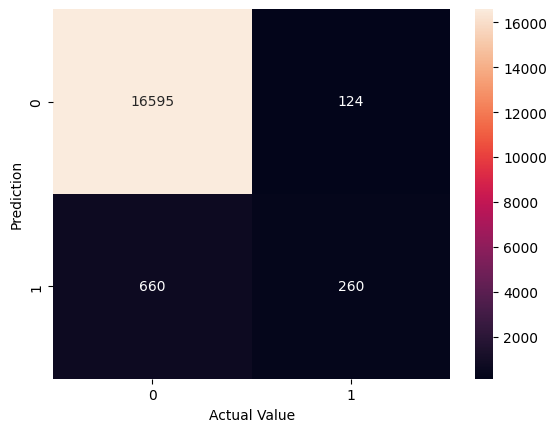

In [247]:
sns.heatmap(matrix, annot=True, fmt="g")
plt.ylabel("Prediction")
plt.xlabel("Actual Value");

In [248]:
matrix

array([[16595,   124],
       [  660,   260]], dtype=int64)

#### Data Scaling

In [249]:
features.head(2)

gender   age  hypertension  heart_disease  smoking_history    bmi  \
0       0  80.0             0              1                4  25.19   
1       0  54.0             0              0                0  27.32   

   HbA1c_level  blood_glucose_level  age_group  
0          6.6                  140          5  
1          6.6                   80          5

In [250]:
from sklearn.preprocessing import StandardScaler
#Data distribution of the numerical columns looks slightly skewed hence the choice of standard scaler

In [251]:
for column_name in categorical_columns:
    features[column_name] = encoder.fit_transform(features[column_name])

In [252]:
scaler = StandardScaler()

In [253]:
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled =scaler.transform(X_test) #X is already fitted above so no need to fit again to be transformed only

In [254]:
X_train_scaled

array([[ 1.17563679, -0.8434208 , -0.27168668, ..., -0.46505242,
         0.66150863, -1.45053312],
       [ 1.17563679, -0.35625074, -0.27168668, ..., -0.46505242,
         1.85176411, -0.42434479],
       [-0.84892276, -0.179098  , -0.27168668, ...,  0.3390952 ,
         0.71818746, -0.42434479],
       ...,
       [ 1.17563679,  0.26378387, -0.27168668, ...,  0.5401321 ,
         1.85176411,  0.08874938],
       [ 1.17563679,  1.59242947, -0.27168668, ...,  0.64065055,
         1.85176411,  1.11493771],
       [-0.84892276, -0.93199717, -0.27168668, ...,  0.64065055,
         0.71818746, -1.45053312]])

In [255]:
X_test_scaled

array([[-0.84892276,  1.10525942, -0.27168668, ...,  0.3390952 ,
        -1.26557167,  1.11493771],
       [ 1.17563679, -0.75484443, -0.27168668, ..., -1.97282919,
         0.57649038, -1.45053312],
       [-0.84892276,  0.61808936, -0.27168668, ...,  0.3390952 ,
        -1.54896583,  1.11493771],
       ...,
       [-0.84892276, -0.4891153 , -0.27168668, ..., -0.96764467,
         0.29309622, -1.45053312],
       [ 1.17563679, -1.06486173, -0.27168668, ...,  0.23857675,
         0.15139914, -1.45053312],
       [-0.84892276,  1.54814129, -0.27168668, ..., -0.96764467,
        -0.9821775 ,  1.11493771]])

              precision    recall  f1-score   support

           0       0.97      0.99      0.98     16719
           1       0.79      0.38      0.51       920

    accuracy                           0.96     17639
   macro avg       0.88      0.69      0.75     17639
weighted avg       0.96      0.96      0.96     17639



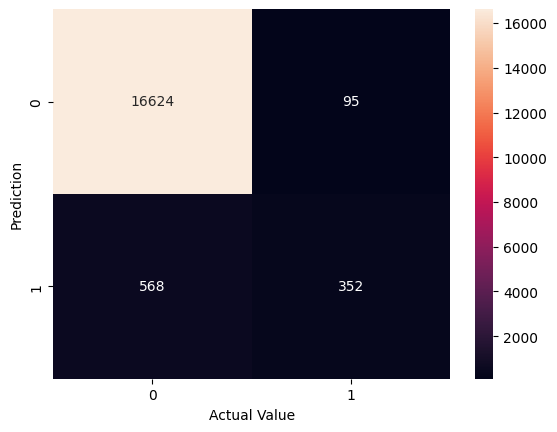

In [256]:
# Initialize the model
model = LogisticRegression(random_state=42)
# Train the model
model.fit(X_train_scaled, y_train)
# Make predictions
predictions = model.predict(X_test_scaled)
#report = classification_report(y_test, predictions, digits=5)
report = classification_report(y_test, predictions)
matrix = confusion_matrix(y_test, predictions)
print(report)
sns.heatmap(matrix, annot=True, fmt="g")
plt.ylabel("Prediction")
plt.xlabel("Actual Value");

In [257]:
len(X_test_scaled)

17639

In [258]:
len(y_test)

17639

In [259]:
282 + 148

430

In [260]:
352 + 95

447

In [261]:
matrix

array([[16624,    95],
       [  568,   352]], dtype=int64)

- From the matrix results above, the model correctly predicted the minority class
352 times - True Negatives (TN) and incorrectly predicted the minority class 95 times - False
positives (FP). So out of 17,639 total samples the model guessed 447 times that the patients are likely diabetic - 352 times correctly and missed 95 times
on the minority class. 

Also, the model correctly predicted the majority class 0, 16,524 times - True Positives (TP) and
incorrectly predicted the majority class 1, 568 times - False positive (FP).

"""From the matrix results above, the model correctly predicted the minority class
352 times - True positives (TP) and incorrectly predicted the minority class 95 times - False
positives (FP). So out of 17,639 total samples the model guessed 447 times that the patients are diabetic - 352 times correctly and missed 95 times
on the minority class. 

Also, the model correctly predicted the majority class 0, 16,524 times - True Negatives (TN) and
incorrectly predicted the majority class 1, 568 times - False positive (FP) """

In [262]:
print(f"X_test shape: {X_test.shape}")   # Check shape of X_test
print(f"y_test shape: {y_test.shape}")   # Check shape of y_test

X_test shape: (17639, 9)
y_test shape: (17639,)


### Data Imbalance


"""We can see from above in the first confusion matrix the model predicted diabetes initially
from 430 to 447 patients in a total of 17, 639 test results. This shows a boost in the model performance dues to
data scaling. 
Also, we can improve the model performance from the model side by informiNg the model to prioritise the 
minority class 1 from the data distribution. This is due to the data imbalance or fewer number of the minority class 1 (patients with diabetes)
compared to the majority class 0 (patients without diabetes)

"""

- Modifying the model to emphasise minority class 1,  manually proidinge our weak clas  some class weight or priority and let the model know about our class imbalance?

              precision    recall  f1-score   support

           0       0.97      0.98      0.98     16719
           1       0.63      0.49      0.55       920

    accuracy                           0.96     17639
   macro avg       0.80      0.74      0.76     17639
weighted avg       0.95      0.96      0.96     17639



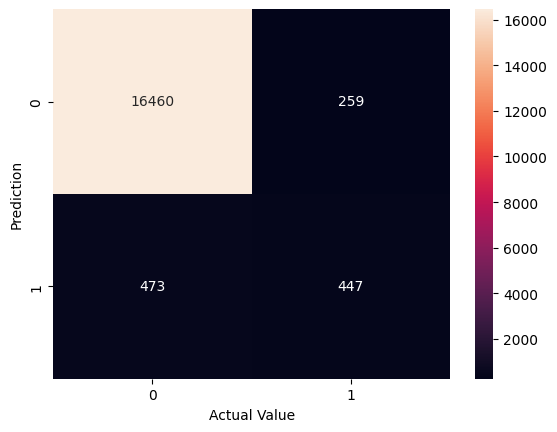

In [263]:
#Now we address the model imbalance

# Initialize the model
model = LogisticRegression(random_state=42, class_weight={0:1, 1:2}) #Tuning the hyper-parameter class_weight
#by giving class 0 an importnace of 1 and class 1 twice the importance 
# Train the model
model.fit(X_train_scaled, y_train)
# Make predictions
predictions = model.predict(X_test_scaled)
report = classification_report(y_test, predictions)
matrix = confusion_matrix(y_test, predictions)
print(report)
sns.heatmap(matrix, annot=True, fmt="g")
plt.ylabel("Prediction")
plt.xlabel("Actual Value");

In [264]:
# Initialize the model
#model = LogisticRegression(random_state=42, class_weight={0:1, 1:3}) #Tuning the hyper-parameter class_weight
#by giving class 0 an importnace of 1 and class 1 thrice the importance 
# Train the model
#model.fit(X_train_scaled, y_train)
# Make predictions
#predictions = model.predict(X_test_scaled)
#report = classification_report(y_test, predictions, digits=5)
#report = classification_report(y_test, predictions)
#matrix = confusion_matrix(y_test, predictions)
#print(report)
#sns.heatmap(matrix, annot=True, fmt="g")
#plt.ylabel("Prediction")
#plt.xlabel("Actual Value");

In [265]:
#matrix

              precision    recall  f1-score   support

           0       0.98      0.96      0.97     16719
           1       0.45      0.61      0.52       920

    accuracy                           0.94     17639
   macro avg       0.71      0.78      0.74     17639
weighted avg       0.95      0.94      0.94     17639



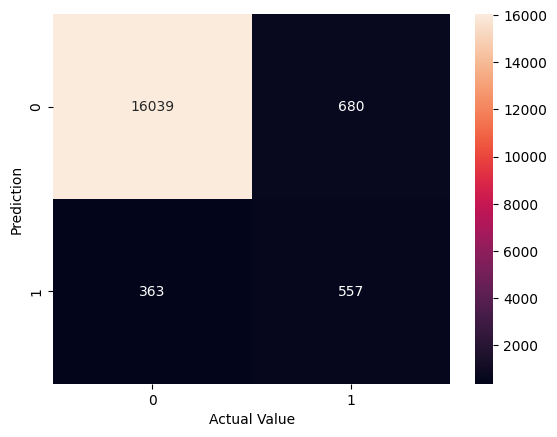

In [266]:
# Initialize the model
model = LogisticRegression(random_state=42, class_weight={0:1, 1:4}) #manually tuning the hyper-parameter class_weight
#by giving class 0 an importnace of 1 and class 1 four times the importance 
# Train the model
model.fit(X_train_scaled, y_train)
# Make predictions
predictions = model.predict(X_test_scaled)
#report = classification_report(y_test, predictions, digits=5)
report = classification_report(y_test, predictions)
matrix = confusion_matrix(y_test, predictions)
print(report)
sns.heatmap(matrix, annot=True, fmt="g")
plt.ylabel("Prediction")
plt.xlabel("Actual Value");

In [267]:
matrix

array([[16039,   680],
       [  363,   557]], dtype=int64)

- We can see there is an improvement due to adding the importance to class 1 when
we compare the last two confusion matrix

### Training and testing at least 3 supervised learning models:

===============Logistic Regression===============
Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.96      0.97     16719
           1       0.43      0.56      0.49       920

    accuracy                           0.94     17639
   macro avg       0.70      0.76      0.73     17639
weighted avg       0.95      0.94      0.94     17639



c:\Python38\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


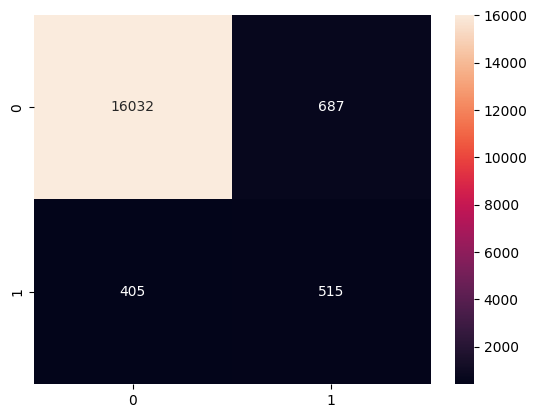

The confusion matrix for Logistic Regression is: [[16032   687]
 [  405   515]]
===============Took: 0 seconds to train===============
===============SGD Classifiers===============
Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.99      0.98     16719
           1       0.70      0.42      0.52       920

    accuracy                           0.96     17639
   macro avg       0.83      0.70      0.75     17639
weighted avg       0.95      0.96      0.96     17639



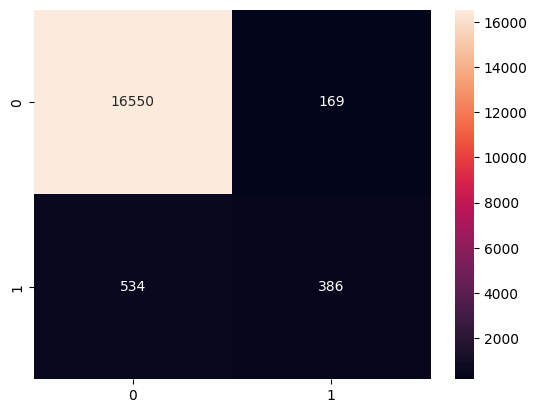

The confusion matrix for SGD Classifiers is: [[16550   169]
 [  534   386]]
===============Took: 0 seconds to train===============
===============Decision Tree===============
Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.97      0.97     16719
           1       0.54      0.55      0.54       920

    accuracy                           0.95     17639
   macro avg       0.76      0.76      0.76     17639
weighted avg       0.95      0.95      0.95     17639



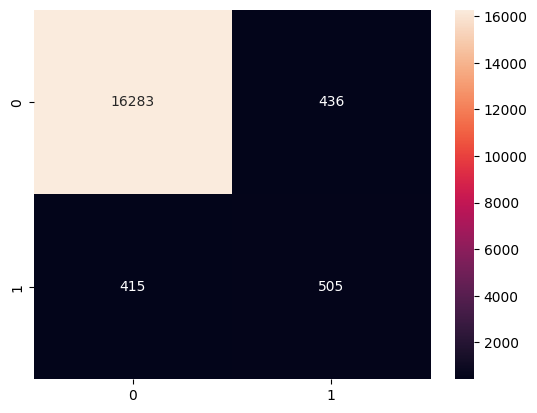

The confusion matrix for Decision Tree is: [[16283   436]
 [  415   505]]
===============Took: 0 seconds to train===============
===============Random Forest===============
Classification Report:
               precision    recall  f1-score   support

           0       0.97      1.00      0.98     16719
           1       0.90      0.48      0.62       920

    accuracy                           0.97     17639
   macro avg       0.94      0.74      0.80     17639
weighted avg       0.97      0.97      0.97     17639



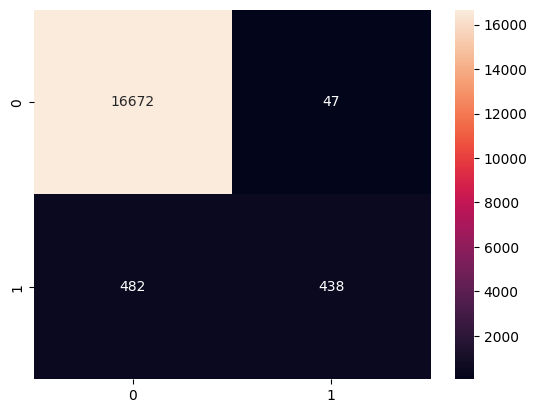

The confusion matrix for Random Forest is: [[16672    47]
 [  482   438]]
===============Took: 4 seconds to train===============
===============Gradient Boosting===============
Classification Report:
               precision    recall  f1-score   support

           0       0.97      1.00      0.99     16719
           1       0.98      0.47      0.64       920

    accuracy                           0.97     17639
   macro avg       0.98      0.74      0.81     17639
weighted avg       0.97      0.97      0.97     17639



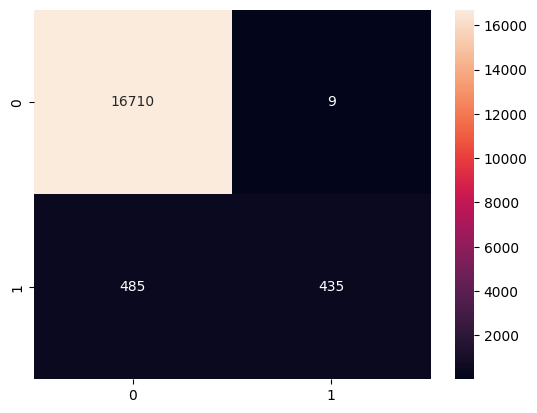

The confusion matrix for Gradient Boosting is: [[16710     9]
 [  485   435]]
===============Took: 4 seconds to train===============
===============AdaBoost===============
Classification Report:
               precision    recall  f1-score   support

           0       0.97      1.00      0.99     16719
           1       1.00      0.46      0.63       920

    accuracy                           0.97     17639
   macro avg       0.99      0.73      0.81     17639
weighted avg       0.97      0.97      0.97     17639



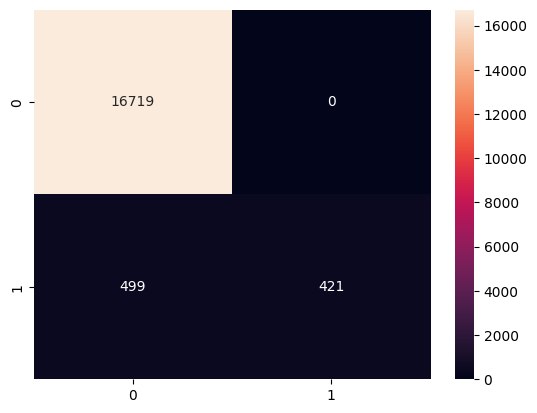

The confusion matrix for AdaBoost is: [[16719     0]
 [  499   421]]
===============Took: 1 seconds to train===============
===============XGBoost===============
Classification Report:
               precision    recall  f1-score   support

           0       0.97      1.00      0.98     16719
           1       0.90      0.48      0.63       920

    accuracy                           0.97     17639
   macro avg       0.93      0.74      0.81     17639
weighted avg       0.97      0.97      0.97     17639



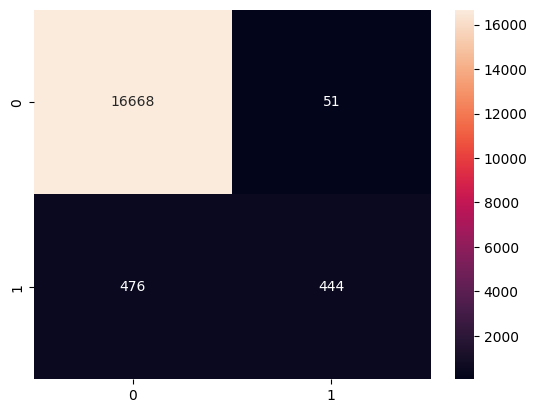

The confusion matrix for XGBoost is: [[16668    51]
 [  476   444]]
===============Took: 0 seconds to train===============


In [268]:
# Training and testing at least 3 supervised learning models:
from datetime import datetime 
from sklearn.linear_model import SGDClassifier
from sklearn.svm import SVC
#from sklearn.neighbors import kNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
class_weights={0:1, 1:4}

classifiers = [[LogisticRegression(random_state=42, class_weight=class_weights), 'Logistic Regression'],
    # [SVC(random_state=42, class_weight=class_weights), 'Support Vector Machine'],
    [SGDClassifier(random_state=42, class_weight=class_weights), 'SGD Classifiers'],
    [DecisionTreeClassifier(random_state=42, class_weight=class_weights), 'Decision Tree'],
    [RandomForestClassifier(random_state=42, class_weight=class_weights), 'Random Forest'],
    [GradientBoostingClassifier(random_state=42), 'Gradient Boosting'],
    [AdaBoostClassifier(random_state=42, algorithm="SAMME"), 'AdaBoost'],
    [XGBClassifier(eval_metric='mlogloss'), 'XGBoost']
              ]
for classifier in classifiers:
    begin = datetime.now()
    model_name = classifier[1]
    model = classifier[0]
    print("="*15 + model_name + "=" * 15)
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)
    report = classification_report(y_test, predictions)
    matrix = confusion_matrix(y_test, predictions)
    print("Classification Report:\n", report)
    sns.heatmap(matrix, annot=True, fmt='g')
    plt.show()
    print(f"The confusion matrix for {model_name} is: {matrix}")
    end = datetime.now()
    timetaken = end-begin
    print("="*15 + "Took: " + str(timetaken.seconds) + " seconds to train"+ "=" * 15)

#### Using GridsearchCV before applying SMOTE for comparison with above unbalanced model 

- Rasheed, et al. (2024) on Heart disease prediction using Machine learning suggests Random Forest with GridSearchCV hyperparameter tuning gave better performance results compared to other algorithms - Adaboost, Naive Bayes, SVM and Logistic Regression. Ramadhan, et al. (2017) demonstrated using parameter optimisation using Random Forests on gender categorisation based on voice frequency  that the classifier's optimal parameter is obtained by setting the number of variables (max_features) to "sqrt" and the tree number (n_estimators) to "300". Hence for this diabetes classification case, the parameters will be applied.


Ramadhan, M. M., Sitanggang, I. S., Nasution, F. R. & Ghifari, A., 2017. Parameter Tuning in Random Forest Based on Grid Search Method for Gender Classification Based on Voice Frequency. s.l., International Conference on Computer, Electronics and Communication Engineering (CECE 2017).

Rasheed, S. et al., 2024. Heart Disease Prediction Using GridSearchCV and Random Forest. EAI Endorsed Transactions on Pervasive Health and Technology, Volume 10, pp. 1-8.


In [269]:
from sklearn.model_selection import GridSearchCV

In [270]:
parameter_grid = {
    "max_depth": [20, 30, 50],
    "min_samples_split": [5, 7, 10],
    "class_weight": [{0:1, 1:2}, {0:1, 1:3}, {0:1, 1:5}, "balanced"]
}

#### Automating the Hyper-parameter Tuning using GridsearchCV

In [271]:
grid_search = GridSearchCV(estimator=classifiers[3][0], param_grid=parameter_grid, cv=5, scoring="recall")

In [272]:
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=RandomForestClassifier(class_weight={0: 1, 1: 4},
                                              random_state=42),
             param_grid={'class_weight': [{0: 1, 1: 2}, {0: 1, 1: 3},
                                          {0: 1, 1: 5}, 'balanced'],
                         'max_depth': [20, 30, 50],
                         'min_samples_split': [5, 7, 10]},
             scoring='recall')

In [273]:
print(f"Best parameters: {grid_search.best_params_}")
print(f"Best score: {grid_search.best_score_}")

Best parameters: {'class_weight': 'balanced', 'max_depth': 20, 'min_samples_split': 10}
Best score: 0.6665801119116409


In [274]:
data.head()

gender   age  hypertension  heart_disease smoking_history    bmi  \
0  Female  80.0             0              1           never  25.19   
1  Female  54.0             0              0         No Info  27.32   
2    Male  28.0             0              0           never  27.32   
3  Female  36.0             0              0         current  23.45   
4    Male  76.0             1              1         current  20.14   

   HbA1c_level  blood_glucose_level  diabetes                  age_group  
0          6.6                  140         0         Above 50yr Elderly  
1          6.6                   80         0         Above 50yr Elderly  
2          5.7                  158         0        17-30yr Young Adult  
3          5.0                  155         0  31-40yr Middle-aged Adult  
4          4.8                  155         0         Above 50yr Elderly

===============Random Forest===============
Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.97      0.97     16719
           1       0.53      0.65      0.58       920

    accuracy                           0.95     17639
   macro avg       0.75      0.81      0.78     17639
weighted avg       0.96      0.95      0.95     17639

The confusion matrix for Random Forest is: [[16179   540]
 [  321   599]]
===============Took: 758 seconds to train===============


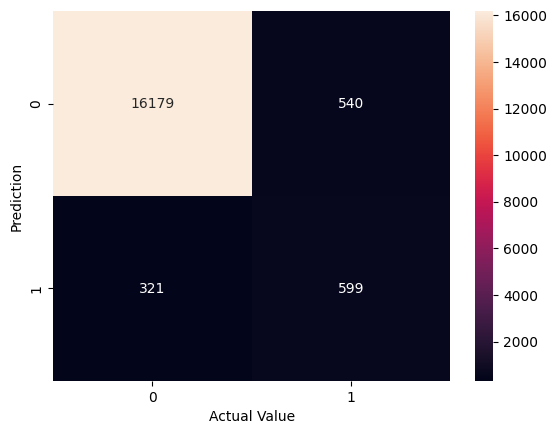

In [275]:
#Now we re-train the unbalanced data model based on the best parameters for obtained for 
## Random forest using GridSearchCV above
#Best parameters: {'class_weight': "balanced", 'max_depth': 20, 'min_samples_split': 10}

# Initialize the model
model = RandomForestClassifier(random_state=42, class_weight="balanced", max_depth=20, min_samples_split=10)
#inputting the tuned hyper-parameter class_weight obtained above
#by giving class 0 and class 1 "balanced" importance 
# Train the model
#classifiers = [RandomForestClassifier(random_state=42, class_weight=class_weights), 'Random Forest']
model_name = 'Random Forest'
print("="*15 + model_name + "=" * 15)
model.fit(X_train, y_train)
# Make predictions
predictions = model.predict(X_test)
#report = classification_report(y_test, predictions, digits=5)
report = classification_report(y_test, predictions)
matrix = confusion_matrix(y_test, predictions)
print("Classification Report:\n", report)
sns.heatmap(matrix, annot=True, fmt="g")
plt.ylabel("Prediction")
plt.xlabel("Actual Value")
print(f"The confusion matrix for {model_name} is: {matrix}")
end = datetime.now()
timetaken = end-begin
print("="*15 + "Took: " + str(timetaken.seconds) + " seconds to train"+ "=" * 15);

In [276]:
from sklearn.model_selection import GridSearchCV

In [277]:
parameter_grid = {
    "max_depth": [20, 30, 50],
    "min_samples_split": [5, 7, 10],
    "class_weight": [{0:1, 1:2}, {0:1, 1:3}, {0:1, 1:5}, "balanced"],
    "n_estimators": [100, 200, 300]
}

In [278]:
grid_search = GridSearchCV(estimator=classifiers[3][0], param_grid=parameter_grid, cv=5, scoring="recall")

In [279]:
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=RandomForestClassifier(class_weight={0: 1, 1: 4},
                                              random_state=42),
             param_grid={'class_weight': [{0: 1, 1: 2}, {0: 1, 1: 3},
                                          {0: 1, 1: 5}, 'balanced'],
                         'max_depth': [20, 30, 50],
                         'min_samples_split': [5, 7, 10],
                         'n_estimators': [100, 200, 300]},
             scoring='recall')

In [280]:
print(f"Best parameters: {grid_search.best_params_}")
print(f"Best score: {grid_search.best_score_}")

Best parameters: {'class_weight': 'balanced', 'max_depth': 20, 'min_samples_split': 10, 'n_estimators': 100}
Best score: 0.6665801119116409


parameter_grid = {
    "max_depth": [20, 30, 50],
    "min_samples_split": [5, 7, 10],
    "class_weight": [{0:1, 1:2}, {0:1, 1:3}, {0:1, 1:5}, "balanced"],
    "max_features":["sqrt", "log2"]
}

In [281]:
parameter_grid = {
    "max_depth": [20, 30, 50],
    "min_samples_split": [5, 7, 10],
    "class_weight": [{0:1, 1:2}, {0:1, 1:3}, {0:1, 1:5}, "balanced"],
    "max_features":["sqrt", "log2"]
}

In [282]:
grid_search = GridSearchCV(estimator=classifiers[3][0], param_grid=parameter_grid, cv=5, scoring="recall")

In [283]:
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=RandomForestClassifier(class_weight={0: 1, 1: 4},
                                              random_state=42),
             param_grid={'class_weight': [{0: 1, 1: 2}, {0: 1, 1: 3},
                                          {0: 1, 1: 5}, 'balanced'],
                         'max_depth': [20, 30, 50],
                         'max_features': ['sqrt', 'log2'],
                         'min_samples_split': [5, 7, 10]},
             scoring='recall')

In [284]:
print(f"Best parameters: {grid_search.best_params_}")
print(f"Best score: {grid_search.best_score_}")

Best parameters: {'class_weight': 'balanced', 'max_depth': 20, 'max_features': 'sqrt', 'min_samples_split': 10}
Best score: 0.6665801119116409


In [285]:
data.head()

gender   age  hypertension  heart_disease smoking_history    bmi  \
0  Female  80.0             0              1           never  25.19   
1  Female  54.0             0              0         No Info  27.32   
2    Male  28.0             0              0           never  27.32   
3  Female  36.0             0              0         current  23.45   
4    Male  76.0             1              1         current  20.14   

   HbA1c_level  blood_glucose_level  diabetes                  age_group  
0          6.6                  140         0         Above 50yr Elderly  
1          6.6                   80         0         Above 50yr Elderly  
2          5.7                  158         0        17-30yr Young Adult  
3          5.0                  155         0  31-40yr Middle-aged Adult  
4          4.8                  155         0         Above 50yr Elderly

- Now we re-train the model based on the best parameters for obtained for Random forest using GridSearchCV above

===============Random Forest===============
Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.97      0.97     16719
           1       0.53      0.65      0.58       920

    accuracy                           0.95     17639
   macro avg       0.75      0.81      0.78     17639
weighted avg       0.96      0.95      0.95     17639

The confusion matrix for Random Forest is: [[16179   540]
 [  321   599]]
===============Took: 6213 seconds to train===============


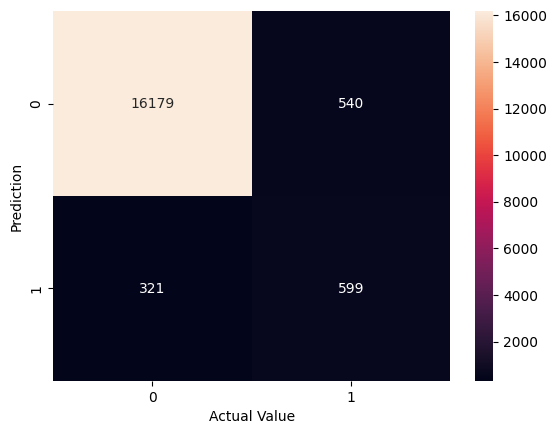

In [286]:
#Best parameters:'class_weight': 'balanced', 'max_depth': 20, 'max_features': 'sqrt', 'min_samples_split': 10
# Initialize the model
model = RandomForestClassifier(random_state=42, class_weight="balanced", max_depth=20, max_features= "sqrt", min_samples_split=10)
#inputting the tuned hyper-parameter class_weight obtained above
#by giving class 0 and class 1 "balanced" importance and setting max_features= "sqrt"
# Train the model

model_name = 'Random Forest'
print("="*15 + model_name + "=" * 15)
model.fit(X_train, y_train)
# Make predictions
predictions = model.predict(X_test)
#report = classification_report(y_test, predictions, digits=5)
report = classification_report(y_test, predictions)
matrix = confusion_matrix(y_test, predictions)
print("Classification Report:\n", report)
sns.heatmap(matrix, annot=True, fmt="g")
plt.ylabel("Prediction")
plt.xlabel("Actual Value")
print(f"The confusion matrix for {model_name} is: {matrix}")
end = datetime.now()
timetaken = end-begin
print("="*15 + "Took: " + str(timetaken.seconds) + " seconds to train"+ "=" * 15);

===============Random Forest===============
Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.97      0.97     16719
           1       0.53      0.65      0.58       920

    accuracy                           0.95     17639
   macro avg       0.75      0.81      0.78     17639
weighted avg       0.96      0.95      0.95     17639

The confusion matrix for Random Forest is: [[16179   540]
 [  321   599]]
===============Took: 6217 seconds to train===============


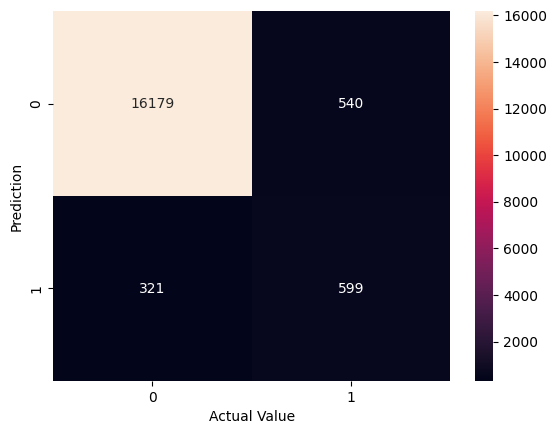

In [287]:
#Now we re-train the model based on the best parameters for obtained for 
## Random forest using GridSearchCV above
#Best parameters: {'class_weight': 'balanced', 'max_depth': 20, 'min_samples_split': 10, 'n_estimators': 100, 'max_features': 'sqrt'}

# Initialize the model
model = RandomForestClassifier(random_state=42, class_weight="balanced", max_depth=20, max_features= "sqrt", n_estimators=100, min_samples_split=10)
#inputting the tuned hyper-parameter class_weight obtained above
#by giving class 0 and class 1 "balanced" importance and setting max_features= "sqrt"
# Train the model

model_name = 'Random Forest'
print("="*15 + model_name + "=" * 15)
model.fit(X_train, y_train)
# Make predictions
predictions = model.predict(X_test)
#report = classification_report(y_test, predictions, digits=5)
report = classification_report(y_test, predictions)
matrix = confusion_matrix(y_test, predictions)
print("Classification Report:\n", report)
sns.heatmap(matrix, annot=True, fmt="g")
plt.ylabel("Prediction")
plt.xlabel("Actual Value")
print(f"The confusion matrix for {model_name} is: {matrix}")
end = datetime.now()
timetaken = end-begin
print("="*15 + "Took: " + str(timetaken.seconds) + " seconds to train"+ "=" * 15);

===============Random Forest===============
Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.97      0.97     16719
           1       0.52      0.66      0.58       920

    accuracy                           0.95     17639
   macro avg       0.75      0.81      0.78     17639
weighted avg       0.96      0.95      0.95     17639

The confusion matrix for Random Forest is: [[16166   553]
 [  316   604]]
===============Took: 6231 seconds to train===============


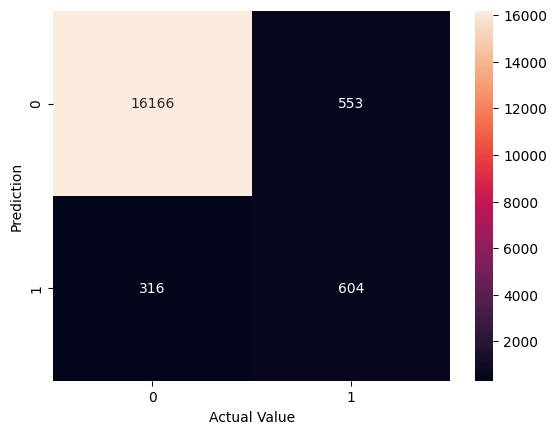

In [288]:
#Now we re-train the model based on the best parameters for obtained for 
## Random forest using GridSearchCV above
#Best parameters: {'class_weight': 'balanced', 'max_depth': 20, 'min_samples_split': 10, 'n_estimators': 300, 'max_features': 'sqrt'} #From Rasheed et. al (2024)

# Initialize the model
model = RandomForestClassifier(random_state=42, class_weight="balanced", max_depth=20, max_features= "sqrt", n_estimators=300, min_samples_split=10)
#model = RandomForestClassifier(random_state=42, class_weight="balanced", max_depth=20, max_features= "sqrt", n_estimators=300, min_samples_split=10)

#inputting the tuned hyper-parameter class_weight obtained above
#by giving class 0 and class 1 "balanced" importance and setting max_features= "sqrt"
# Train the model

model_name = 'Random Forest'
print("="*15 + model_name + "=" * 15)
model.fit(X_train, y_train)
# Make predictions
predictions = model.predict(X_test)
#report = classification_report(y_test, predictions, digits=5)
report = classification_report(y_test, predictions)
matrix = confusion_matrix(y_test, predictions)
print("Classification Report:\n", report)
sns.heatmap(matrix, annot=True, fmt="g")
plt.ylabel("Prediction")
plt.xlabel("Actual Value")
print(f"The confusion matrix for {model_name} is: {matrix}")
end = datetime.now()
timetaken = end-begin
print("="*15 + "Took: " + str(timetaken.seconds) + " seconds to train"+ "=" * 15);

- Notice from the above results using parameters from Rasheed, et al. (2024) and Ramadhan, et al. (2017) of hyper-parameters of
max_features= "sqrt", n_estimators=300 instead of "log2" and "100,200" respectively. We notice the recall increased slightly from 65% from previous resutlts to 66% by using these parameters for the unbalanced data of minority(1) and majority class (0). Now let's balance the dataset using SMOTE AND RE-TRAIN THE MODEL

### Data imbalance handling - using Synthetic Minority Oversampling Technique (SMOTE)
- oversampling the minority class to balance with the majority class

In [292]:
from imblearn.over_sampling import SMOTE

In [293]:
data.columns

Index(['gender', 'age', 'hypertension', 'heart_disease', 'smoking_history',
       'bmi', 'HbA1c_level', 'blood_glucose_level', 'diabetes', 'age_group'],
      dtype='object')

In [294]:
#We separate features and target(results)
X = data.drop("diabetes", axis=1) #as diabetes column is already dropped
y = label

y

0        0
1        0
2        0
3        0
4        0
        ..
99994    0
99996    0
99997    0
99998    0
99999    0
Name: diabetes, Length: 88195, dtype: int64

In [295]:
X

gender   age  hypertension  heart_disease smoking_history    bmi  \
0      Female  80.0             0              1           never  25.19   
1      Female  54.0             0              0         No Info  27.32   
2        Male  28.0             0              0           never  27.32   
3      Female  36.0             0              0         current  23.45   
4        Male  76.0             1              1         current  20.14   
...       ...   ...           ...            ...             ...    ...   
99994  Female  36.0             0              0         No Info  24.60   
99996  Female   2.0             0              0         No Info  17.37   
99997    Male  66.0             0              0          former  27.83   
99998  Female  24.0             0              0           never  35.42   
99999  Female  57.0             0              0         current  22.43   

       HbA1c_level  blood_glucose_level                  age_group  
0              6.6                  140         Above 50yr Elderly  
1              6.6                   80         Above 50yr Elderly  
2              5.7                  158        17-30yr Young Adult  
3              5.0                  155  31-40yr Middle-aged Adult  
4              4.8                  155         Above 50yr Elderly  
...            ...                  ...                        ...  
99994          4.8                  145  31-40yr Middle-aged Adult  
99996          6.5                  100                <0-2yr Baby  
99997          5.7                  155         Above 50yr Elderly  
99998          4.0                  100        17-30yr Young Adult  
99999          6.6                   90         Above 50yr Elderly  

[88195 rows x 9 columns]

In [296]:
#Initialise the scaler
scaler = StandardScaler()
X = scaler.fit_transform(features)

In [297]:
X

array([[-0.85009453,  1.72326913, -0.27107262, ...,  1.14617138,
         0.15231233,  1.11361869],
       [-0.85009453,  0.57235412, -0.27107262, ...,  1.14617138,
        -1.54954147,  1.11361869],
       [ 1.17437182, -0.5785609 , -0.27107262, ...,  0.24194317,
         0.66286847, -1.45146722],
       ...,
       [ 1.17437182,  1.10354566, -0.27107262, ...,  0.24194317,
         0.57777578,  1.11361869],
       [-0.85009453, -0.75562475, -0.27107262, ..., -1.46604344,
        -0.98225687, -1.45146722],
       [-0.85009453,  0.705152  , -0.27107262, ...,  1.14617138,
        -1.26589917,  1.11361869]])

In [298]:
#Now applying SMOTE to oversample the minority class
smote = SMOTE(random_state=42)
X_resampled, y_resampled =smote.fit_resample(X, y)

In [299]:
y_resampled.value_counts() 
#print(y_resampled)

0    83577
1    83577
Name: diabetes, dtype: int64

In [300]:
y_resampled.value_counts(normalize=True)*100

0    50.0
1    50.0
Name: diabetes, dtype: float64

In [301]:
#Now we split the data and train again

In [302]:
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42) #implies 80% = train_size 


- Notice in below cell the Radom Forest Model giving 98% in all metrics is with default parameters with only class_weight="balanced" and without max_depth=20, max_features= "sqrt", n_estimators=300, min_samples_split=10

===============Logistic Regression===============
Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.85      0.86     16564
           1       0.86      0.88      0.87     16867

    accuracy                           0.87     33431
   macro avg       0.87      0.87      0.87     33431
weighted avg       0.87      0.87      0.87     33431



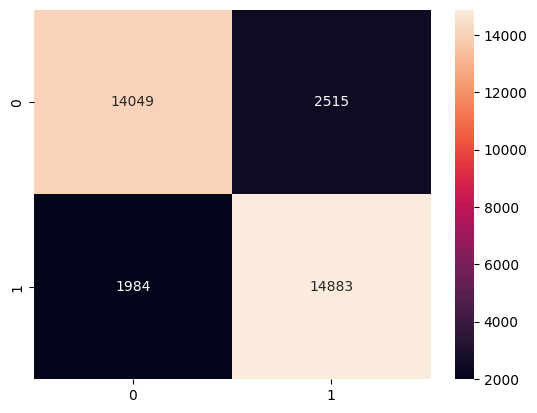

The confusion matrix for Logistic Regression is: [[14049  2515]
 [ 1984 14883]]
===============Took: 0 seconds to train===============
===============SGD Classifiers===============
Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.84      0.86     16564
           1       0.85      0.90      0.87     16867

    accuracy                           0.87     33431
   macro avg       0.87      0.87      0.87     33431
weighted avg       0.87      0.87      0.87     33431



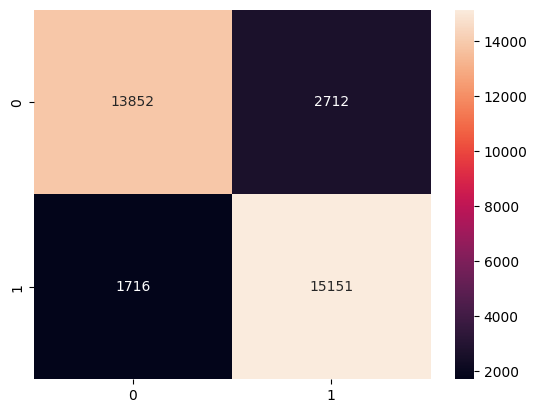

The confusion matrix for SGD Classifiers is: [[13852  2712]
 [ 1716 15151]]
===============Took: 0 seconds to train===============
===============Decision Tree===============
Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.96      0.97     16564
           1       0.97      0.97      0.97     16867

    accuracy                           0.97     33431
   macro avg       0.97      0.97      0.97     33431
weighted avg       0.97      0.97      0.97     33431



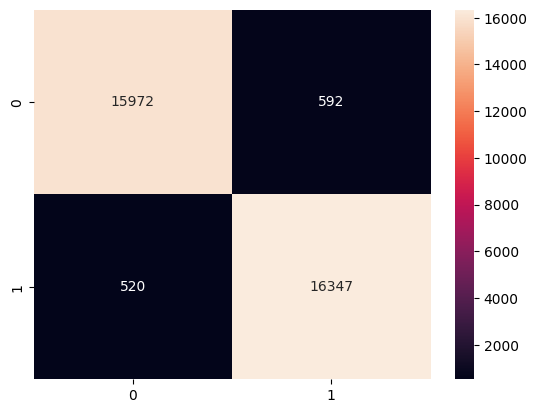

The confusion matrix for Decision Tree is: [[15972   592]
 [  520 16347]]
===============Took: 1 seconds to train===============
===============Random Forest===============
Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.98      0.98     16564
           1       0.98      0.98      0.98     16867

    accuracy                           0.98     33431
   macro avg       0.98      0.98      0.98     33431
weighted avg       0.98      0.98      0.98     33431



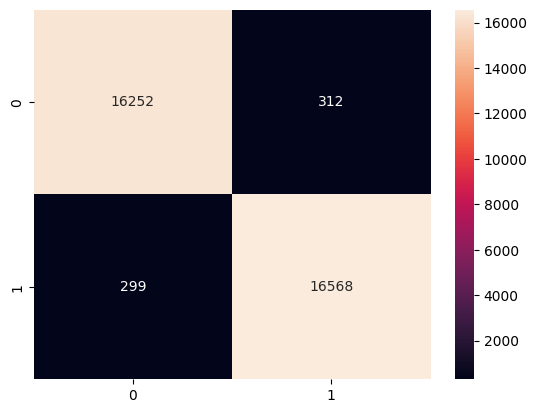

The confusion matrix for Random Forest is: [[16252   312]
 [  299 16568]]
===============Took: 28 seconds to train===============
===============Gradient Boosting===============
Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.95      0.95     16564
           1       0.95      0.96      0.95     16867

    accuracy                           0.95     33431
   macro avg       0.95      0.95      0.95     33431
weighted avg       0.95      0.95      0.95     33431



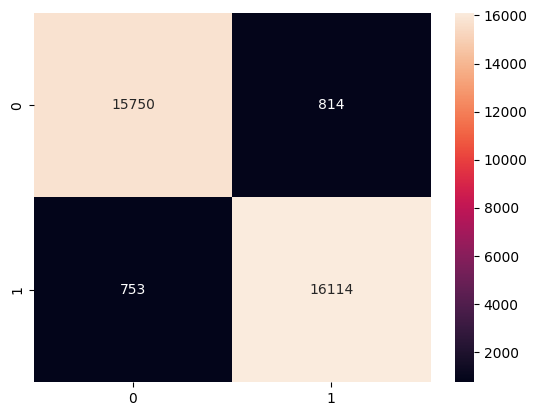

The confusion matrix for Gradient Boosting is: [[15750   814]
 [  753 16114]]
===============Took: 30 seconds to train===============
===============AdaBoost===============
Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.86      0.89     16564
           1       0.87      0.93      0.90     16867

    accuracy                           0.90     33431
   macro avg       0.90      0.90      0.90     33431
weighted avg       0.90      0.90      0.90     33431



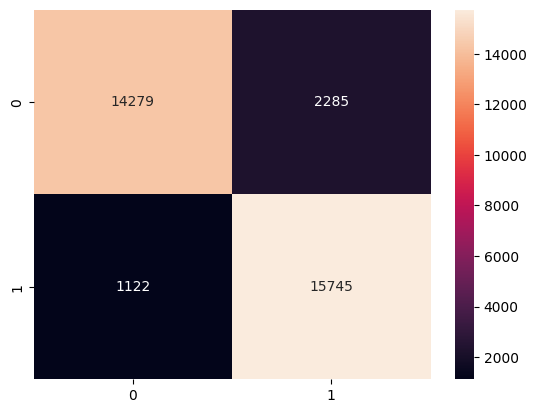

The confusion matrix for AdaBoost is: [[14279  2285]
 [ 1122 15745]]
===============Took: 6 seconds to train===============
===============XGBoost===============
Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.99      0.98     16564
           1       0.99      0.96      0.98     16867

    accuracy                           0.98     33431
   macro avg       0.98      0.98      0.98     33431
weighted avg       0.98      0.98      0.98     33431



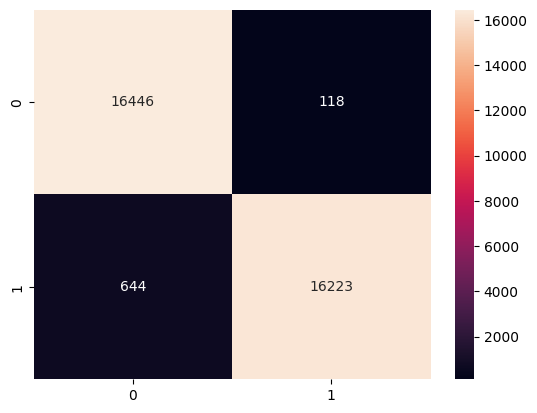

The confusion matrix for XGBoost is: [[16446   118]
 [  644 16223]]
===============Took: 0 seconds to train===============


In [303]:
class_weights="balanced"

classifiers = [[LogisticRegression(random_state=42, class_weight=class_weights), 'Logistic Regression'],
    # [SVC(random_state=42, class_weight=class_weights), 'Support Vector Machine'],
    [SGDClassifier(random_state=42, class_weight=class_weights), 'SGD Classifiers'],
    [DecisionTreeClassifier(random_state=42, class_weight=class_weights), 'Decision Tree'],
    [RandomForestClassifier(random_state=42, class_weight=class_weights), 'Random Forest'],
    [GradientBoostingClassifier(random_state=42), 'Gradient Boosting'],
    [AdaBoostClassifier(random_state=42, algorithm="SAMME"), 'AdaBoost'],
    [XGBClassifier(eval_metric='mlogloss'), 'XGBoost']
              ]
for classifier in classifiers:
    begin = datetime.now()
    model_name = classifier[1]
    model = classifier[0]
    print("="*15 + model_name + "=" * 15)
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)
    report = classification_report(y_test, predictions)
    matrix = confusion_matrix(y_test, predictions)
    print("Classification Report:\n", report)
    sns.heatmap(matrix, annot=True, fmt='g')
    plt.show()
    print(f"The confusion matrix for {model_name} is: {matrix}")
    end = datetime.now()
    timetaken = end-begin
    print("="*15 + "Took: " + str(timetaken.seconds) + " seconds to train"+ "=" * 15)

- Notice here we change only the parameters of Random Forest to confirm research paper values above

===============Logistic Regression===============
Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.85      0.86     16564
           1       0.86      0.88      0.87     16867

    accuracy                           0.87     33431
   macro avg       0.87      0.87      0.87     33431
weighted avg       0.87      0.87      0.87     33431



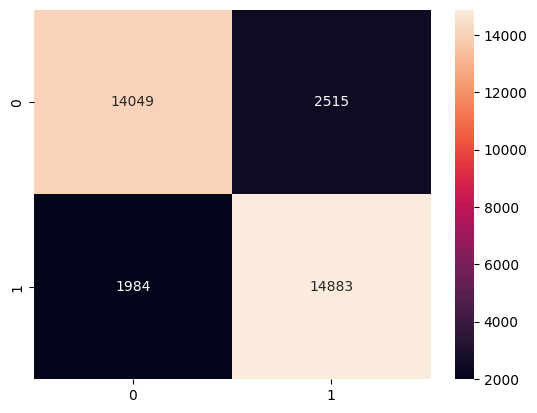

The confusion matrix for Logistic Regression is: [[14049  2515]
 [ 1984 14883]]
===============Took: 0 seconds to train===============
===============SGD Classifiers===============
Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.84      0.86     16564
           1       0.85      0.90      0.87     16867

    accuracy                           0.87     33431
   macro avg       0.87      0.87      0.87     33431
weighted avg       0.87      0.87      0.87     33431



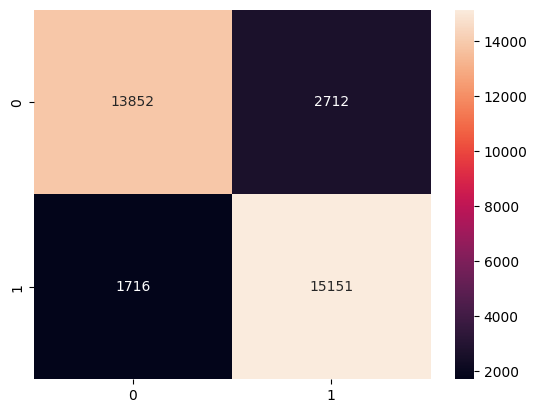

The confusion matrix for SGD Classifiers is: [[13852  2712]
 [ 1716 15151]]
===============Took: 0 seconds to train===============
===============Decision Tree===============
Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.96      0.97     16564
           1       0.97      0.97      0.97     16867

    accuracy                           0.97     33431
   macro avg       0.97      0.97      0.97     33431
weighted avg       0.97      0.97      0.97     33431



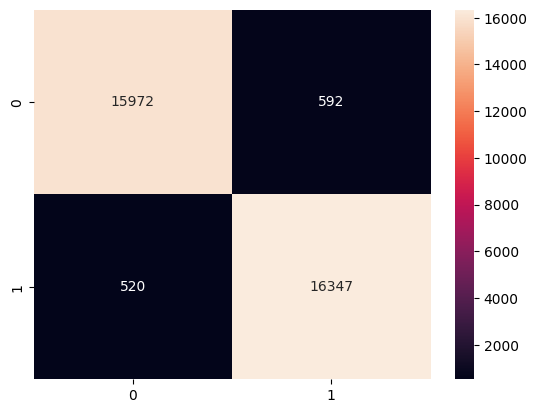

The confusion matrix for Decision Tree is: [[15972   592]
 [  520 16347]]
===============Took: 1 seconds to train===============
===============Random Forest===============
Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.95      0.97     16564
           1       0.96      0.98      0.97     16867

    accuracy                           0.97     33431
   macro avg       0.97      0.97      0.97     33431
weighted avg       0.97      0.97      0.97     33431



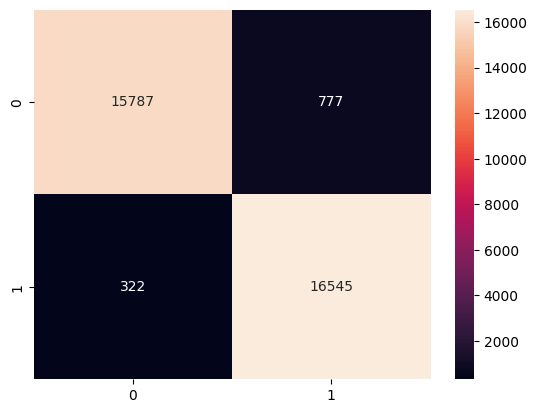

The confusion matrix for Random Forest is: [[15787   777]
 [  322 16545]]
===============Took: 72 seconds to train===============
===============Gradient Boosting===============
Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.95      0.95     16564
           1       0.95      0.96      0.95     16867

    accuracy                           0.95     33431
   macro avg       0.95      0.95      0.95     33431
weighted avg       0.95      0.95      0.95     33431



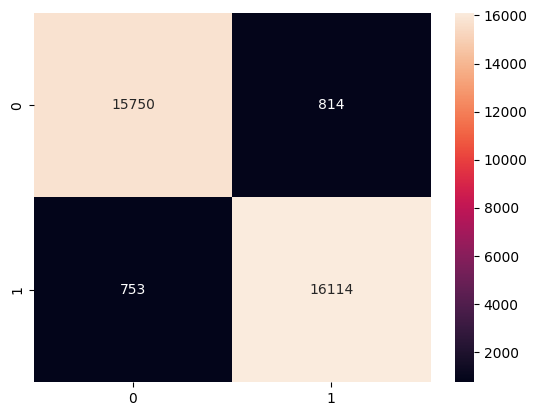

The confusion matrix for Gradient Boosting is: [[15750   814]
 [  753 16114]]
===============Took: 30 seconds to train===============
===============AdaBoost===============
Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.86      0.89     16564
           1       0.87      0.93      0.90     16867

    accuracy                           0.90     33431
   macro avg       0.90      0.90      0.90     33431
weighted avg       0.90      0.90      0.90     33431



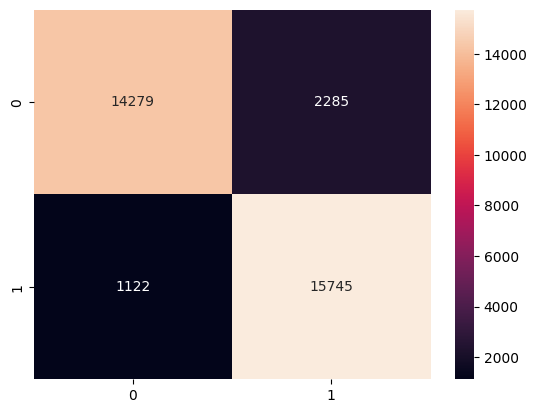

The confusion matrix for AdaBoost is: [[14279  2285]
 [ 1122 15745]]
===============Took: 6 seconds to train===============
===============XGBoost===============
Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.99      0.98     16564
           1       0.99      0.96      0.98     16867

    accuracy                           0.98     33431
   macro avg       0.98      0.98      0.98     33431
weighted avg       0.98      0.98      0.98     33431



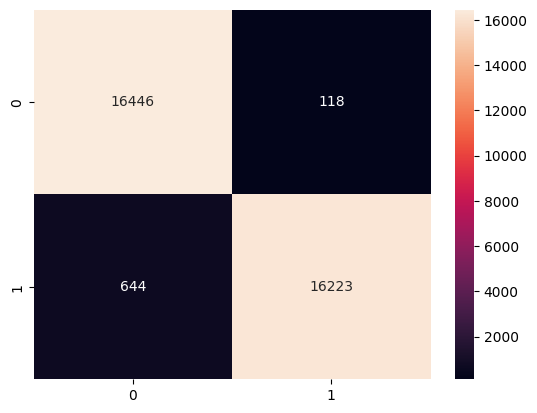

The confusion matrix for XGBoost is: [[16446   118]
 [  644 16223]]
===============Took: 0 seconds to train===============


In [304]:
class_weights="balanced"

classifiers = [[LogisticRegression(random_state=42, class_weight=class_weights), 'Logistic Regression'],
    # [SVC(random_state=42, class_weight=class_weights), 'Support Vector Machine'],
    [SGDClassifier(random_state=42, class_weight=class_weights), 'SGD Classifiers'],
    [DecisionTreeClassifier(random_state=42, class_weight=class_weights), 'Decision Tree'],
    [RandomForestClassifier(random_state=42, class_weight="balanced", max_depth=20, max_features= "sqrt", n_estimators=300, min_samples_split=10), 'Random Forest'],
    [GradientBoostingClassifier(random_state=42), 'Gradient Boosting'],
    [AdaBoostClassifier(random_state=42, algorithm="SAMME"), 'AdaBoost'],
    [XGBClassifier(eval_metric='mlogloss'), 'XGBoost']
              ]
for classifier in classifiers:
    begin = datetime.now()
    model_name = classifier[1]
    model = classifier[0]
    print("="*15 + model_name + "=" * 15)
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)
    report = classification_report(y_test, predictions)
    matrix = confusion_matrix(y_test, predictions)
    print("Classification Report:\n", report)
    sns.heatmap(matrix, annot=True, fmt='g')
    plt.show()
    print(f"The confusion matrix for {model_name} is: {matrix}")
    end = datetime.now()
    timetaken = end-begin
    print("="*15 + "Took: " + str(timetaken.seconds) + " seconds to train"+ "=" * 15)


#### From the above models results, after applying SMOTE we see Random Forest gives the best results - 98% for all recall (True Positives/False Negatives Diabetes dection) acccuracy and F-1 score compared to other model types - hence we use Random Forest to perform Feature Importance

- Now we re-train the balanced class (1/0) model based on the best parameters from Research papers above and those obtained for Random forest using GridSearchCV above


===============Random Forest===============
Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.95      0.97     16564
           1       0.96      0.98      0.97     16867

    accuracy                           0.97     33431
   macro avg       0.97      0.97      0.97     33431
weighted avg       0.97      0.97      0.97     33431

The confusion matrix for Random Forest is: [[15787   777]
 [  322 16545]]
===============Took: 70 seconds to train===============


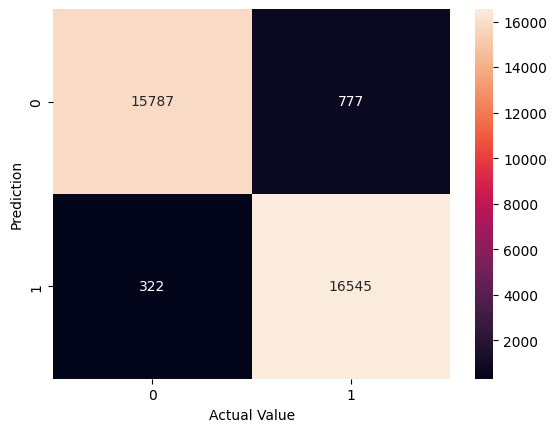

In [305]:
#Now we re-train the model based on the best parameters for obtained for Random forest using GridSearchCV above
#Best parameters: {'class_weight': 'balanced', 'max_depth': 20, 'min_samples_split': 10, 'n_estimators': 300, 'max_features': 'sqrt'} #From Rasheed et. al (2024)

# Initialize the model
model = RandomForestClassifier(random_state=42, class_weight="balanced", max_depth=20, max_features= "sqrt", n_estimators=300, min_samples_split=10)
#inputting the tuned hyper-parameter class_weight obtained above
#by giving class 0 and class 1 "balanced" importance and setting max_features= "sqrt"
# Train the model
#    [RandomForestClassifier(random_state=42, class_weight=class_weights), 'Random Forest'],



model_name = 'Random Forest'
print("="*15 + model_name + "=" * 15)
model.fit(X_train, y_train)
# Make predictions
predictions = model.predict(X_test)
#report = classification_report(y_test, predictions, digits=5)
report = classification_report(y_test, predictions)
matrix = confusion_matrix(y_test, predictions)
print("Classification Report:\n", report)
sns.heatmap(matrix, annot=True, fmt="g")
plt.ylabel("Prediction")
plt.xlabel("Actual Value")
print(f"The confusion matrix for {model_name} is: {matrix}")
end = datetime.now()
timetaken = end-begin
print("="*15 + "Took: " + str(timetaken.seconds) + " seconds to train"+ "=" * 15);

parameter_grid = {
    "max_depth": [20, 30, 50],
    "min_samples_split": [5, 7, 10],
    "class_weight": [{0:1, 1:2}, {0:1, 1:3}, {0:1, 1:5}, "balanced"],
    "n_estimators": [100, 200, 300],
    "max_features":["sqrt", "log2"]
}

grid_search = GridSearchCV(estimator=classifiers[3][0], param_grid=parameter_grid, cv=5, scoring="recall")

grid_search.fit(X_train, y_train)

print(f"Best parameters: {grid_search.best_params_}")
print(f"Best score: {grid_search.best_score_}")

data.head()

### 6. Feature importance - to determine which metrics are important to the model
- to select the most important features and reduce the work load on the model

In [306]:
#Feature importance for Random Forest model
importances = classifiers[3][0].feature_importances_
importances

array([0.0053327 , 0.18367373, 0.01132458, 0.00455953, 0.03013783,
       0.05748069, 0.39072398, 0.22551376, 0.0912532 ])

In [307]:
parameter_grid = {
    "max_depth": [20, 30, 50],
    "min_samples_split": [5, 7, 10],
    "class_weight": [{0:1, 1:2}, {0:1, 1:3}, {0:1, 1:5}, "balanced"],
    "n_estimators": [100, 200, 300]
}

In [308]:
feature_names = features.columns
feature_importance_df = pd.DataFrame({"Feature": feature_names, "Importance": importances})
feature_importance_df = feature_importance_df.sort_values(by="Importance", ascending=False)
feature_importance_df

Feature  Importance
6          HbA1c_level    0.390724
7  blood_glucose_level    0.225514
1                  age    0.183674
8            age_group    0.091253
5                  bmi    0.057481
4      smoking_history    0.030138
2         hypertension    0.011325
0               gender    0.005333
3        heart_disease    0.004560

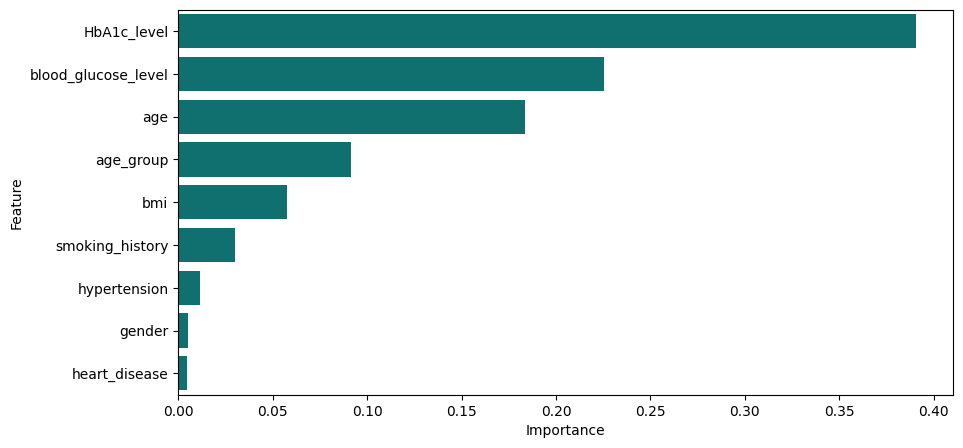

In [309]:
#Plotting visually in a data plot
plt.figure(figsize=(10,5))

sns.barplot(x="Importance", y="Feature", data=feature_importance_df, color="teal");


### - So from the above we can see for random forest model:
- HbA1c_level, blood_glucose_level, age, bmi and age_group are key factors(features) in diabetes prediction and diagnosis unlike others

### Correlation Analysis

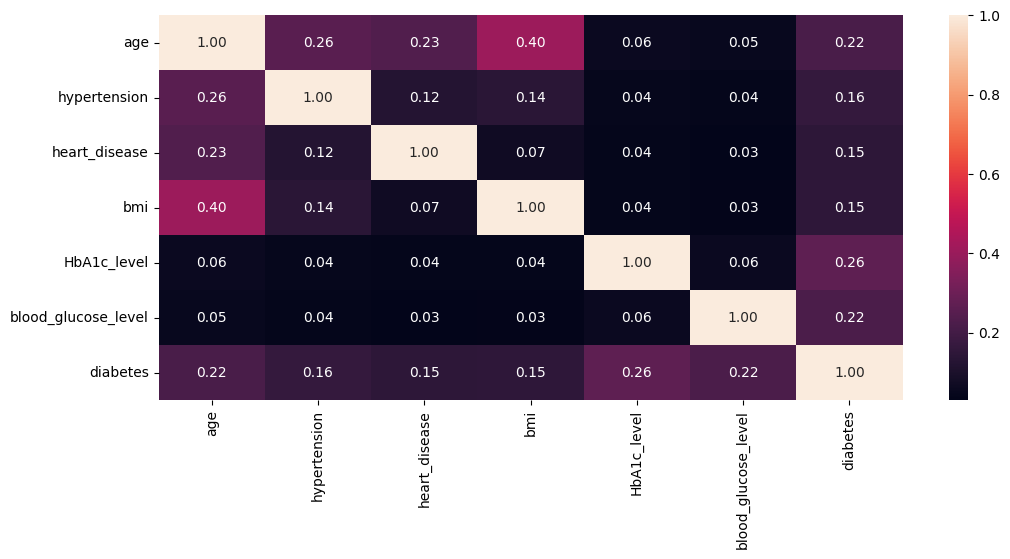

In [310]:
plt.figure(figsize=(12, 5))
sns.heatmap(data.corr(numeric_only=True), annot=True, fmt=".2f");

In [311]:
data.corr(numeric_only=True)

age  hypertension  heart_disease       bmi  \
age                  1.000000      0.255928       0.234206  0.404966   
hypertension         0.255928      1.000000       0.122328  0.135534   
heart_disease        0.234206      0.122328       1.000000  0.069214   
bmi                  0.404966      0.135534       0.069214  1.000000   
HbA1c_level          0.055765      0.042942       0.036586  0.038096   
blood_glucose_level  0.049413      0.039069       0.028800  0.033999   
diabetes             0.215886      0.161844       0.145782  0.146629   

                     HbA1c_level  blood_glucose_level  diabetes  
age                     0.055765             0.049413  0.215886  
hypertension            0.042942             0.039069  0.161844  
heart_disease           0.036586             0.028800  0.145782  
bmi                     0.038096             0.033999  0.146629  
HbA1c_level             1.000000             0.057744  0.264221  
blood_glucose_level     0.057744             1.000000  0.218808  
diabetes                0.264221             0.218808  1.000000